In [1]:
import h5py

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
FILE_NAME = "../data/RUN000054_channels.h5"

In [3]:
f = h5py.File(FILE_NAME, "r")
externalKeys = f.keys()
keys = []
for k_e in externalKeys:
    for k_i in f[k_e].keys():
        keys.append(str(k_e)+'/'+str(k_i))

In [5]:
full_df = pd.concat(
    [
        pd.read_hdf(FILE_NAME, key=k, mode="r") for k in keys
    ],
    ignore_index=True
)
print(f"Shape: {full_df.shape}")

Shape: (1059990, 5)


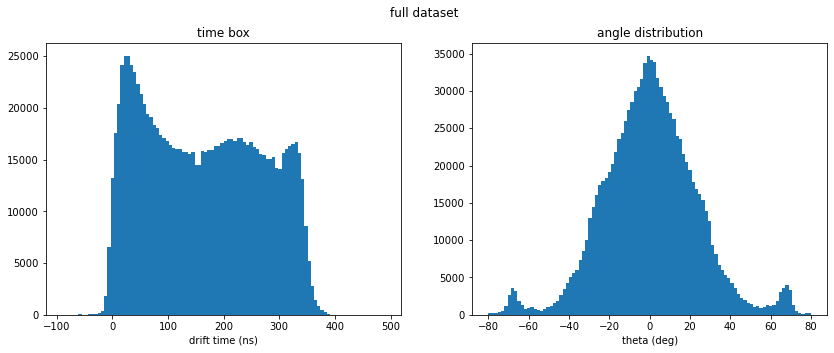

In [7]:
fig, ax = plt.subplots(ncols=2, figsize=(14,5))

ax[0].hist(
    full_df["HIT_DRIFT_TIME"],
    bins=100,
    range=(-90, 490)
)
ax[1].hist(
    full_df["THETA"],
    bins=100,
    range=(-80, 80)
)

fig.suptitle("full dataset")

ax[0].set_title("time box")
ax[0].set_xlabel("drift time (ns)")
ax[1].set_title("angle distribution")
ax[1].set_xlabel("theta (deg)")

plt.show()

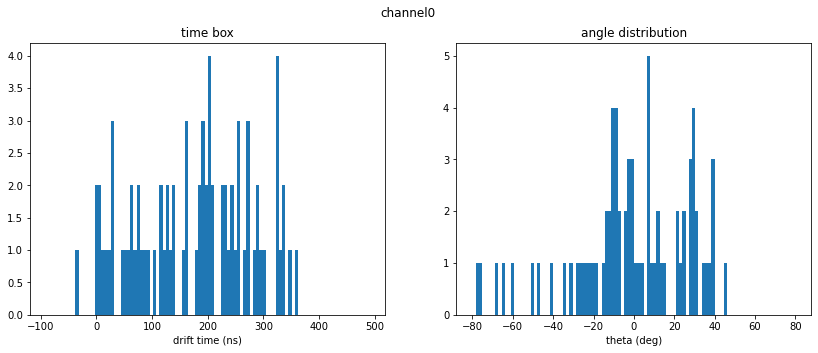

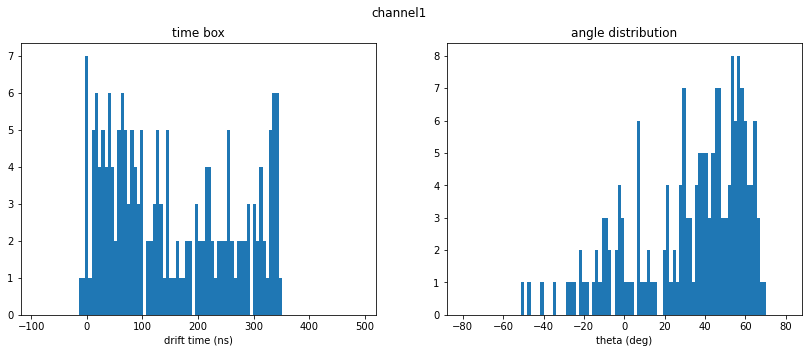

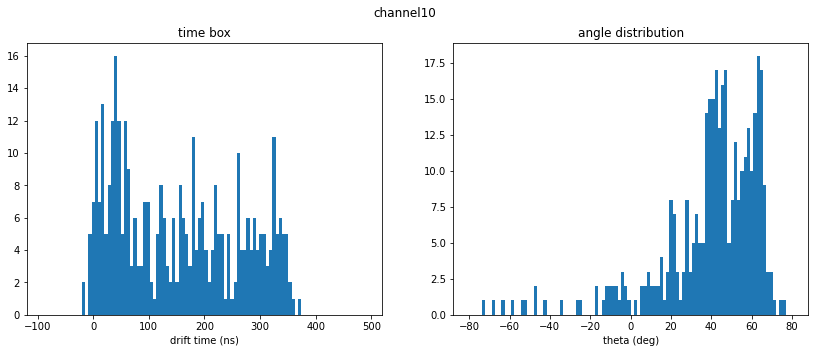

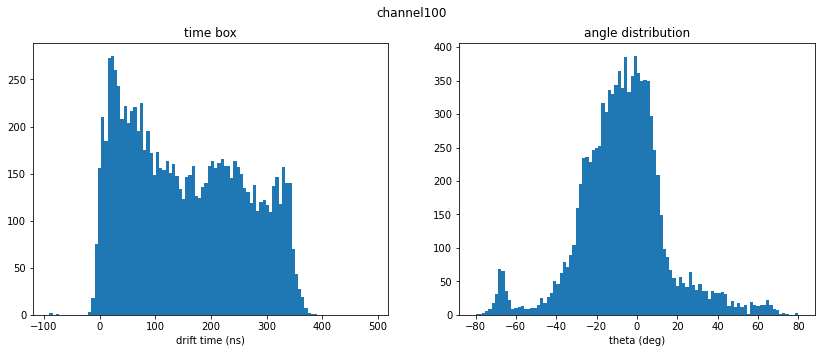

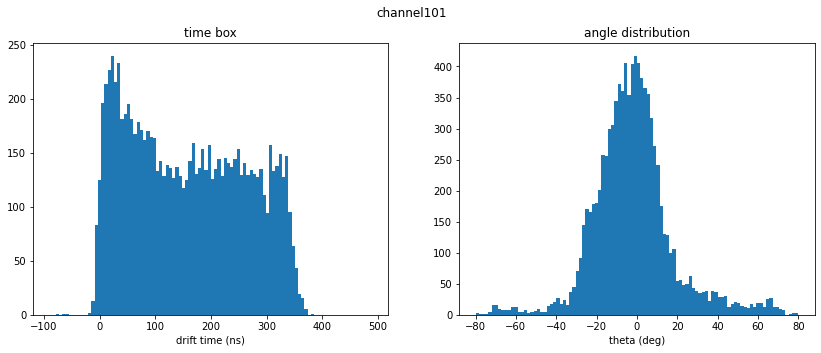

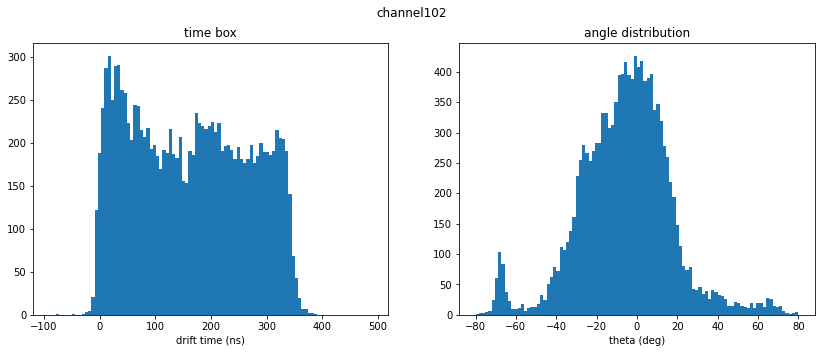

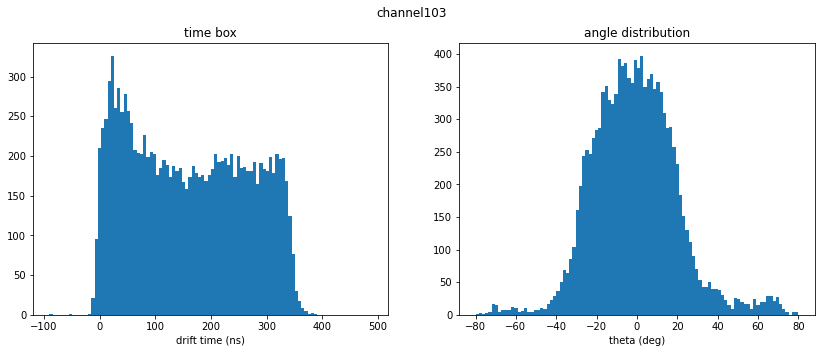

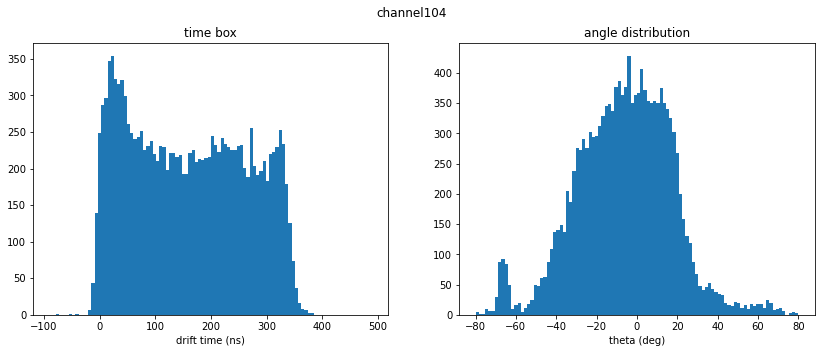

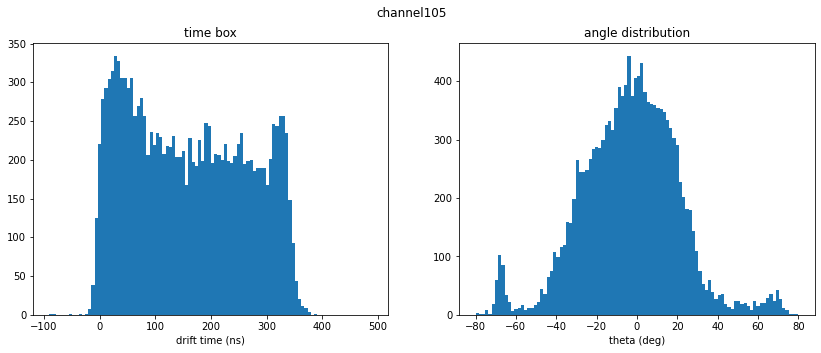

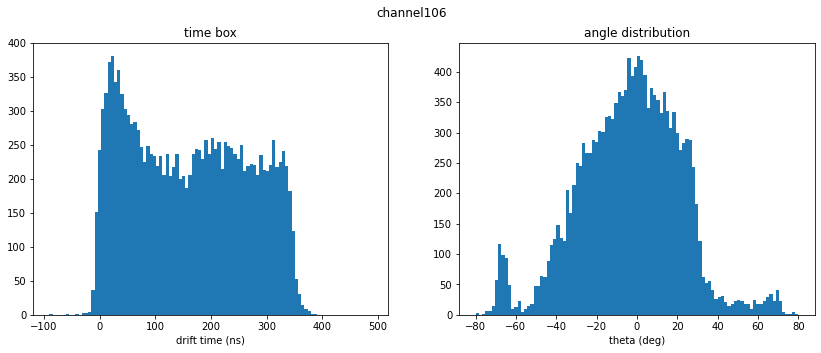

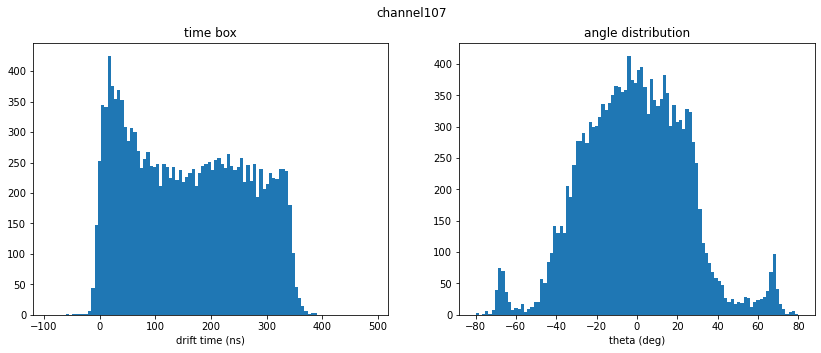

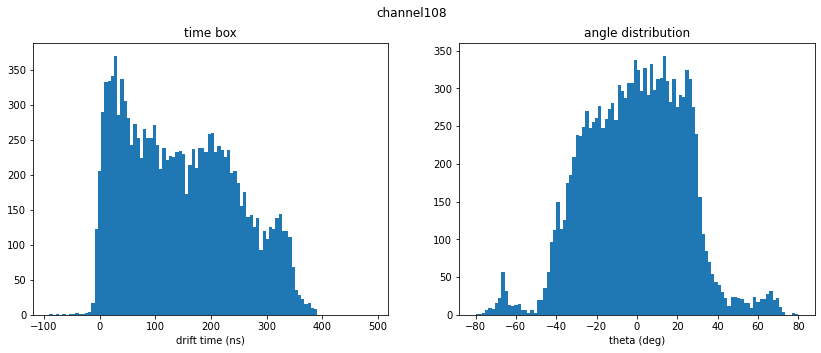

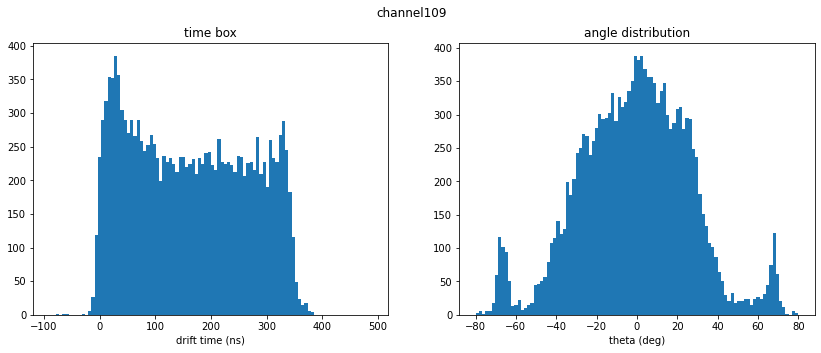

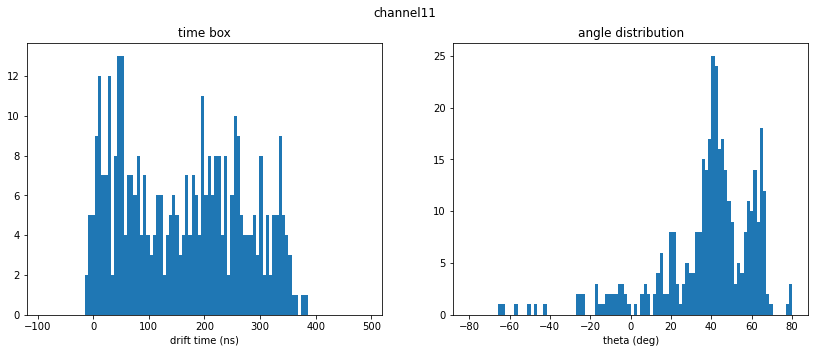

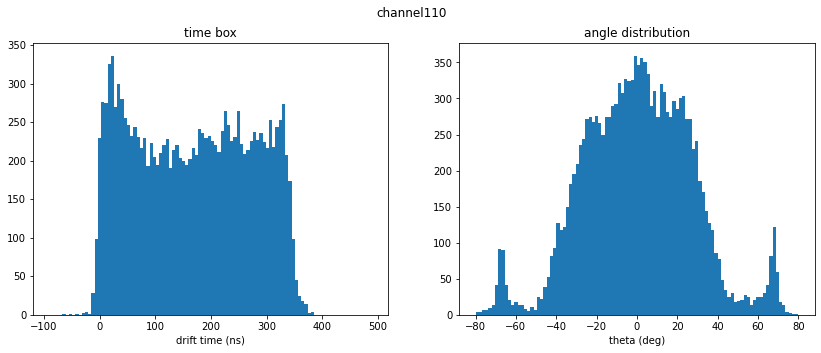

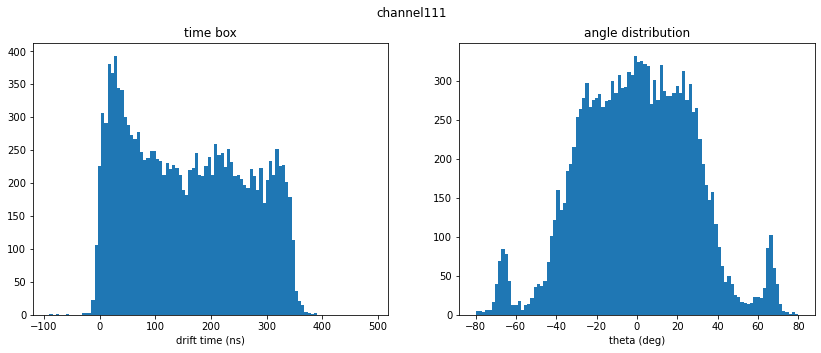

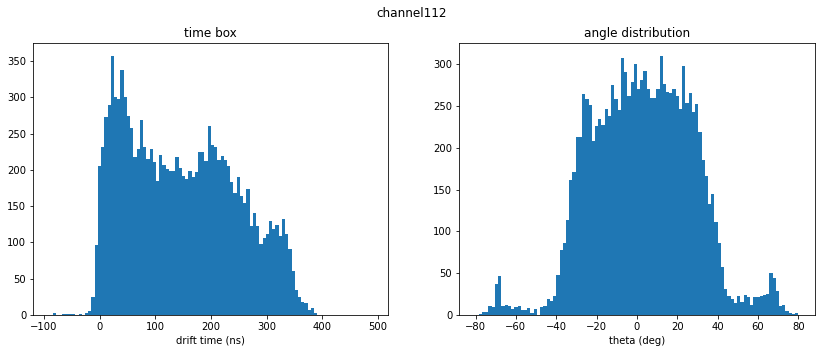

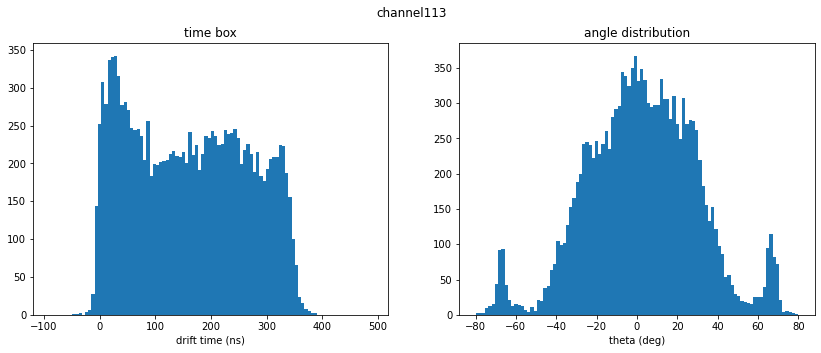

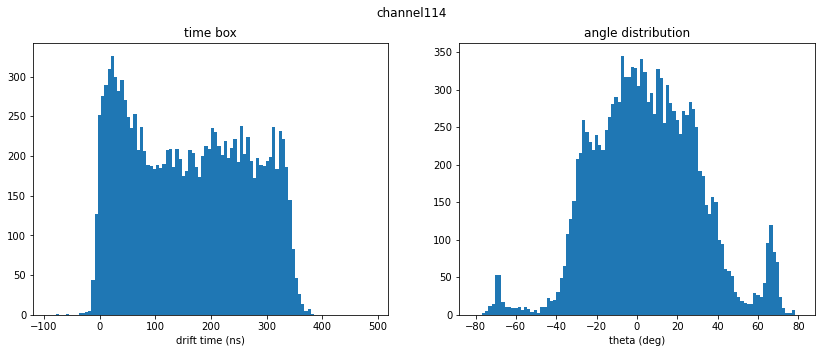

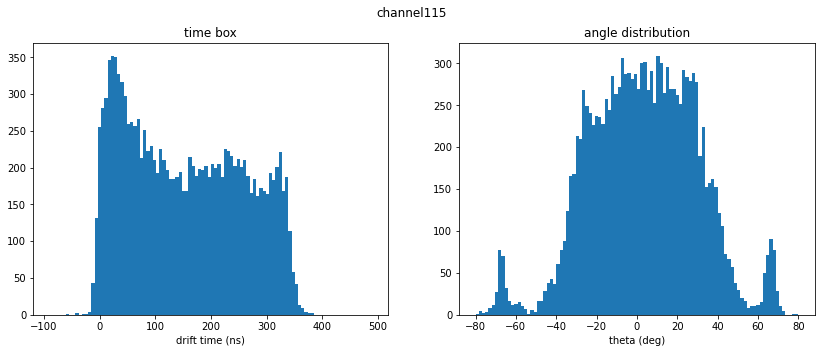

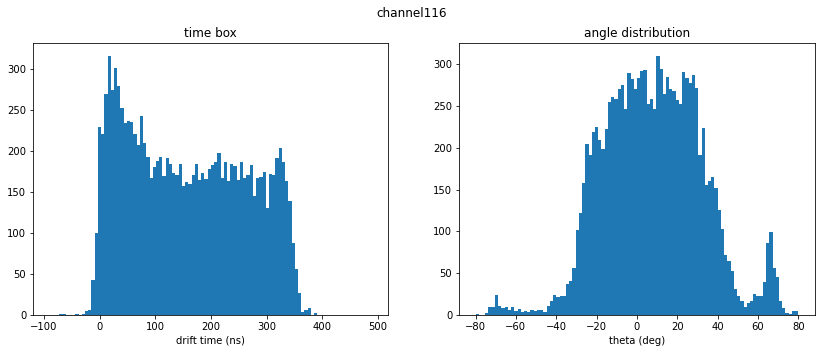

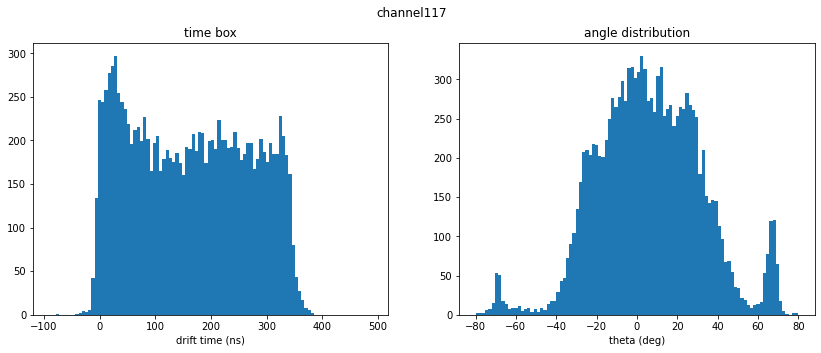

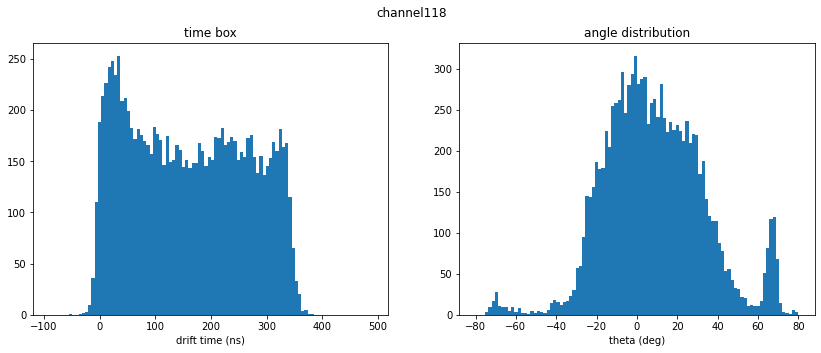

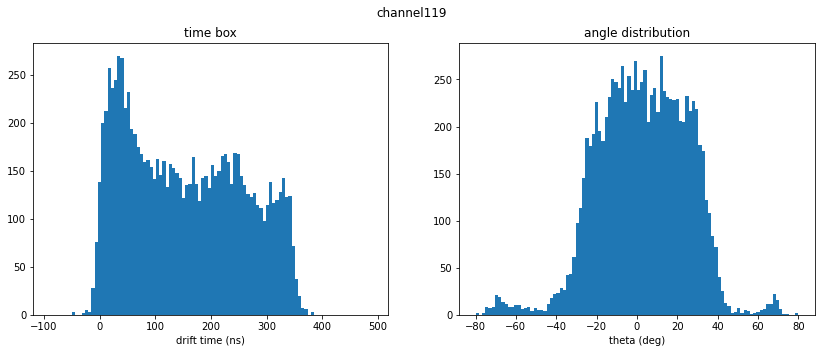

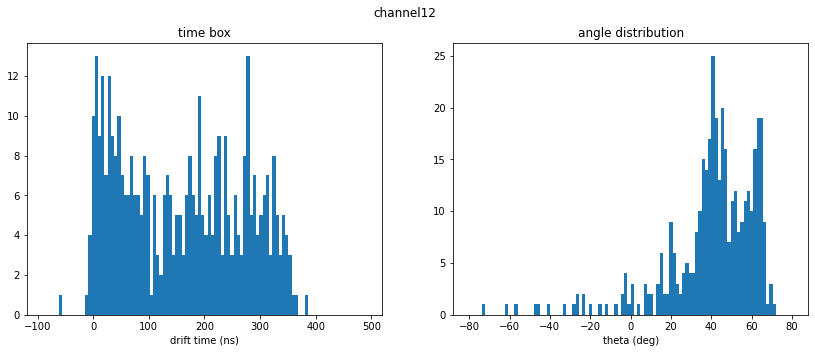

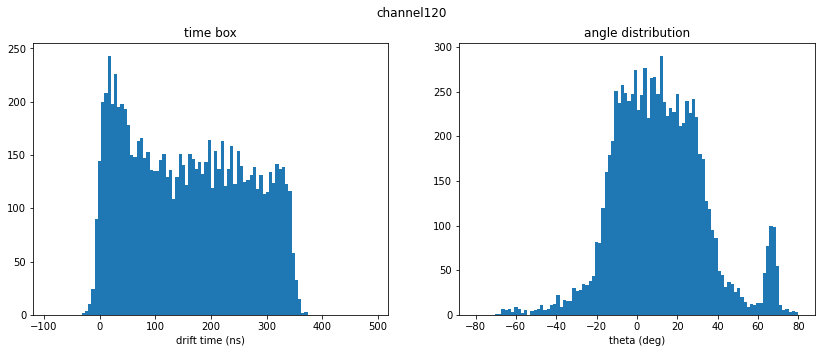

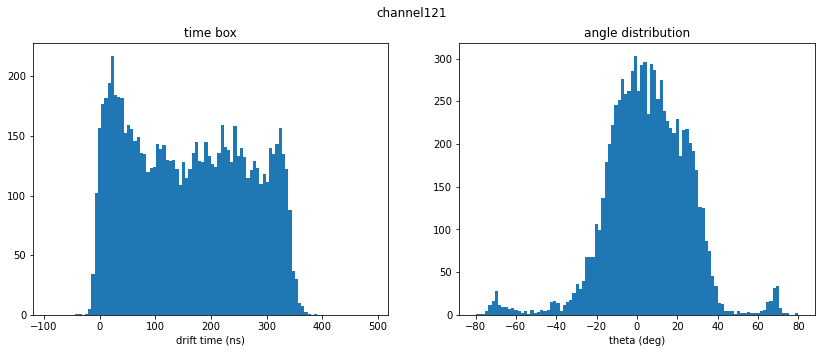

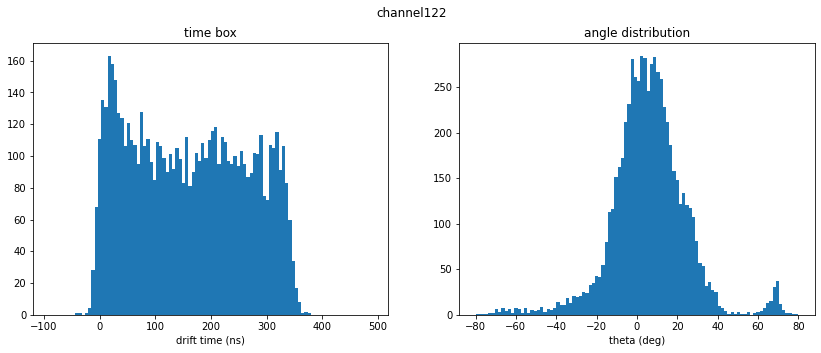

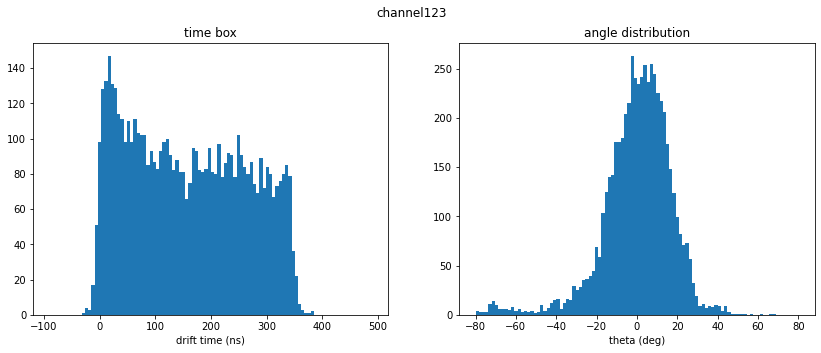

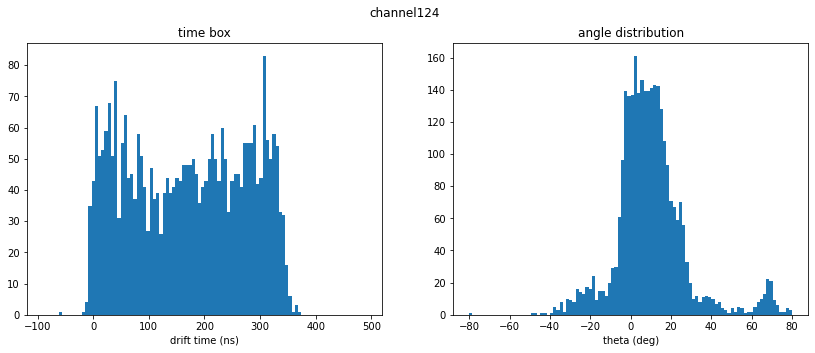

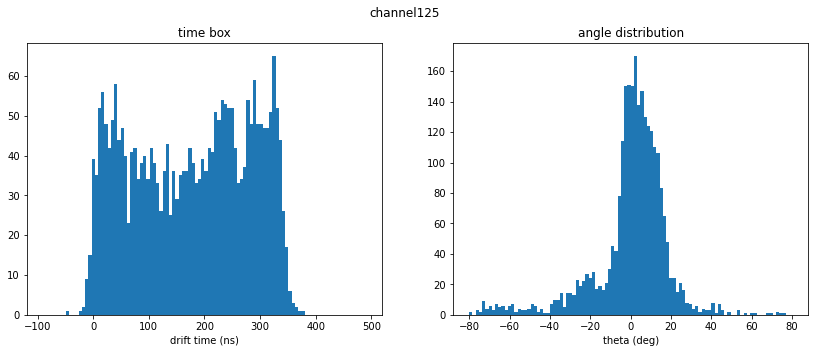

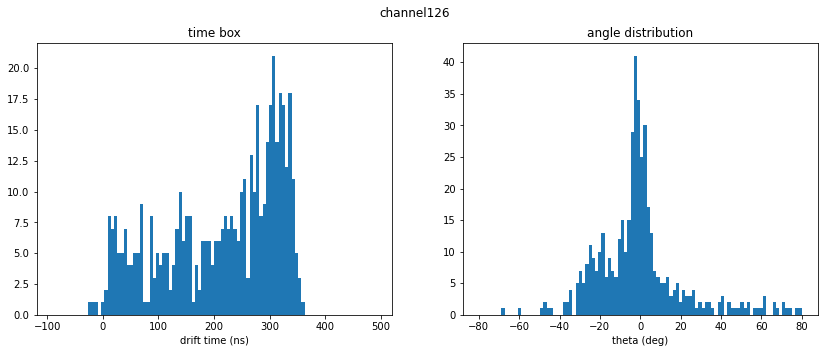

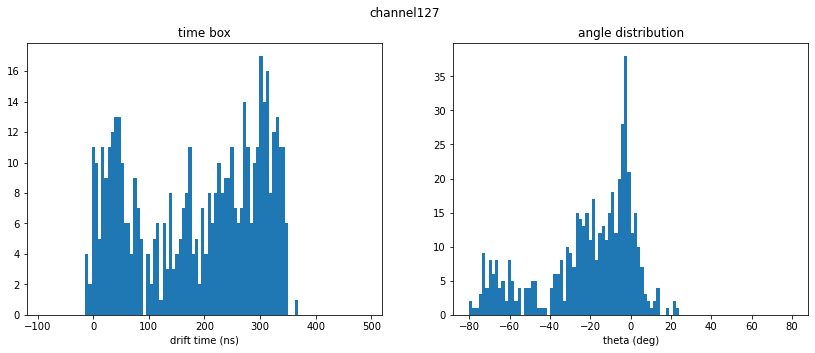

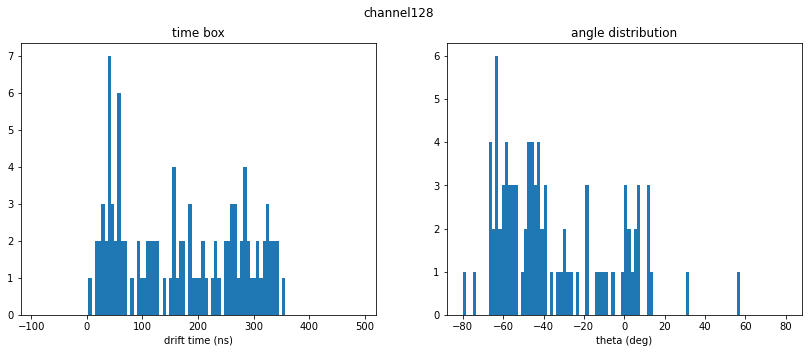

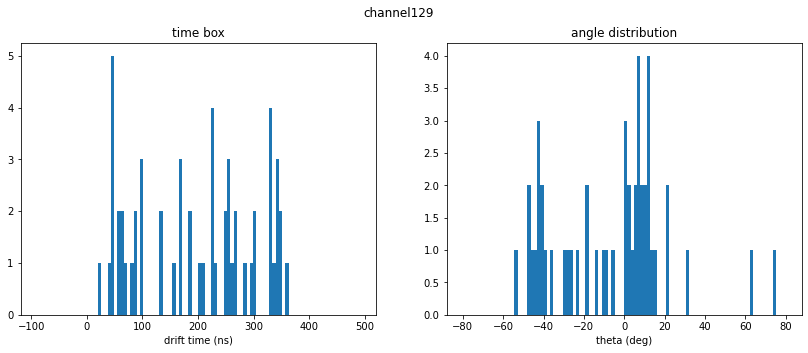

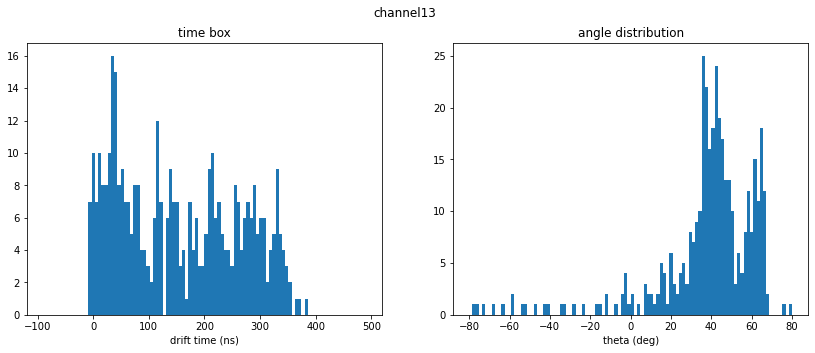

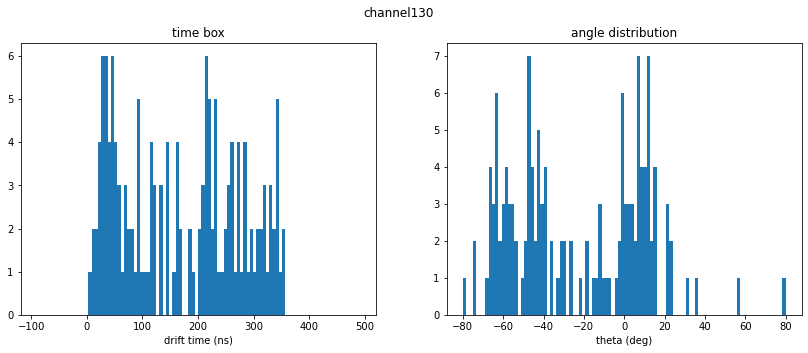

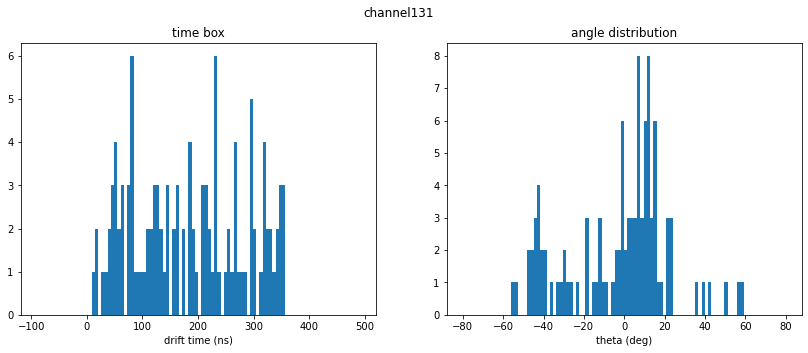

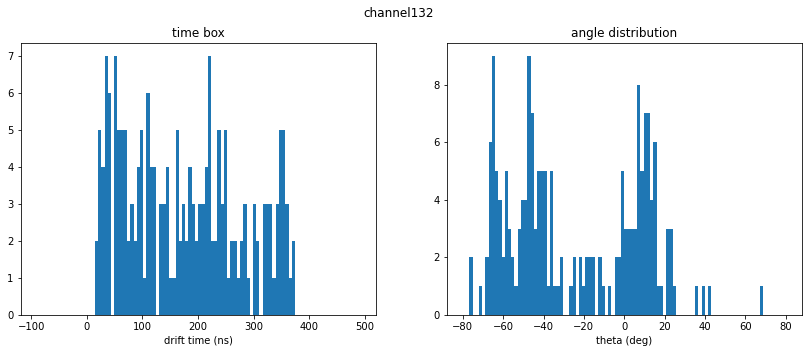

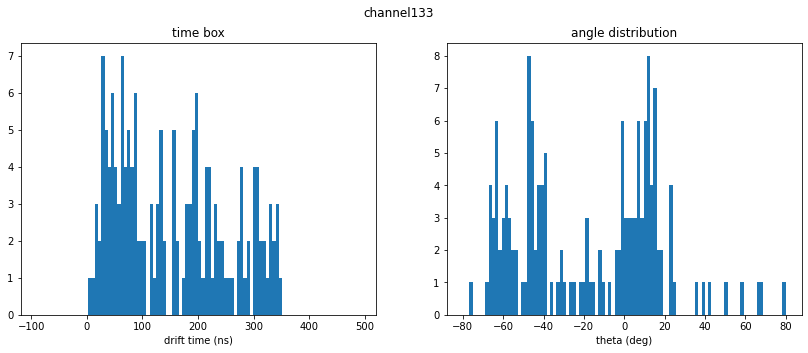

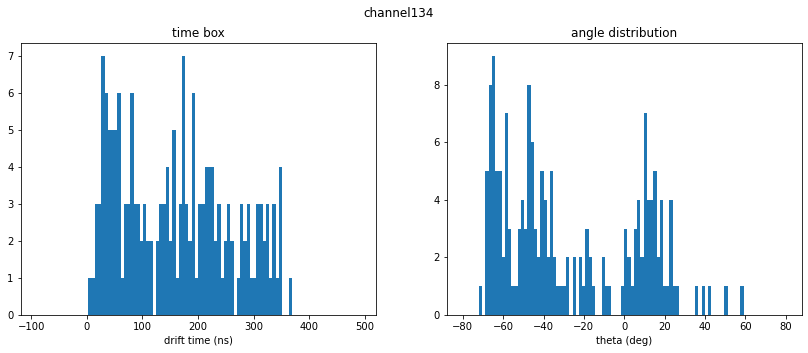

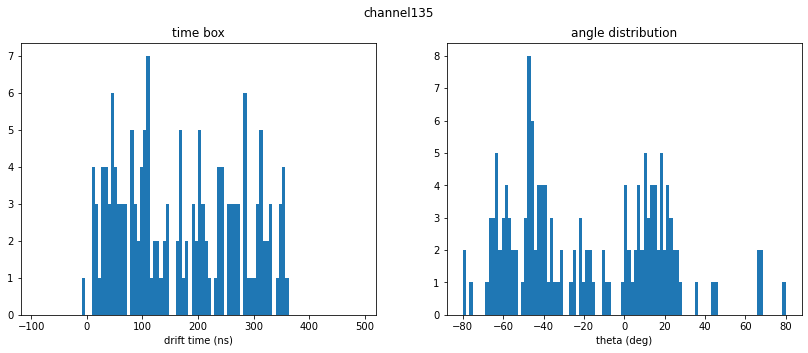

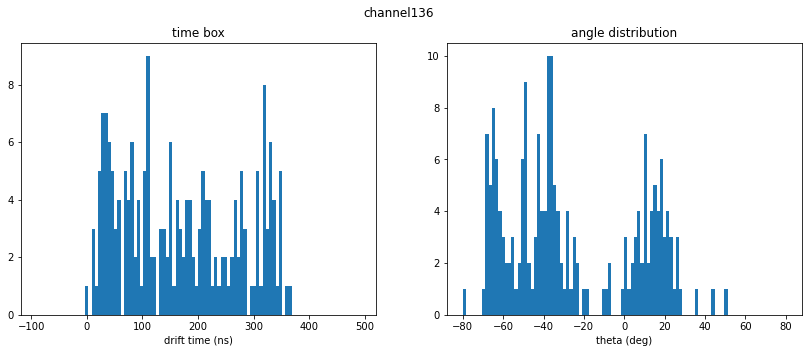

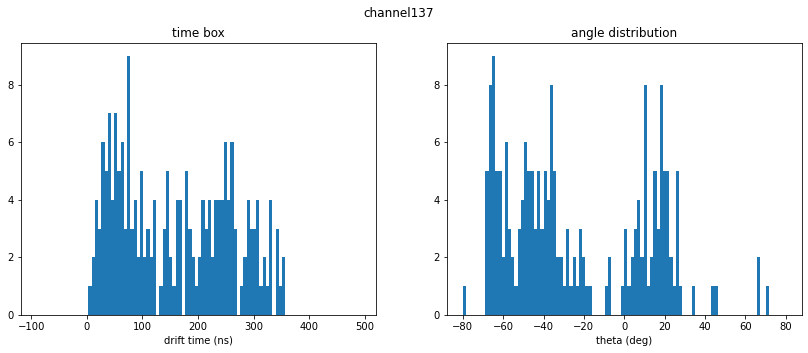

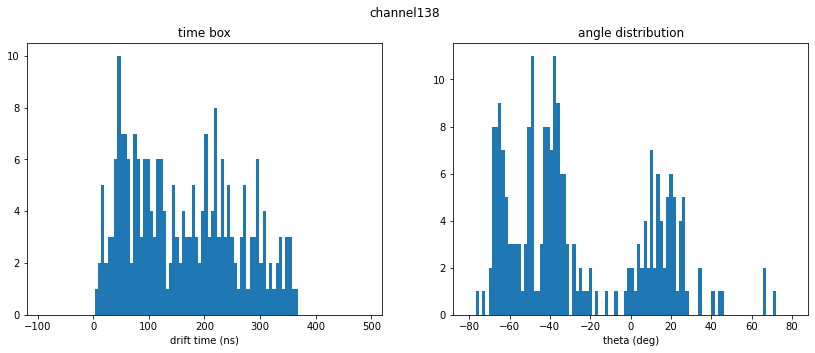

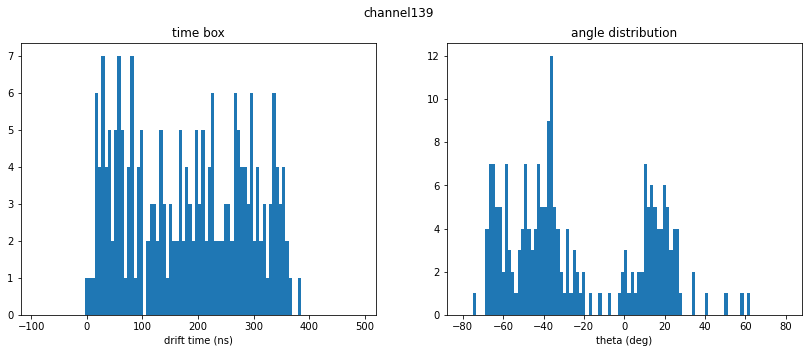

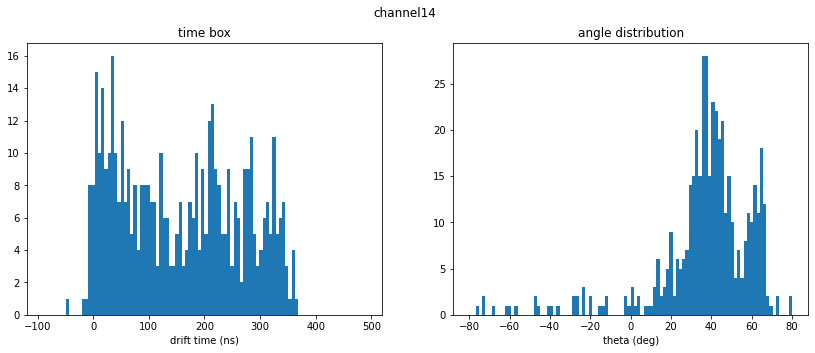

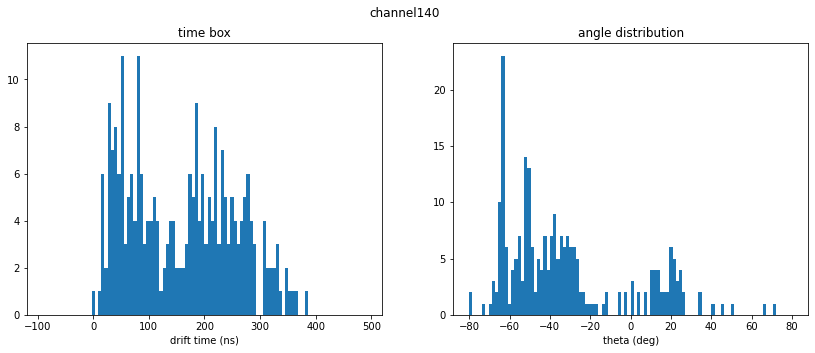

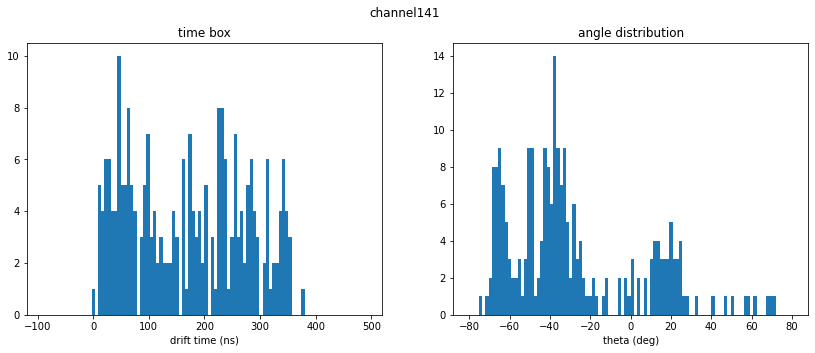

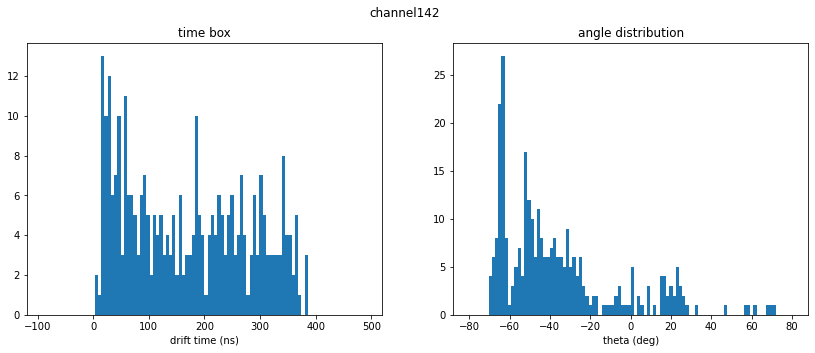

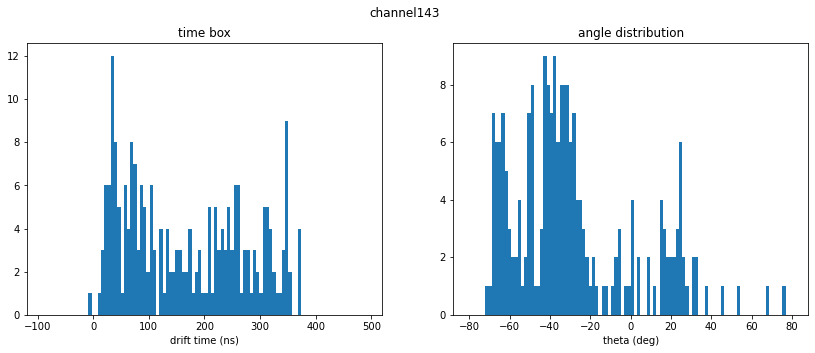

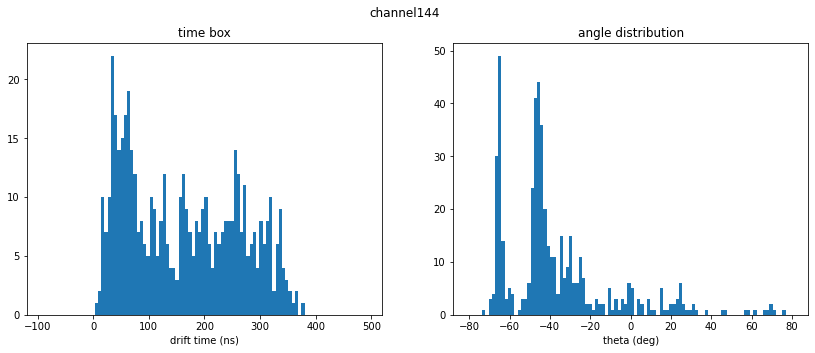

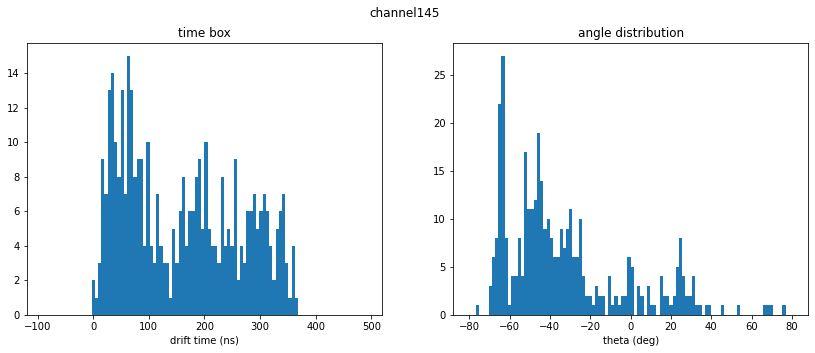

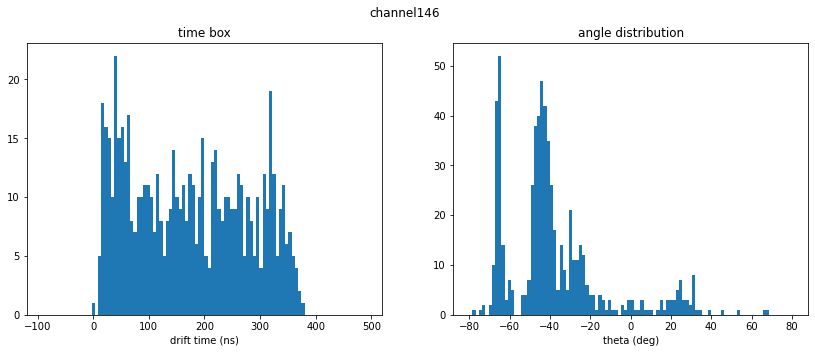

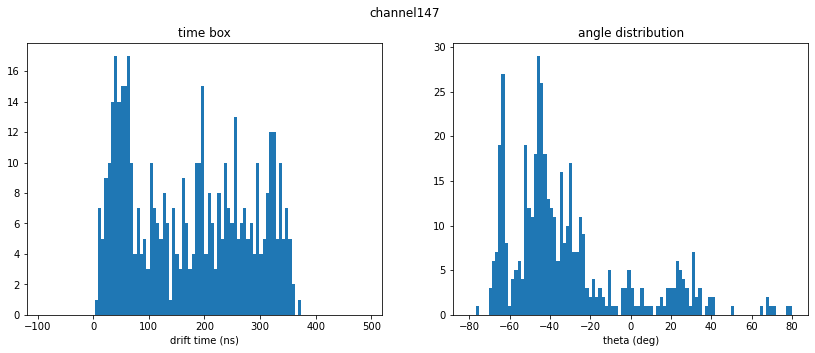

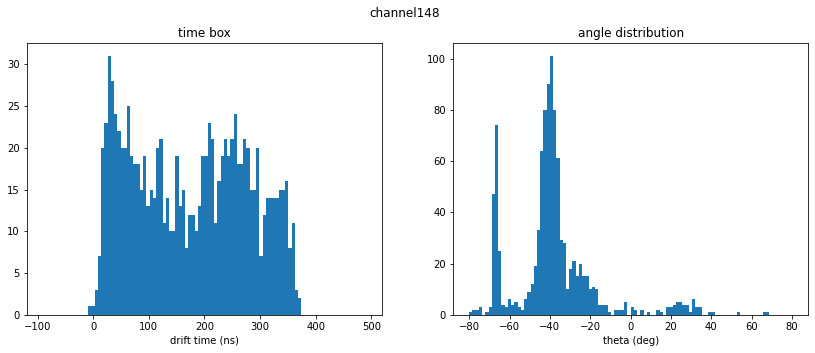

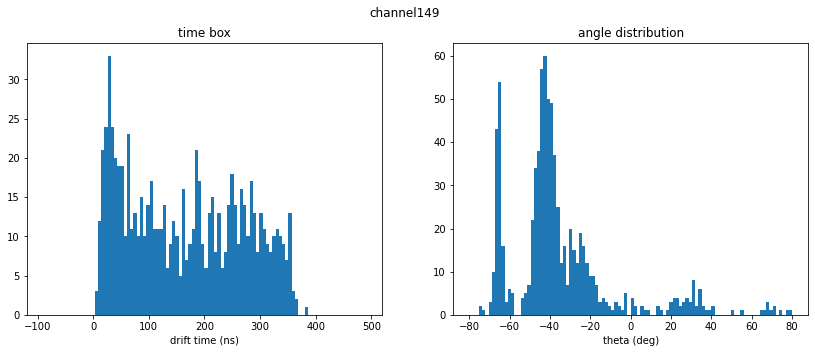

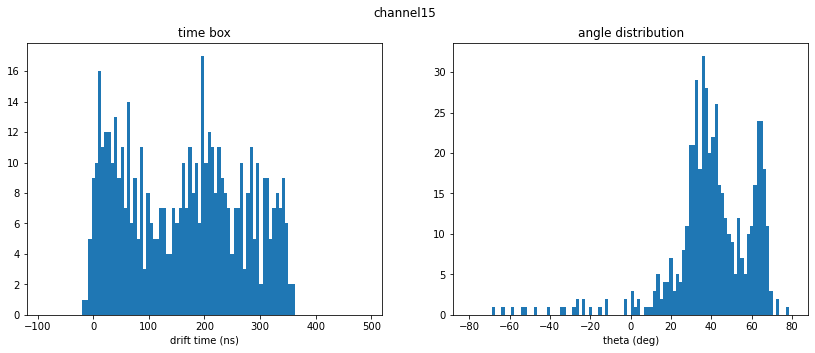

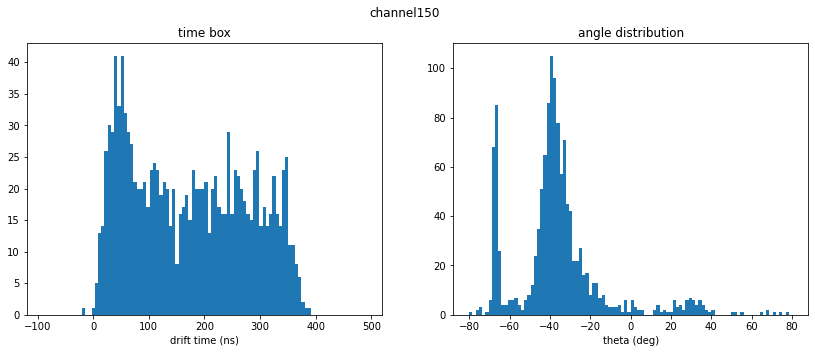

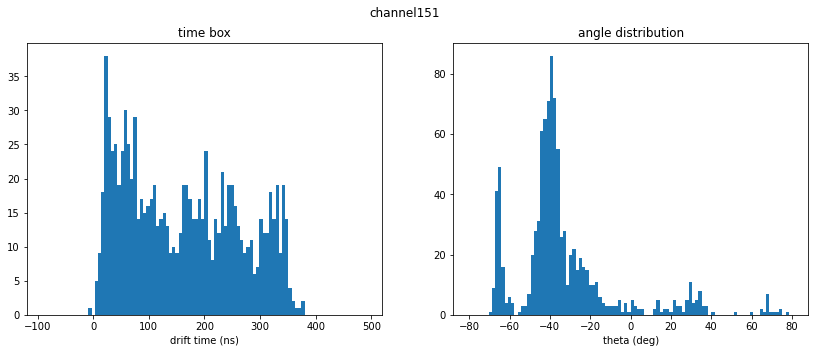

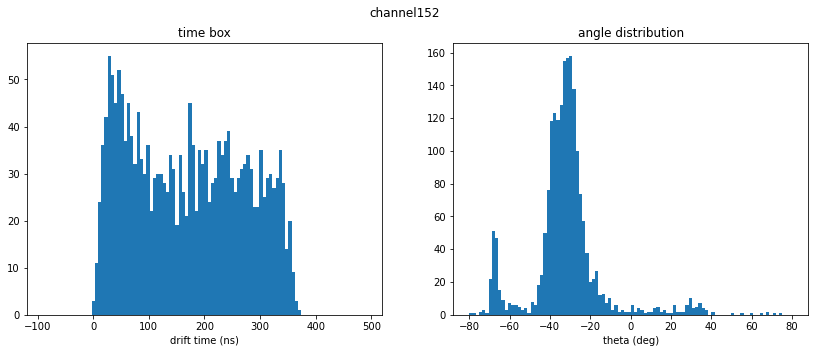

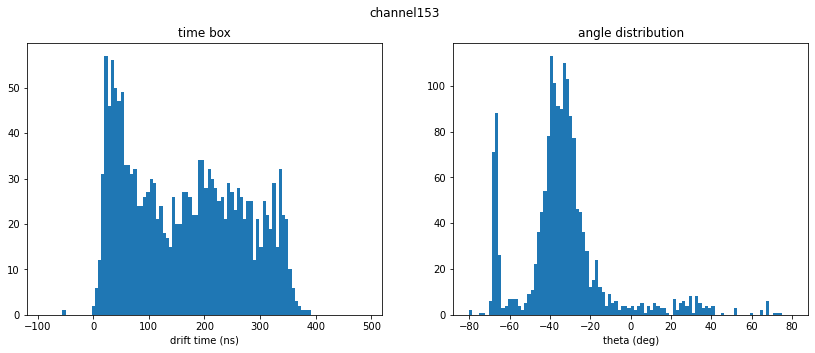

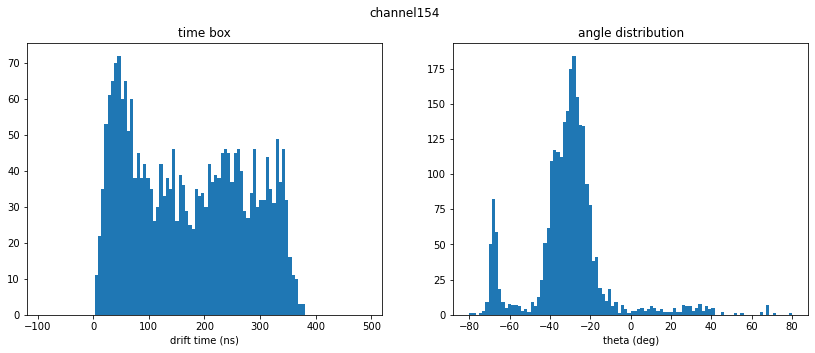

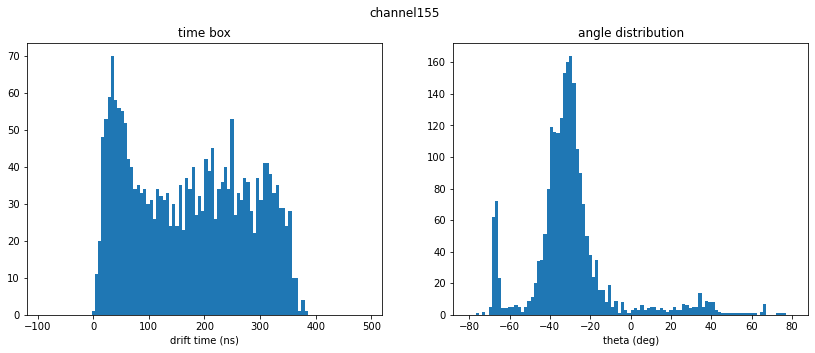

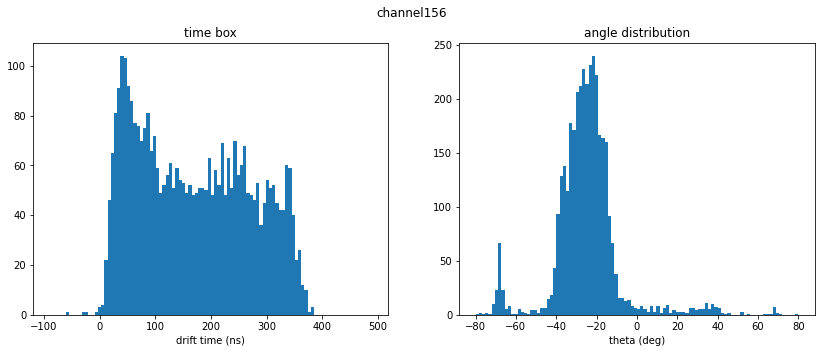

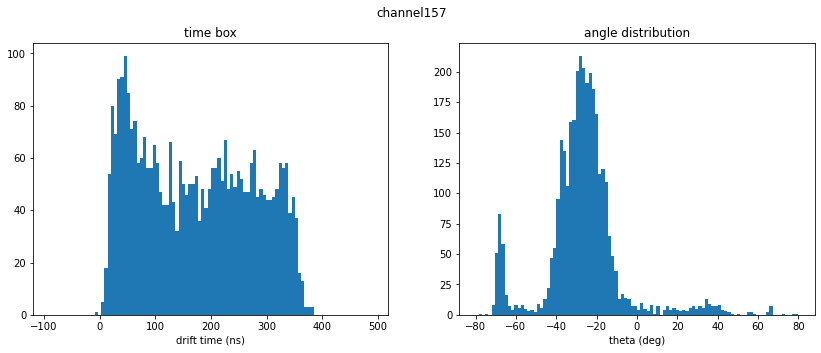

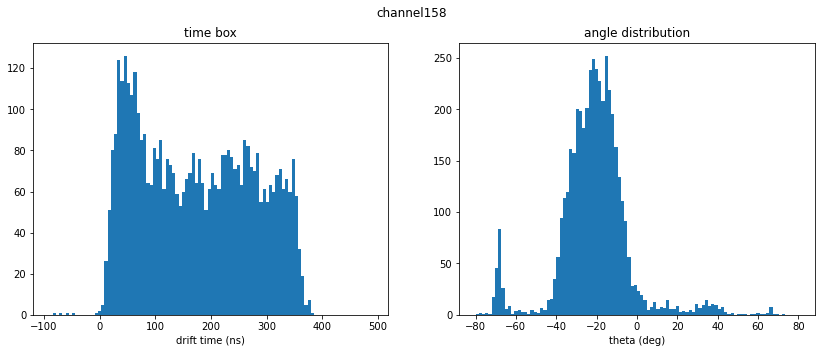

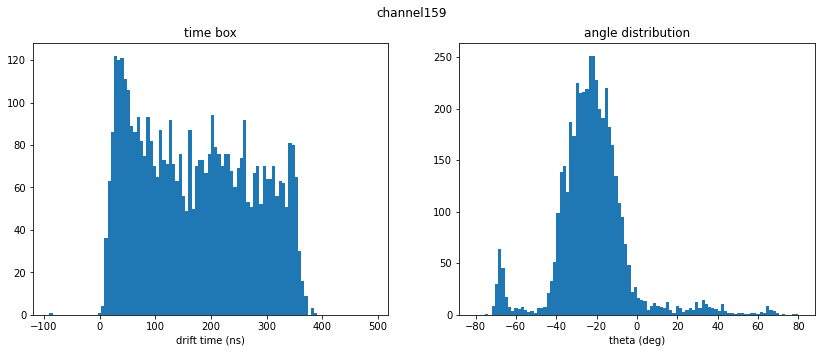

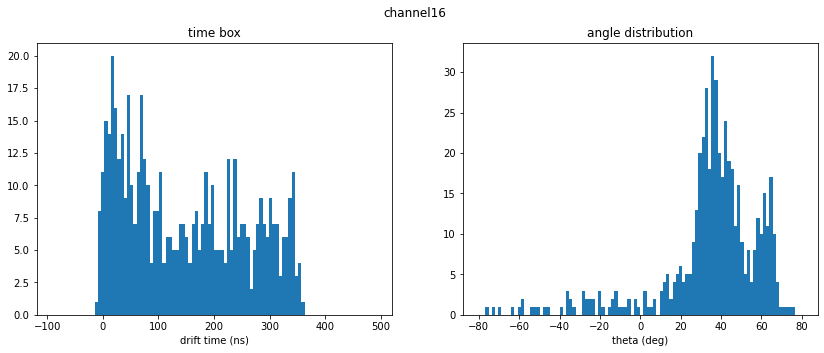

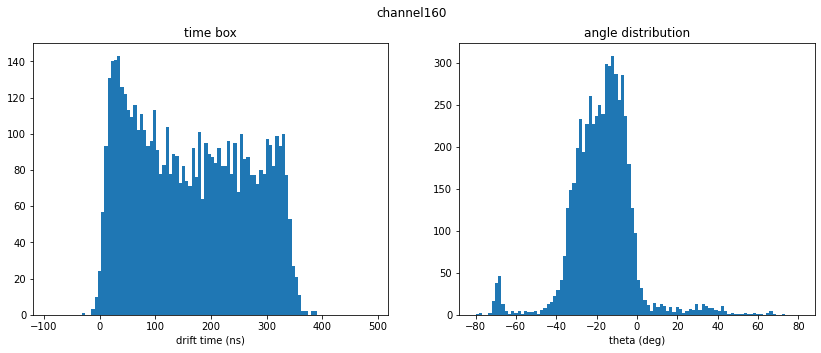

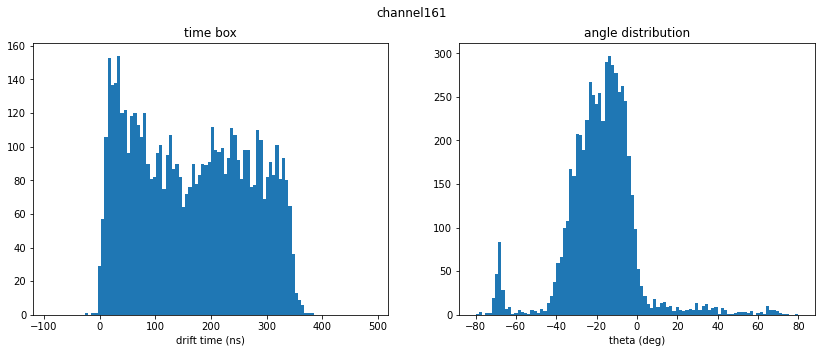

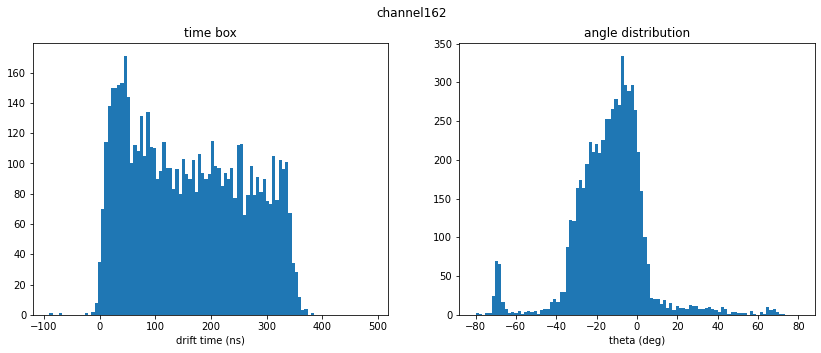

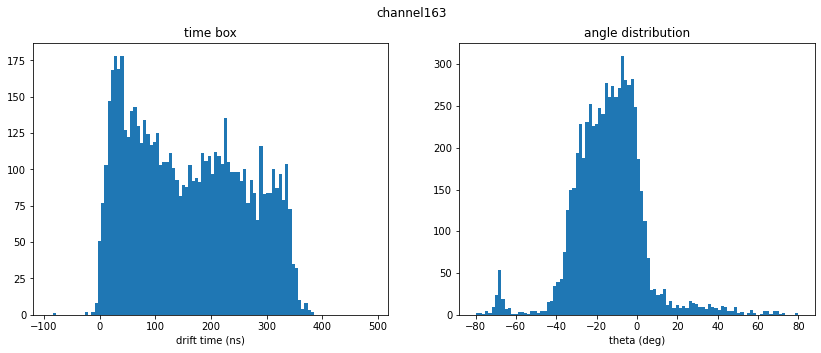

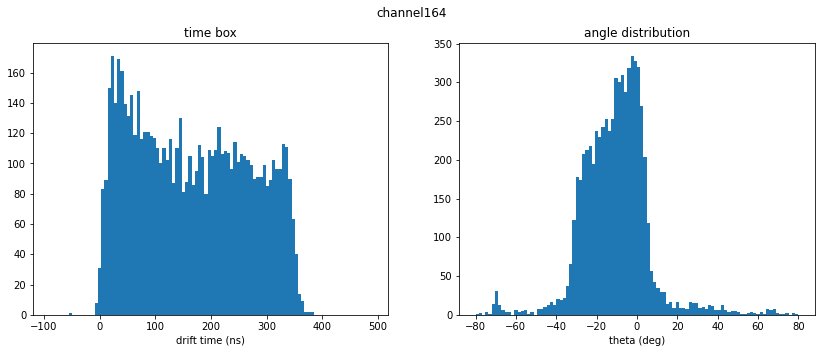

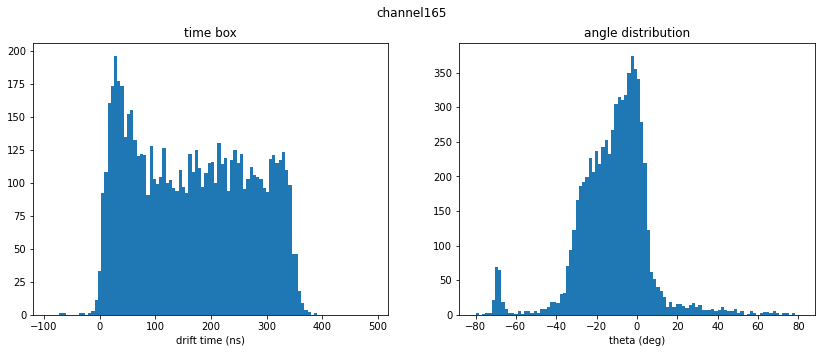

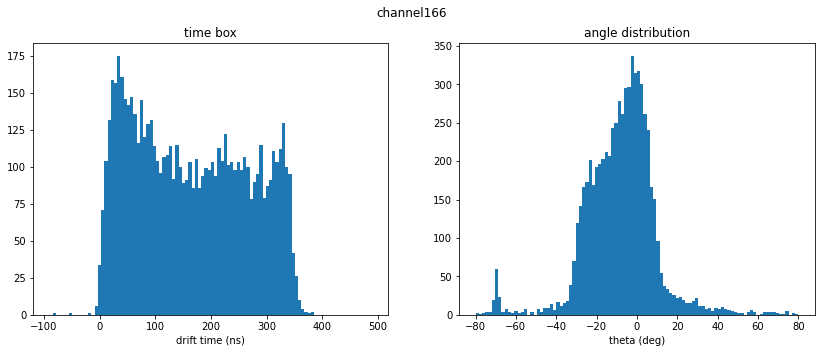

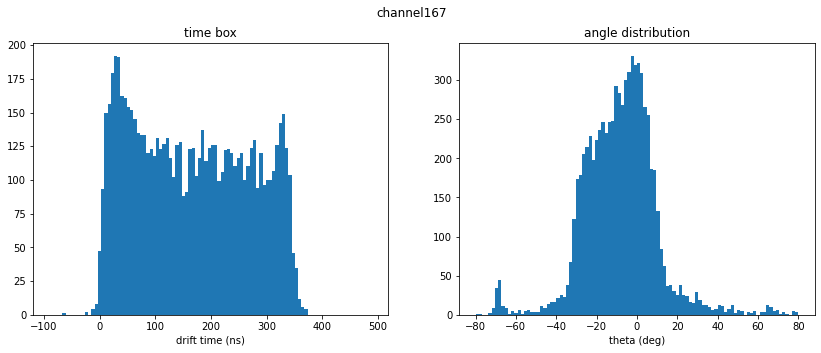

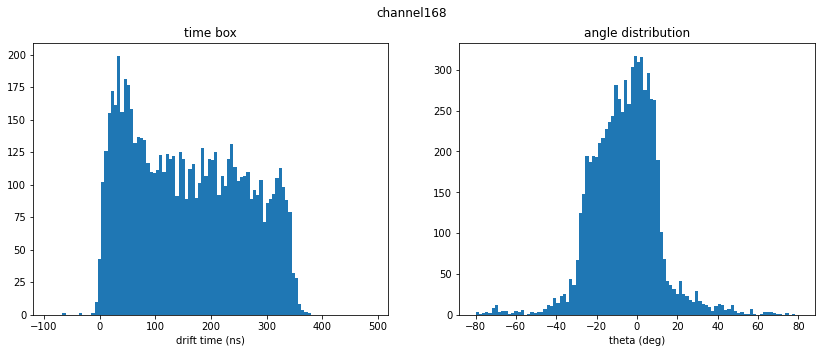

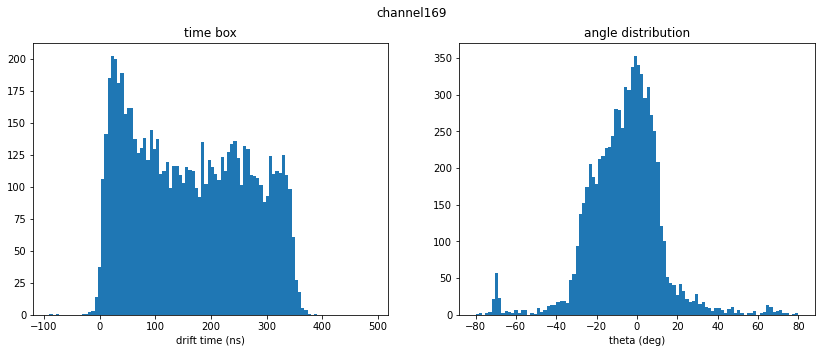

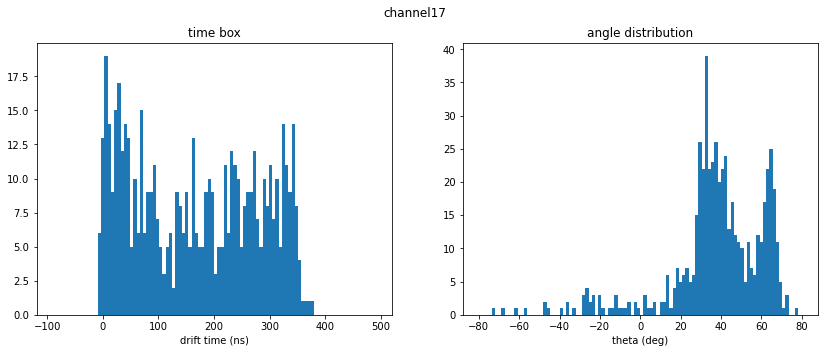

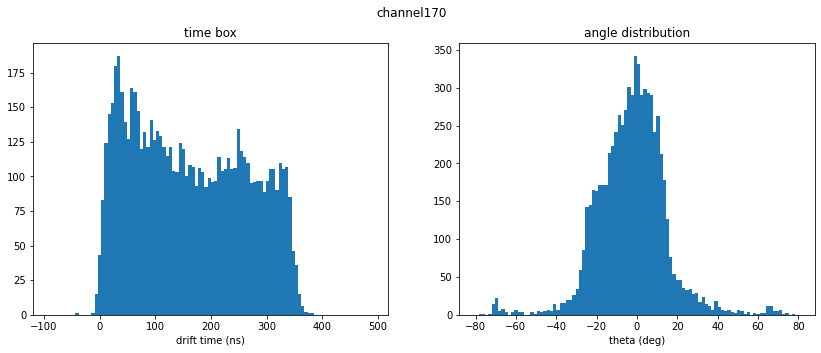

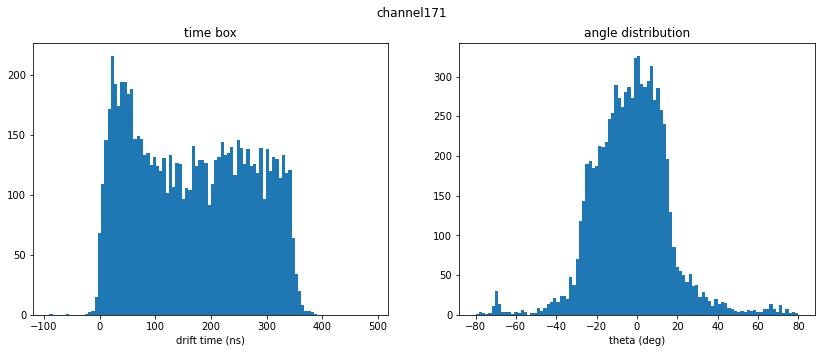

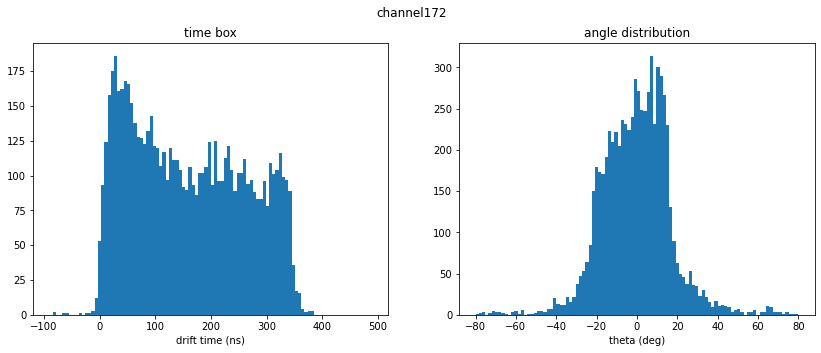

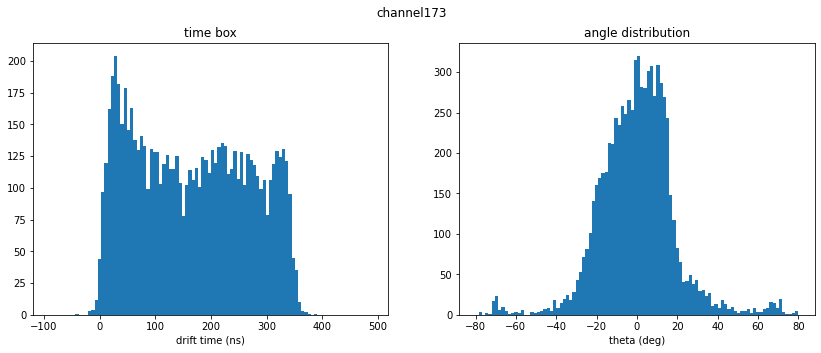

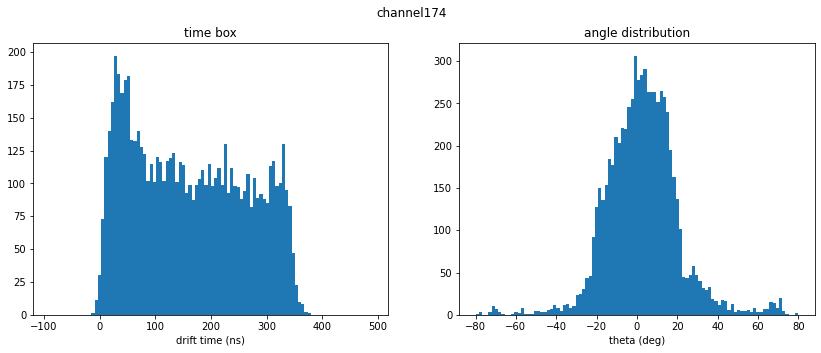

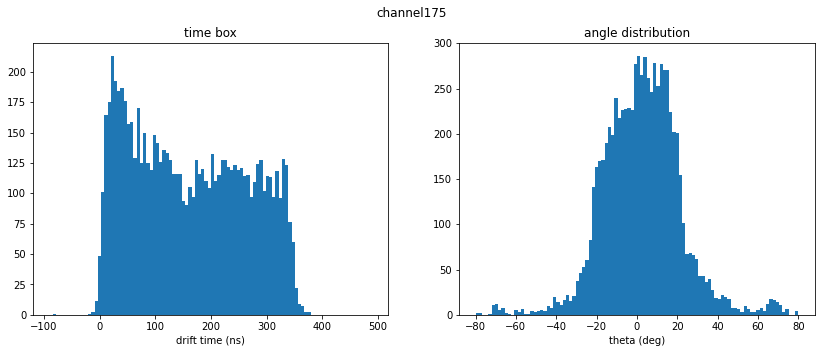

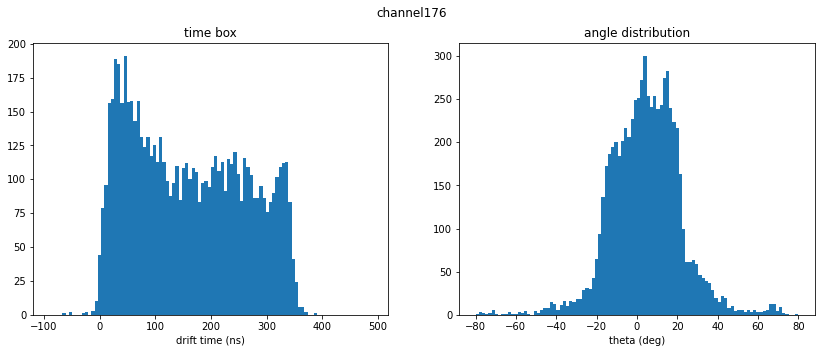

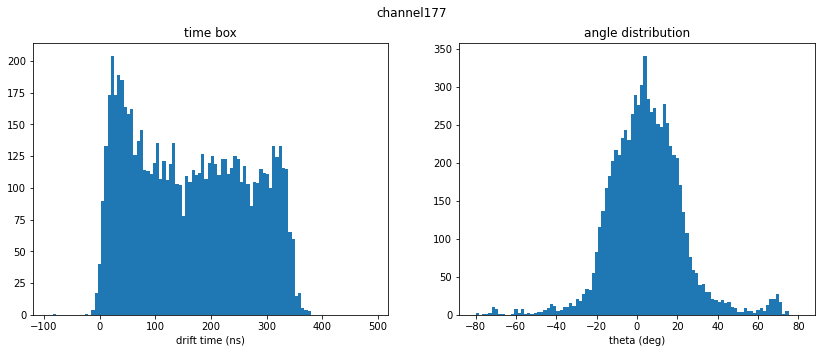

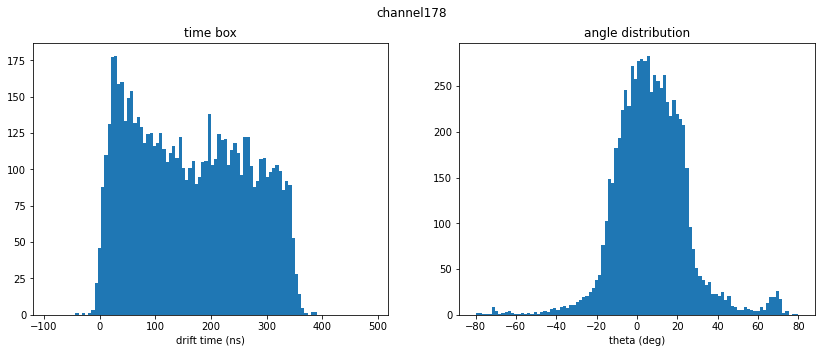

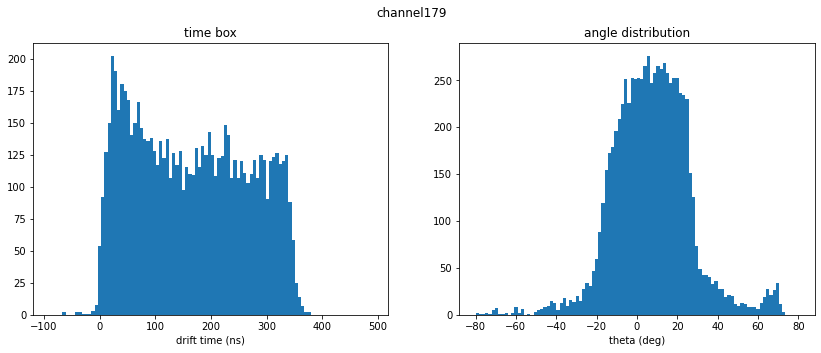

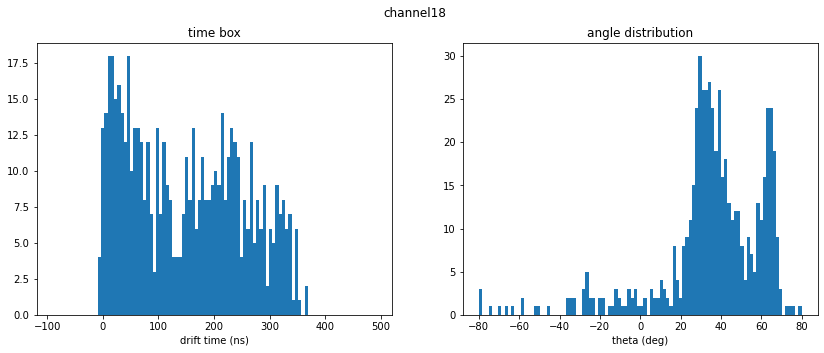

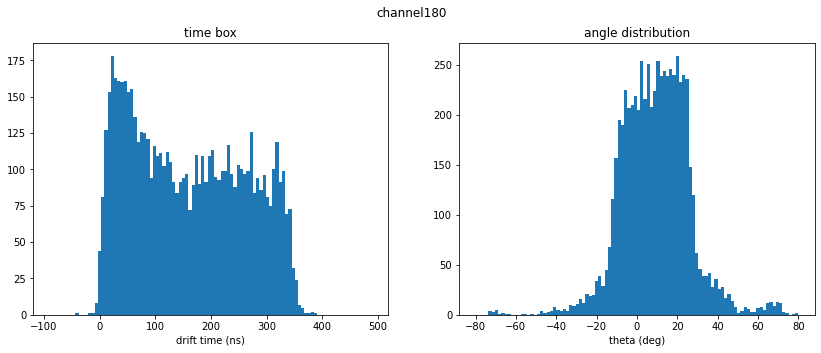

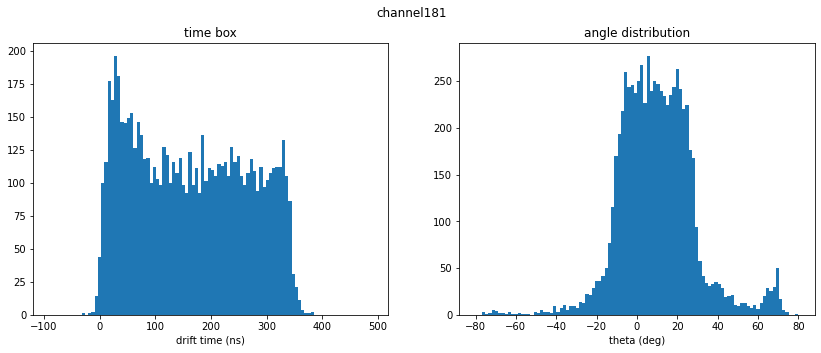

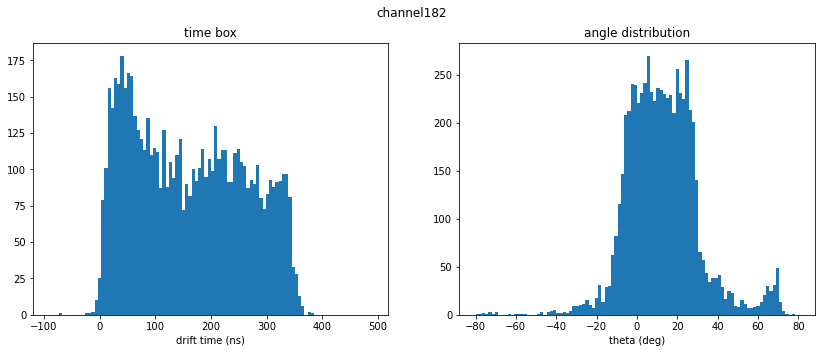

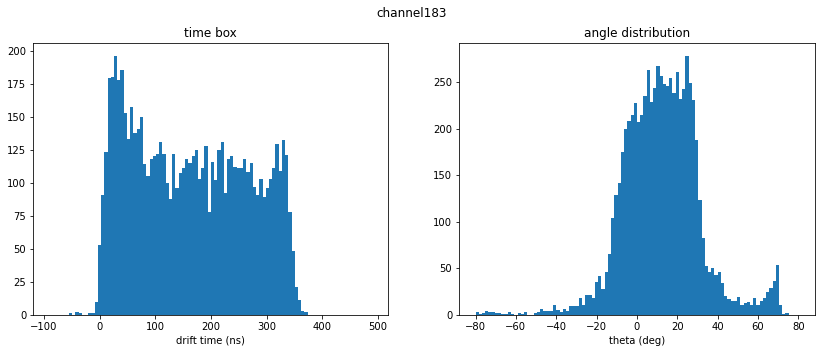

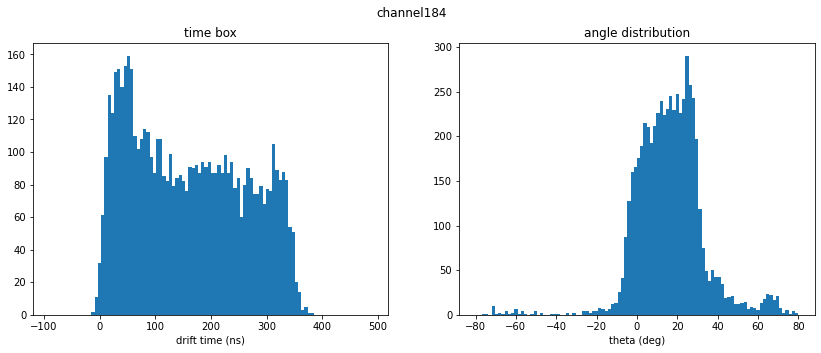

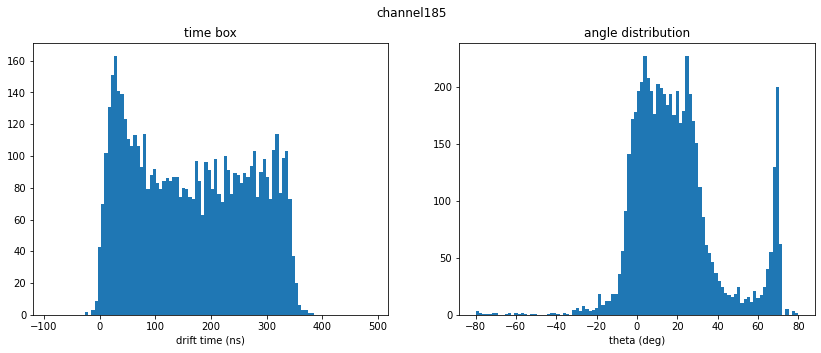

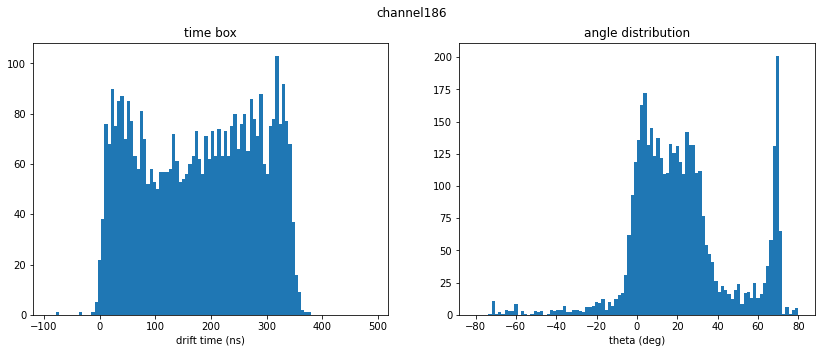

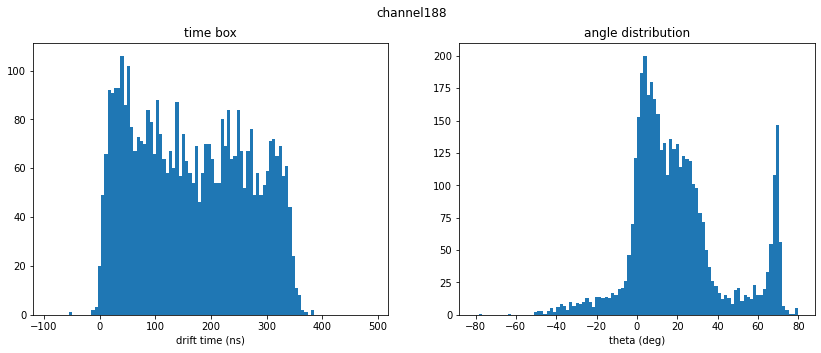

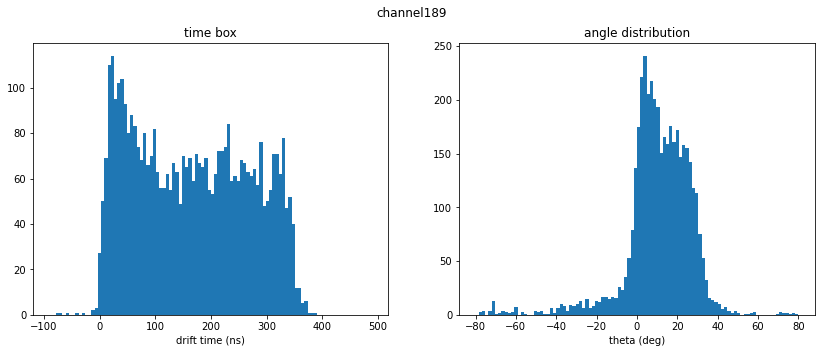

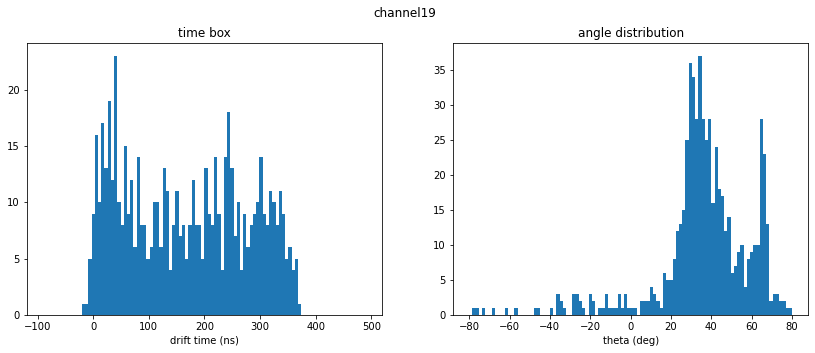

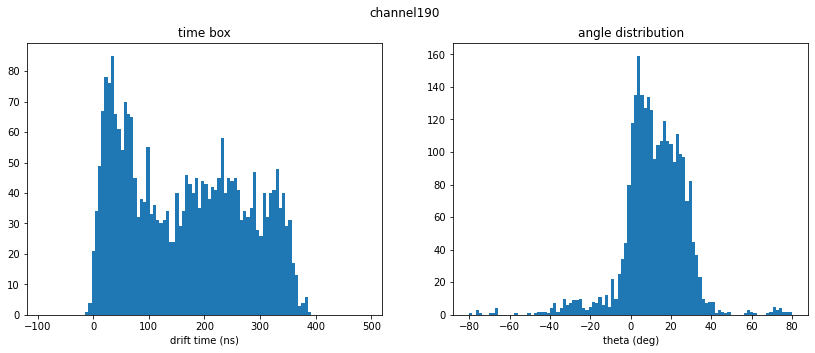

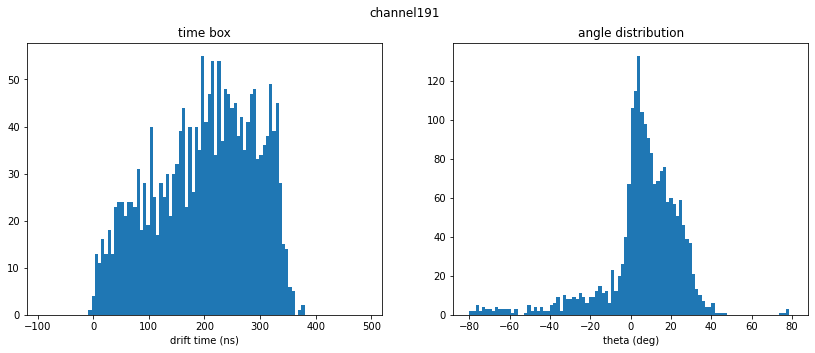

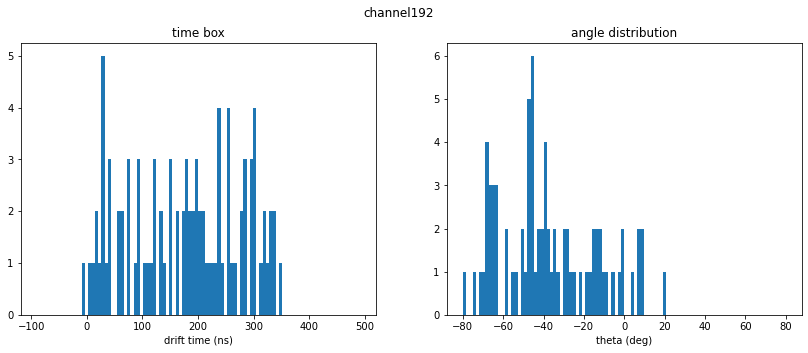

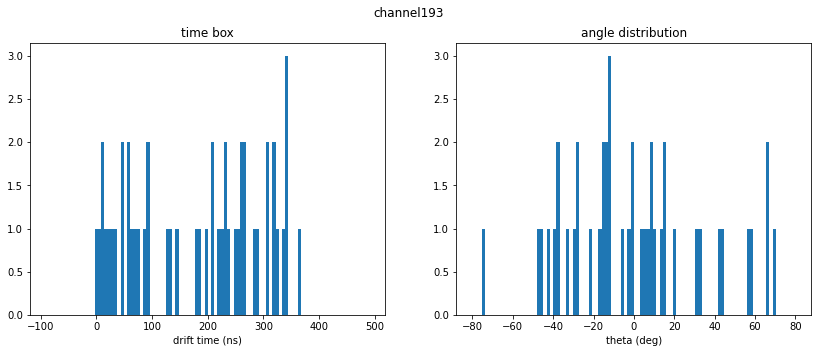

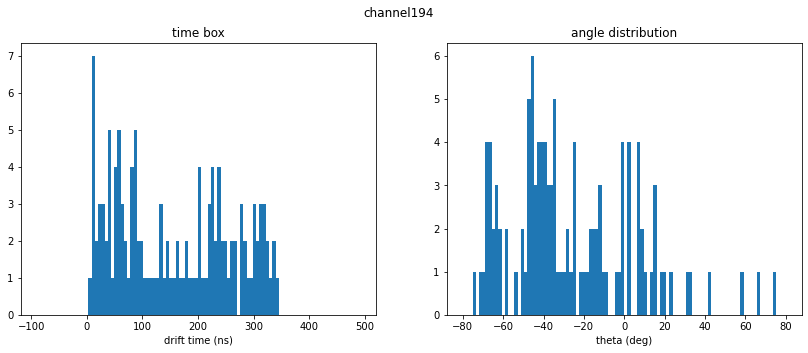

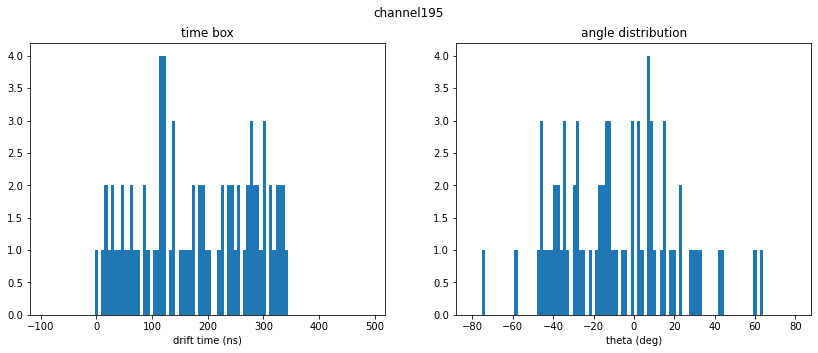

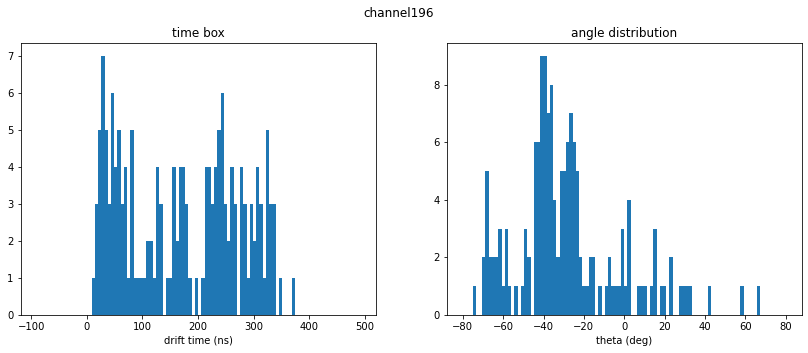

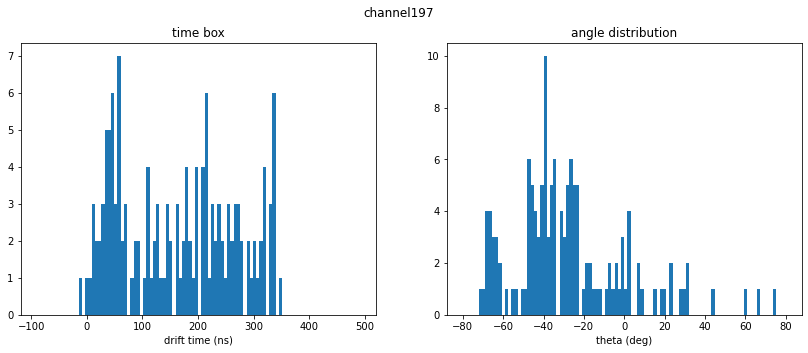

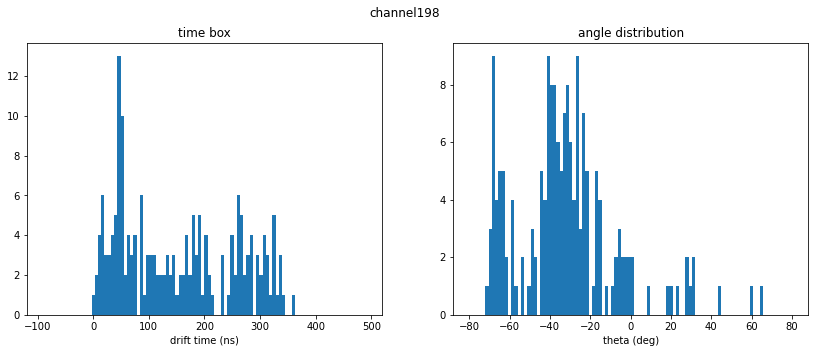

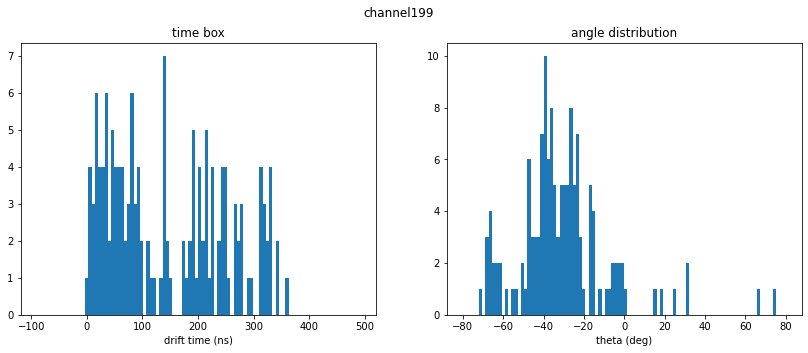

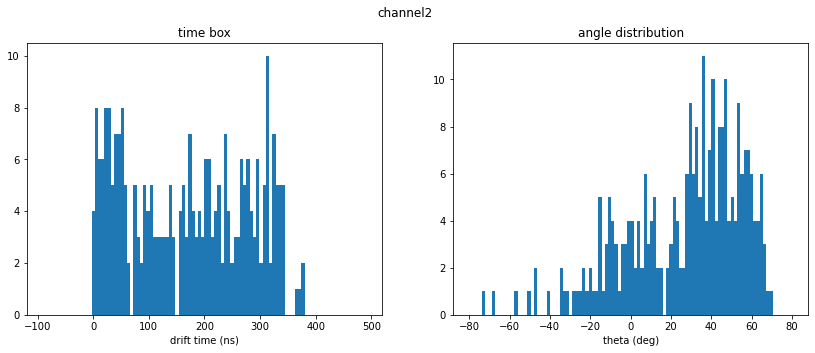

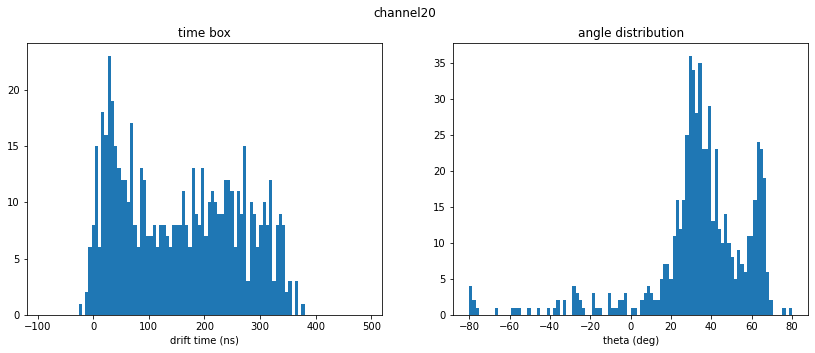

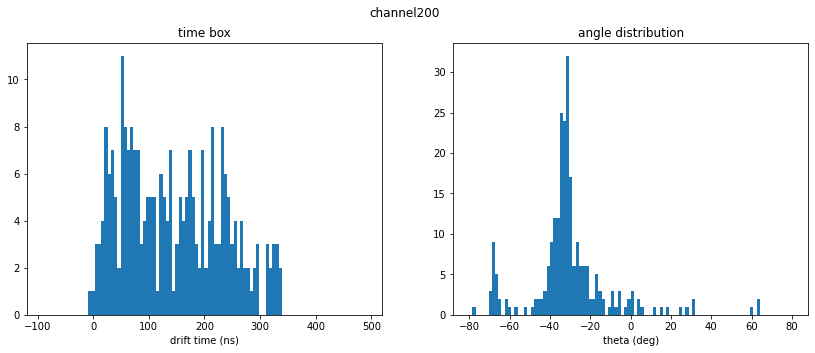

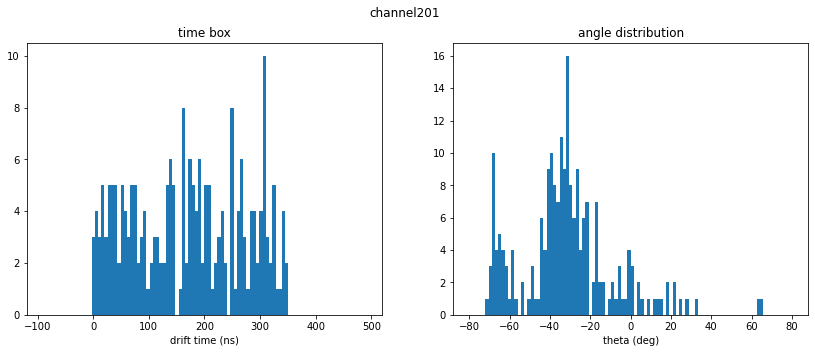

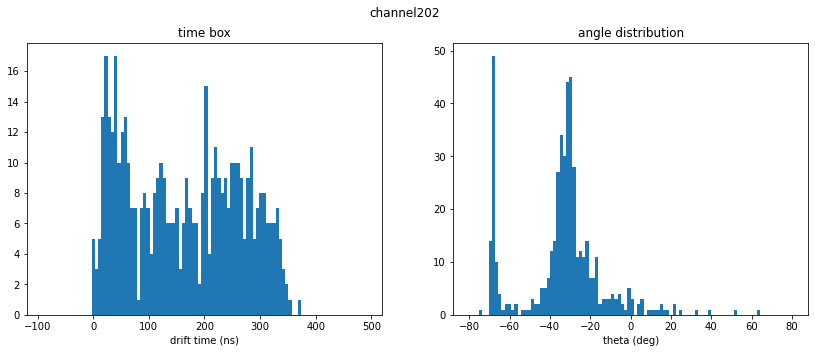

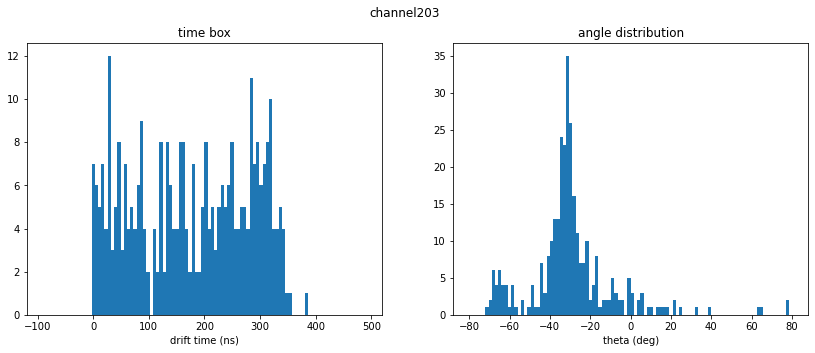

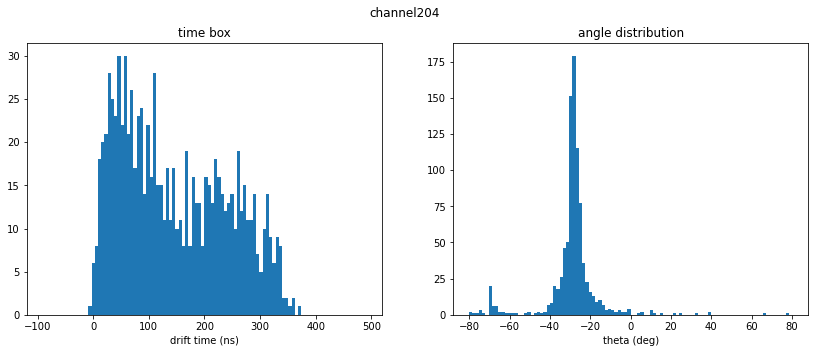

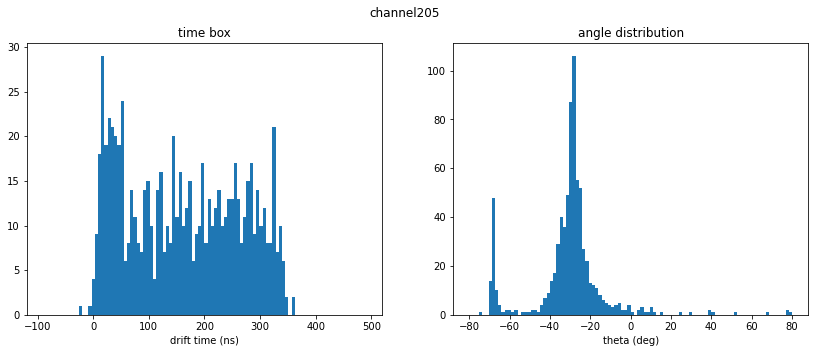

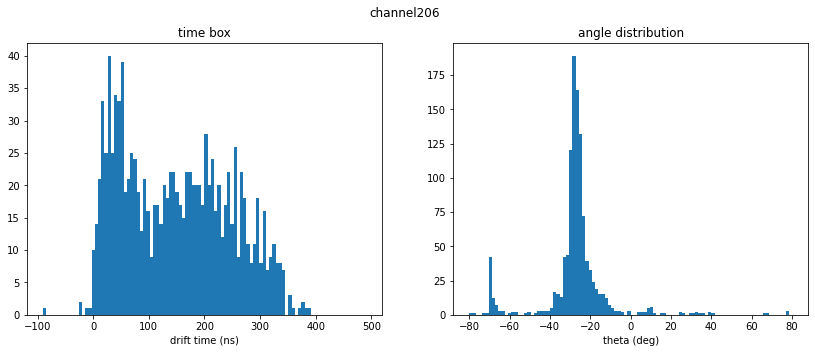

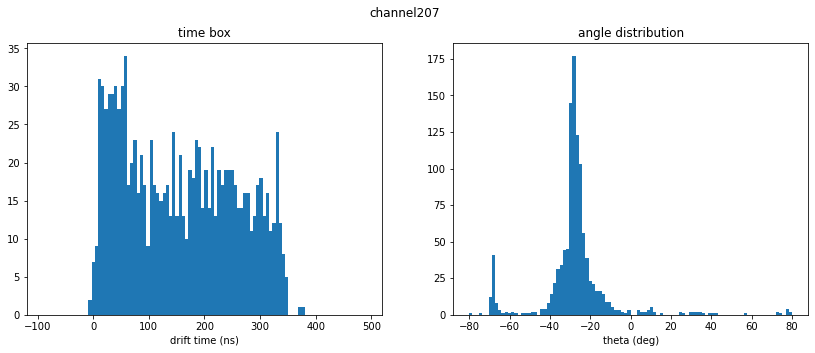

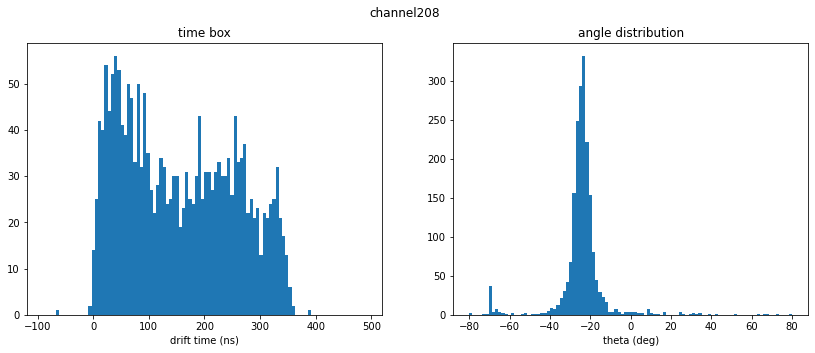

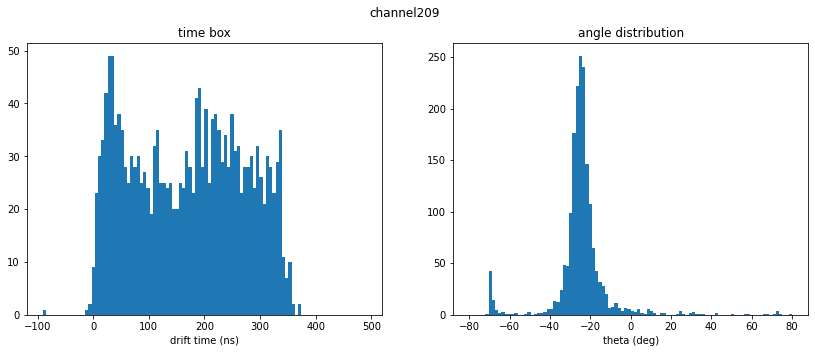

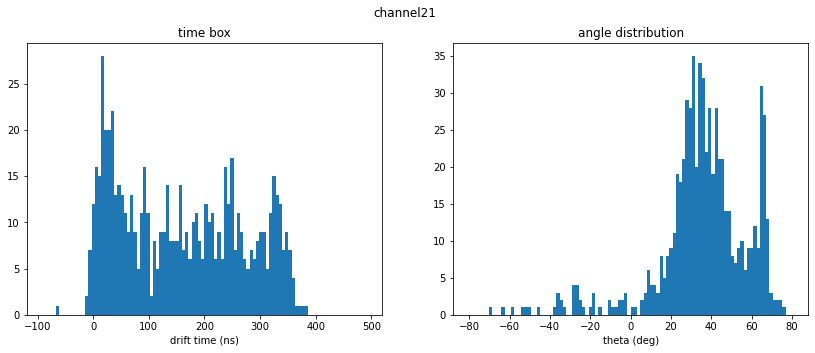

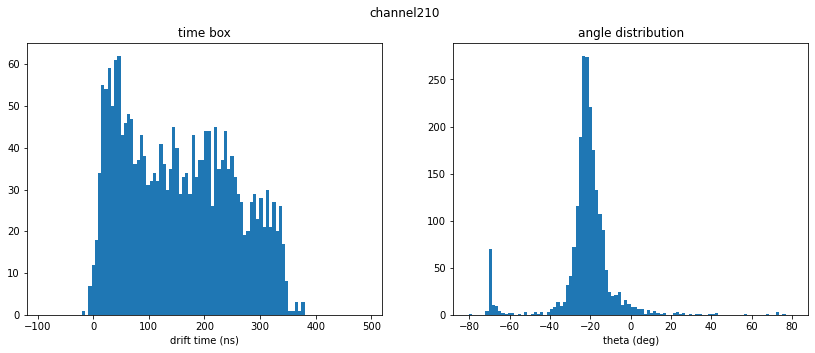

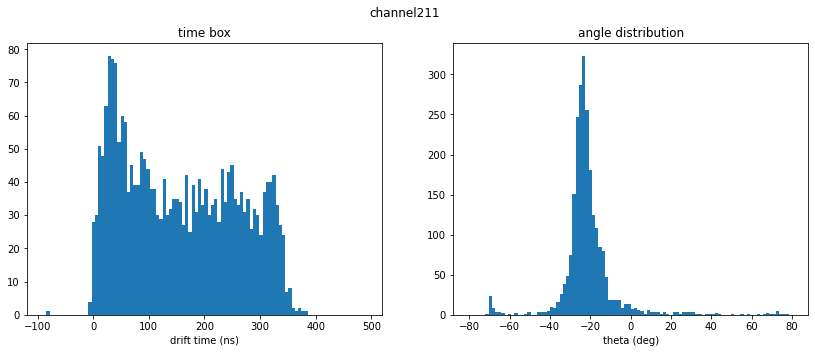

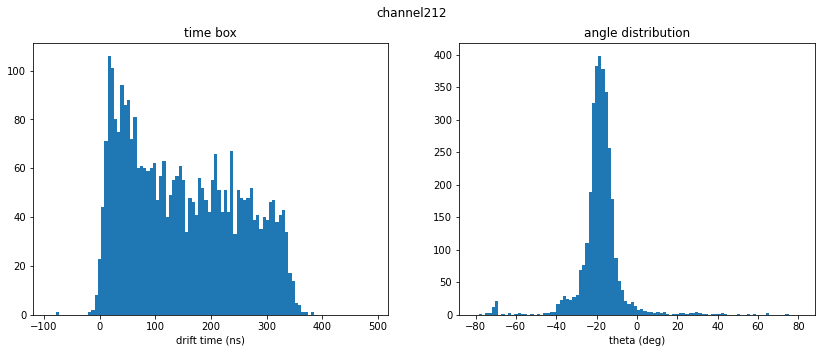

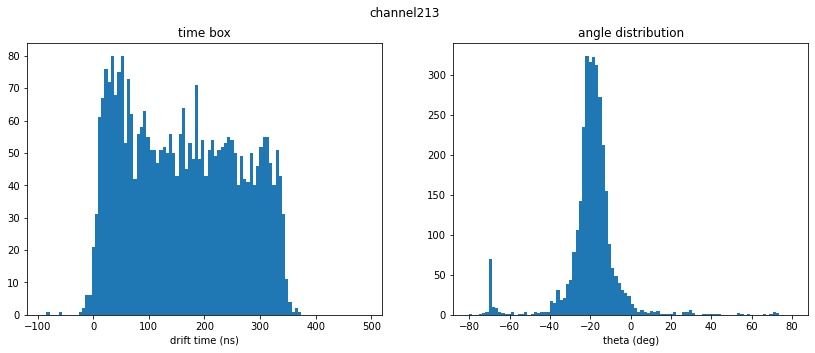

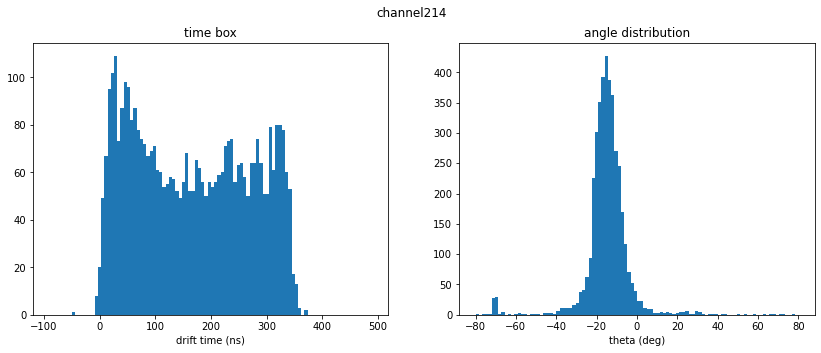

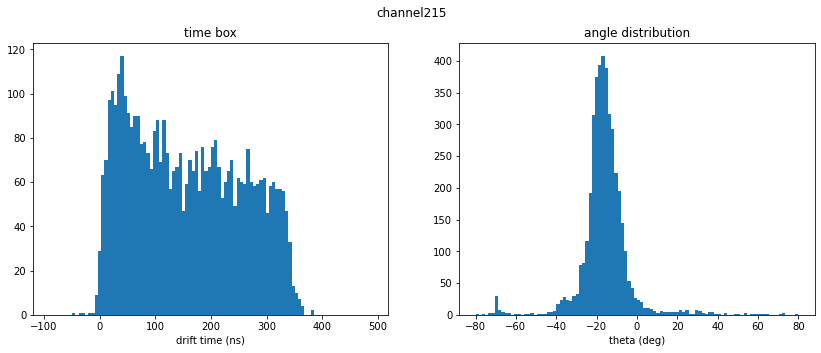

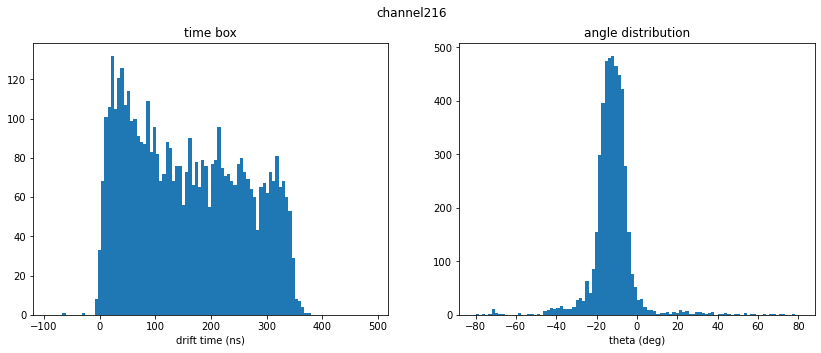

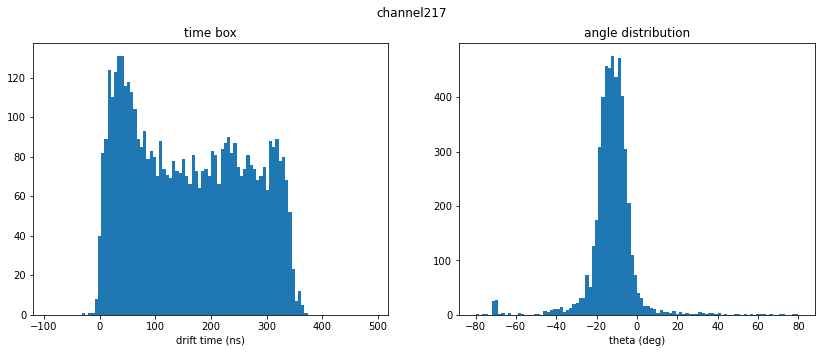

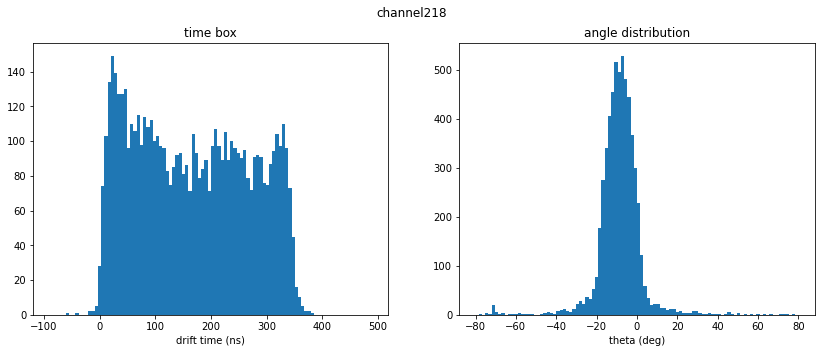

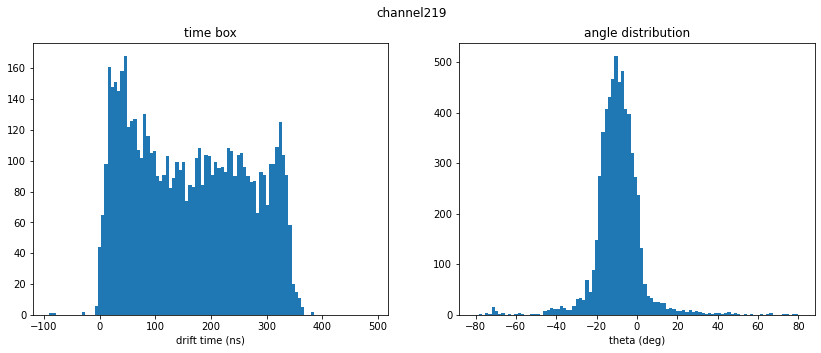

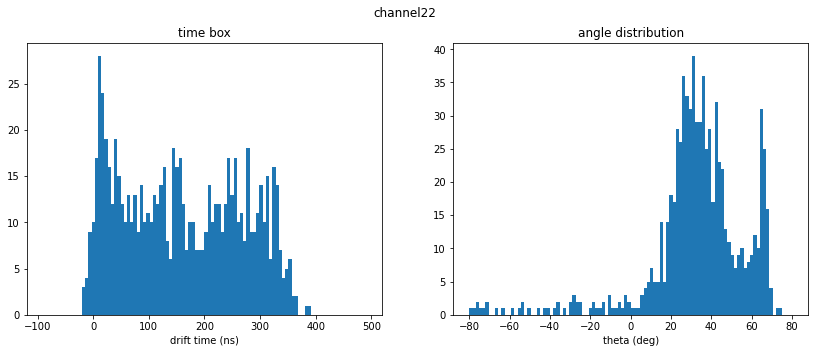

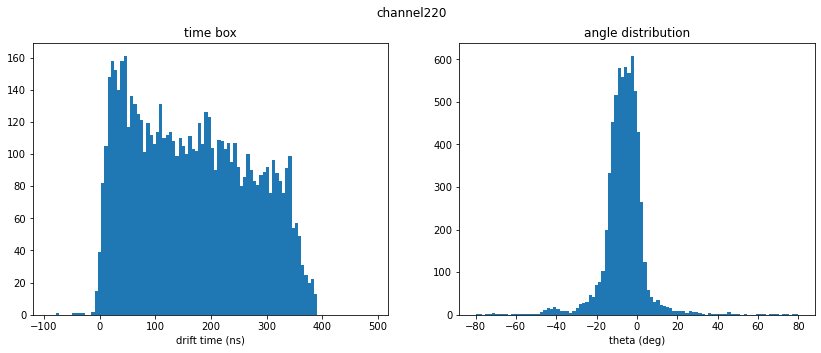

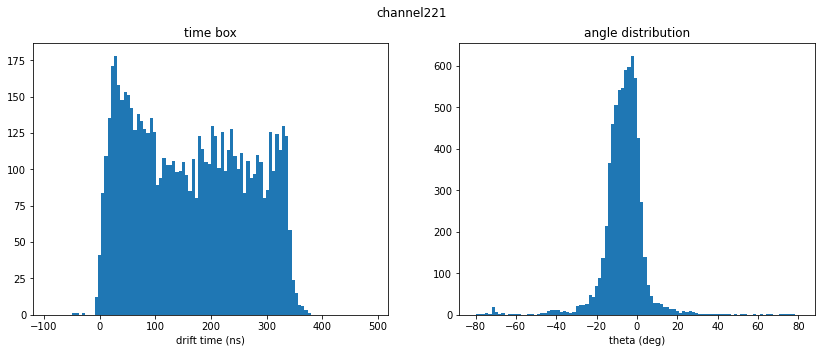

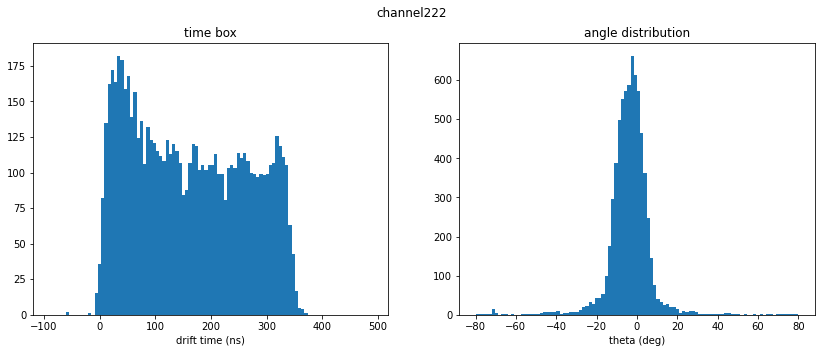

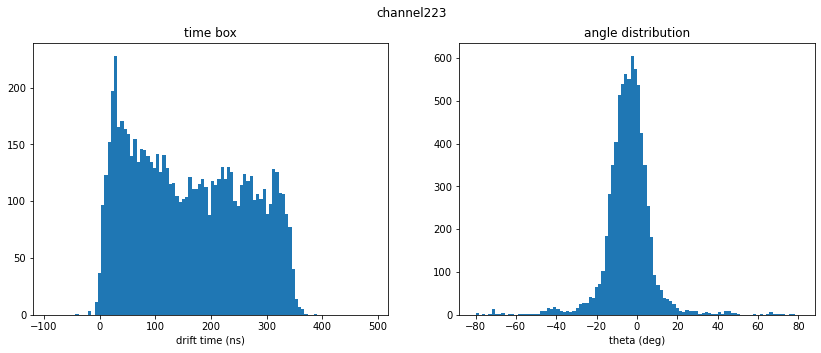

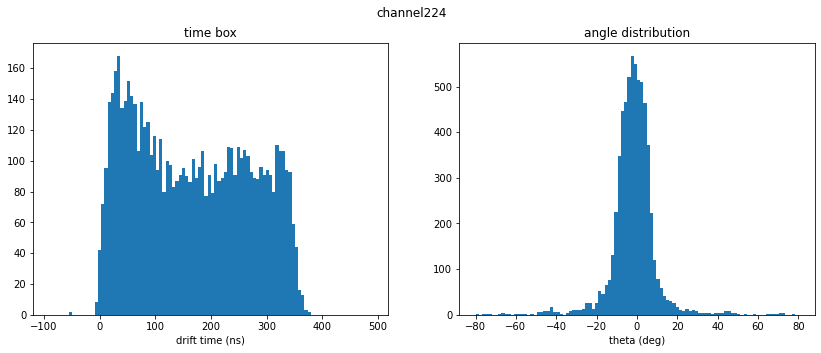

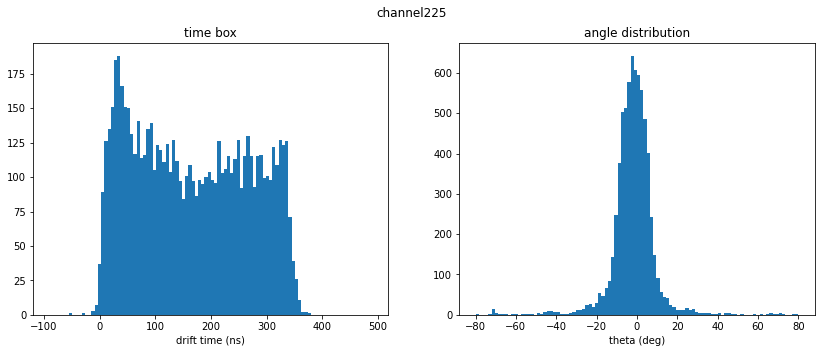

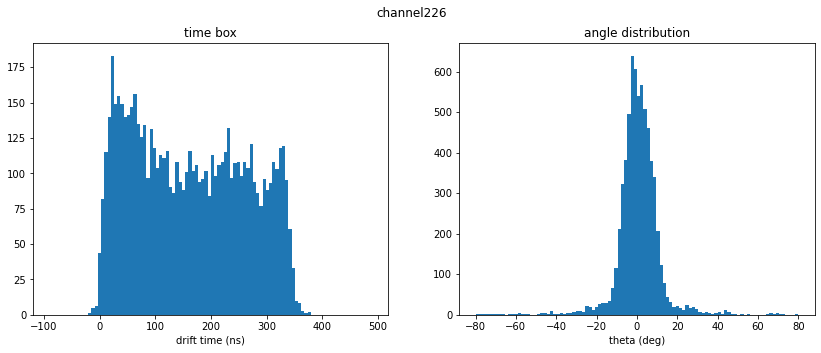

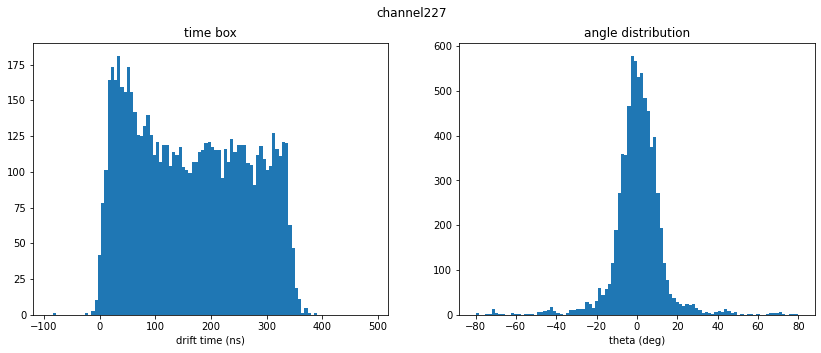

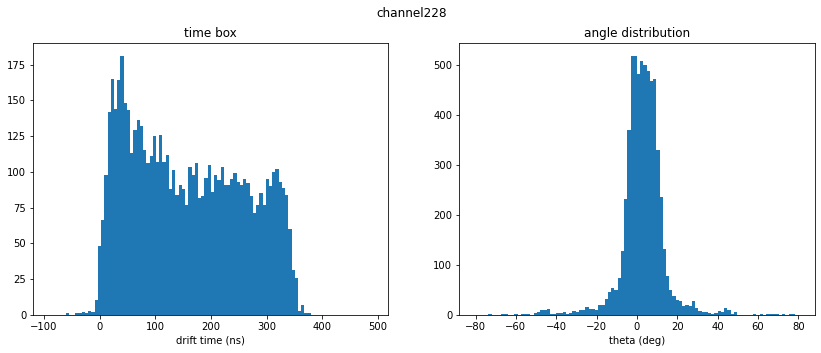

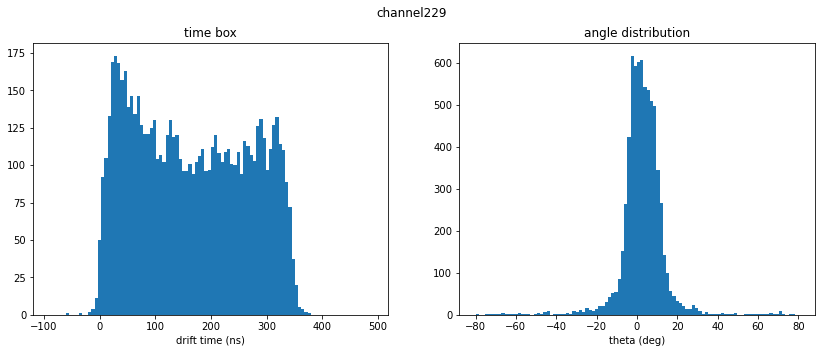

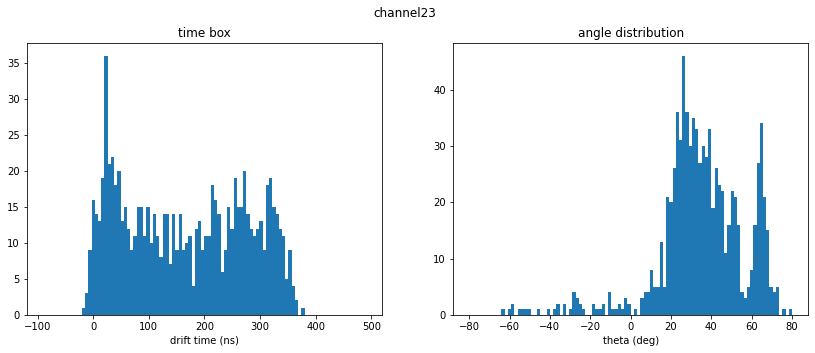

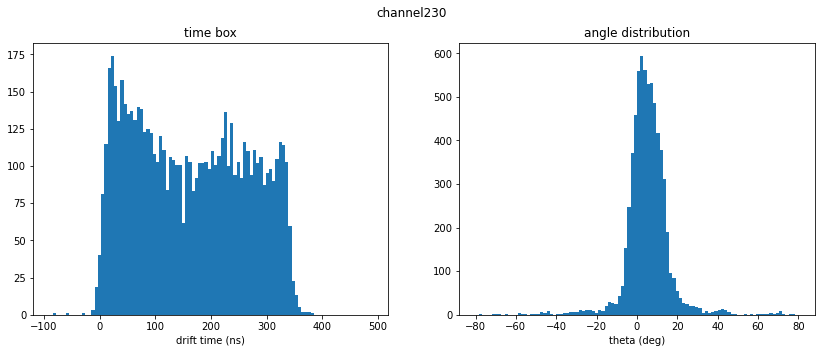

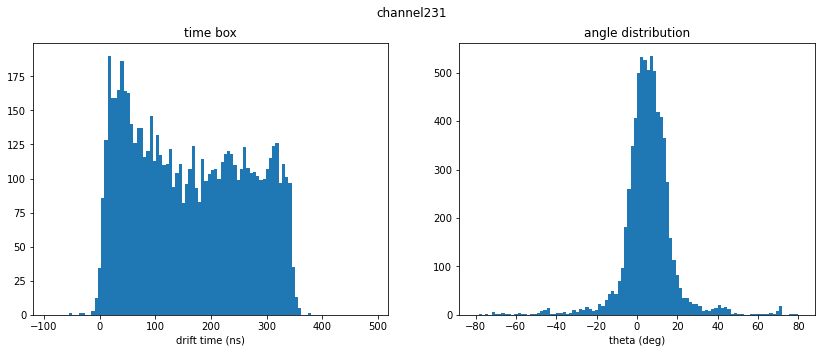

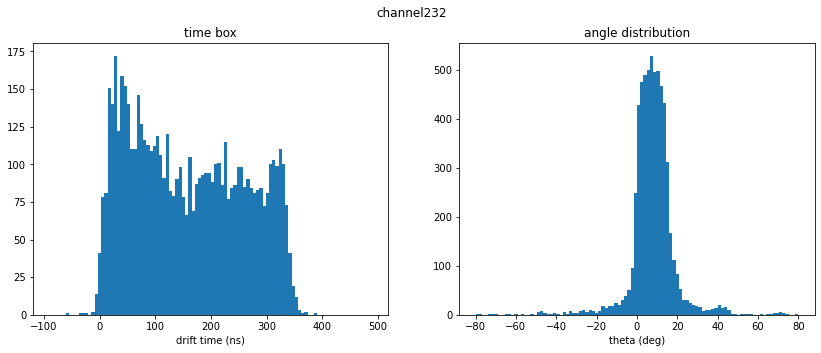

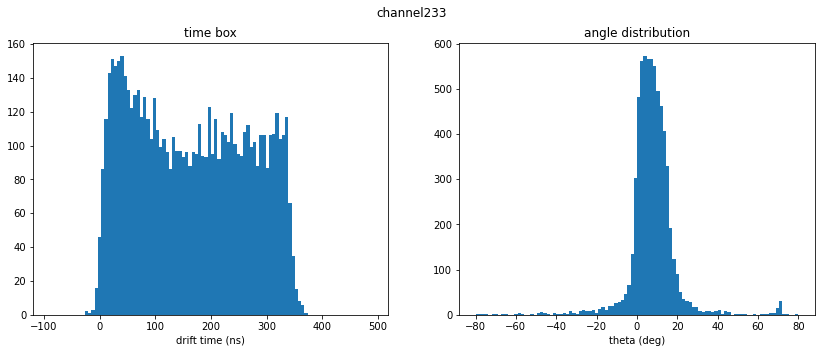

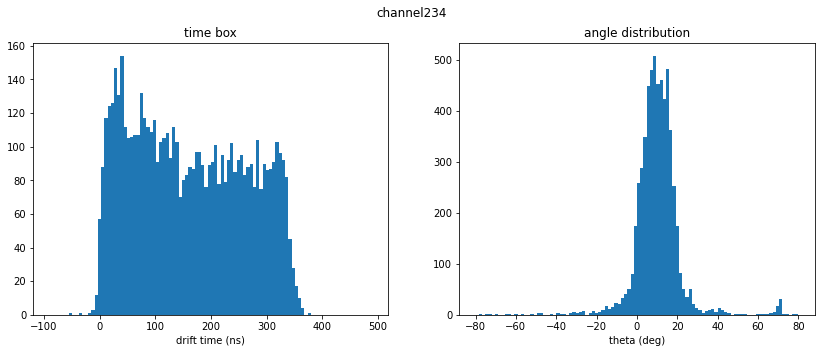

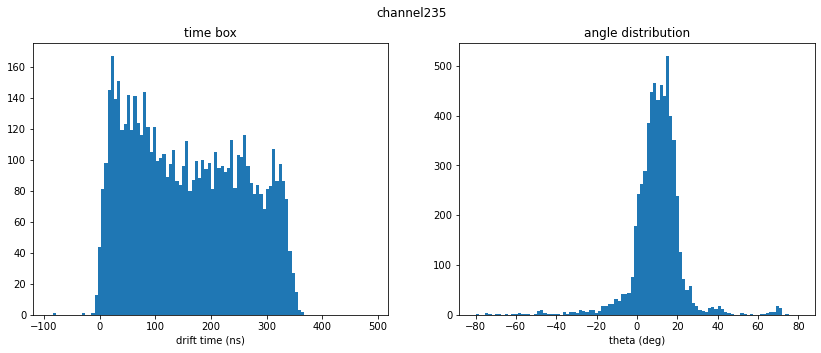

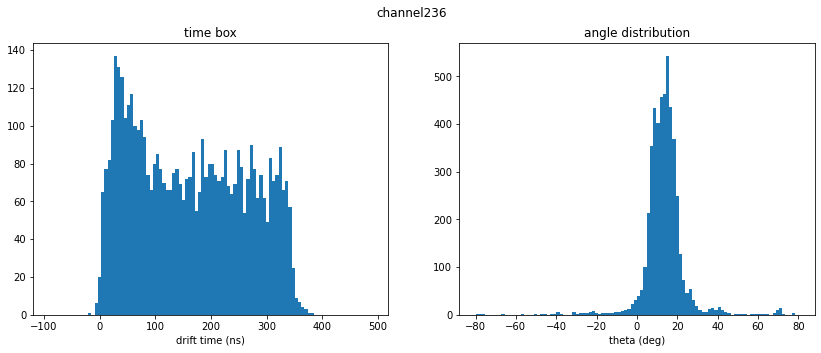

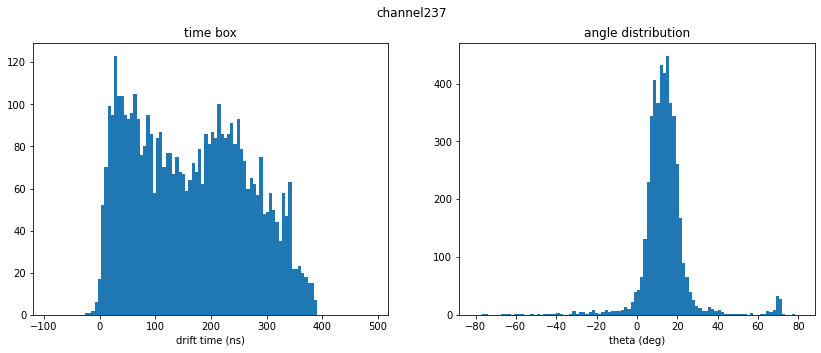

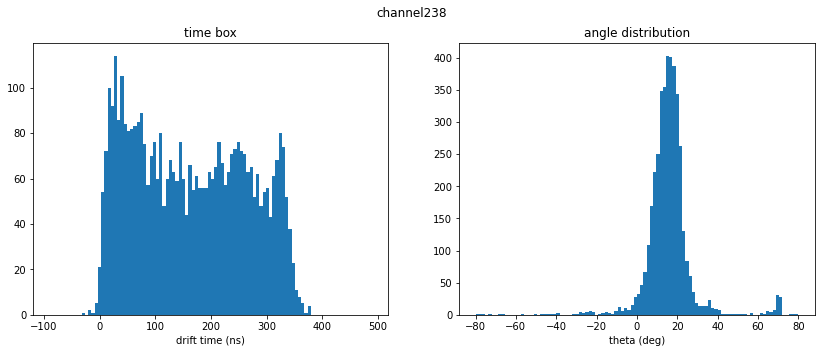

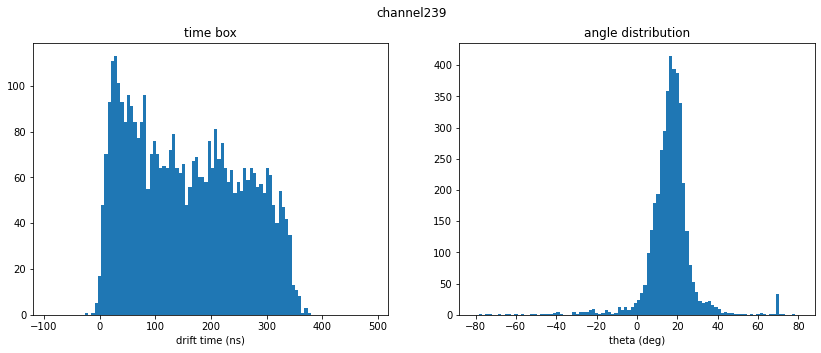

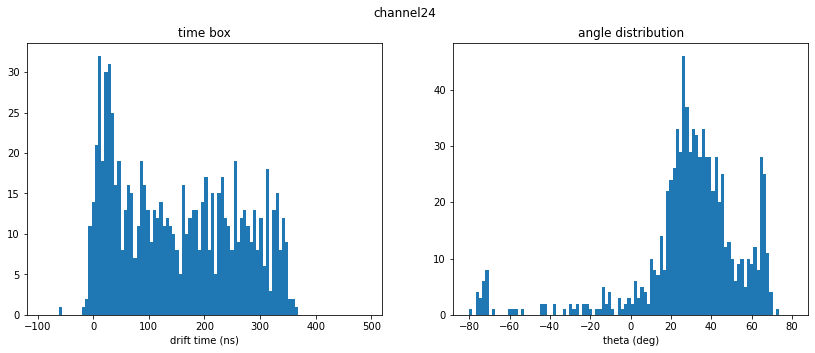

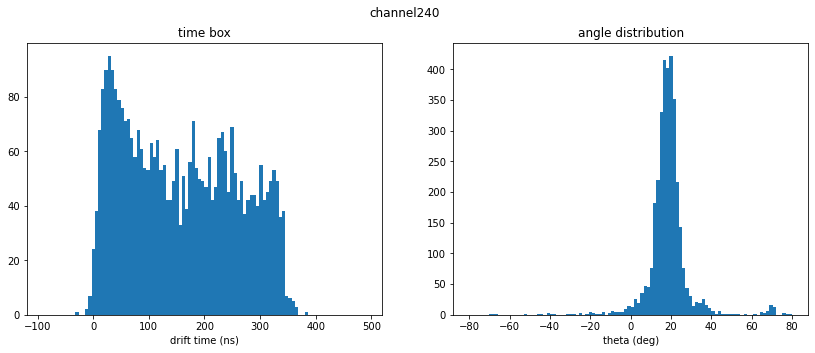

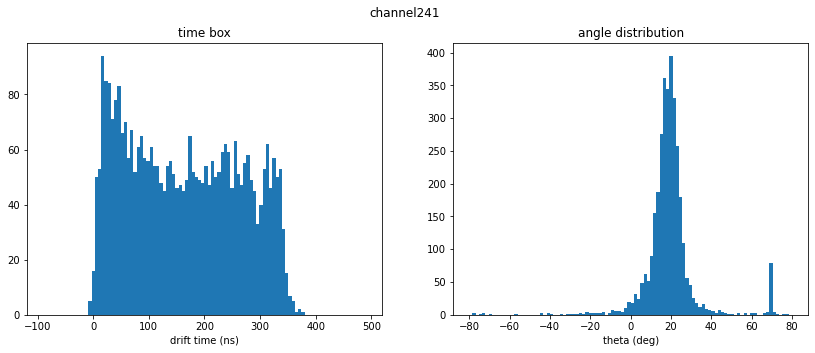

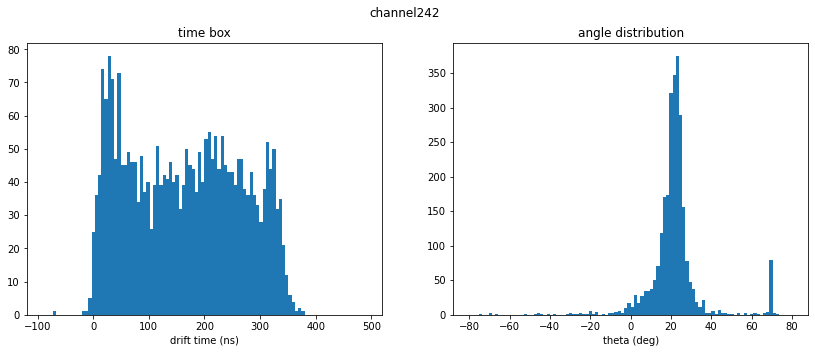

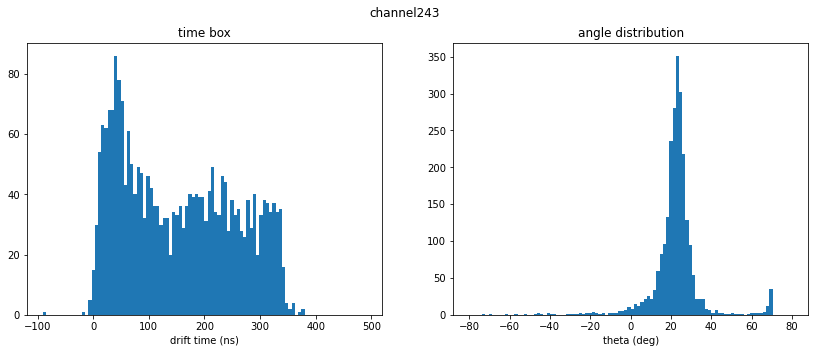

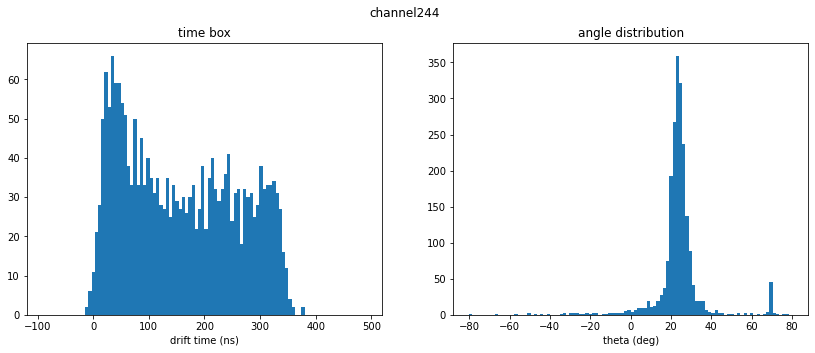

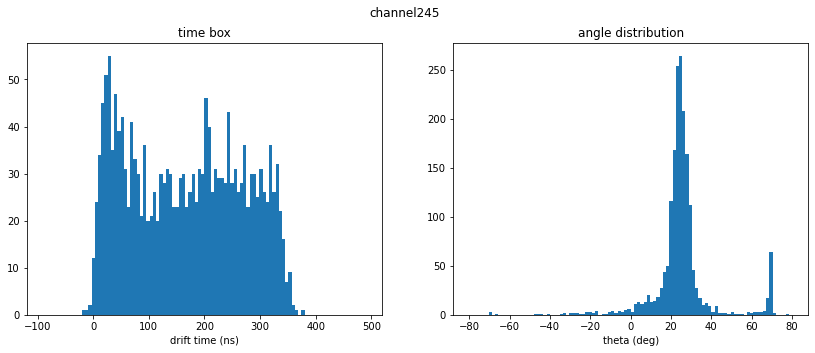

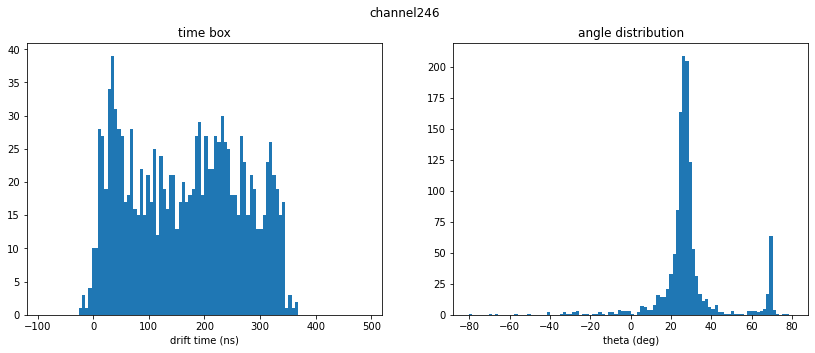

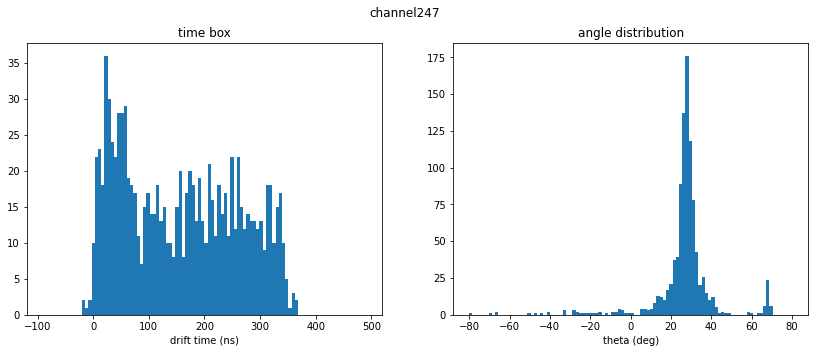

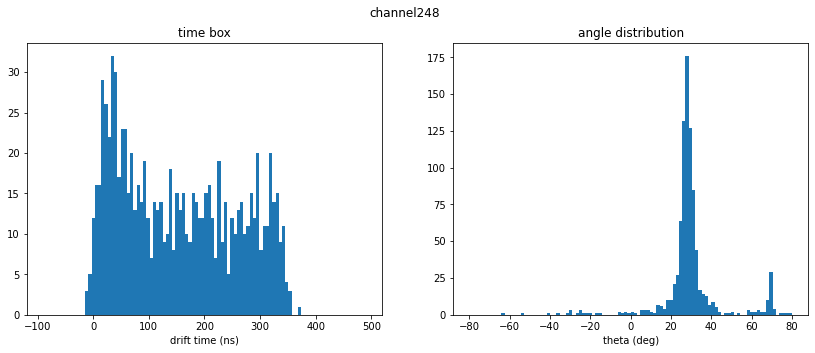

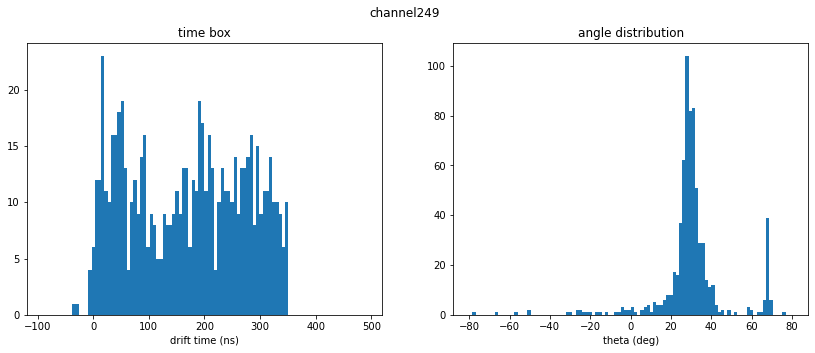

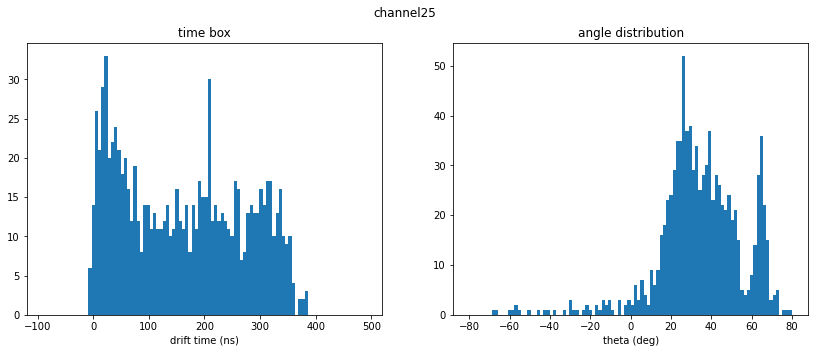

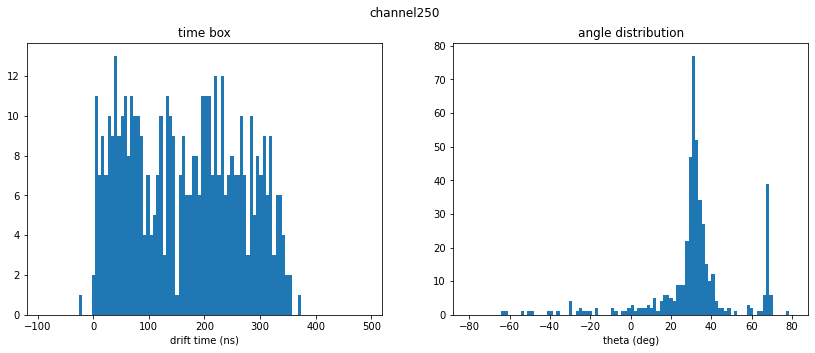

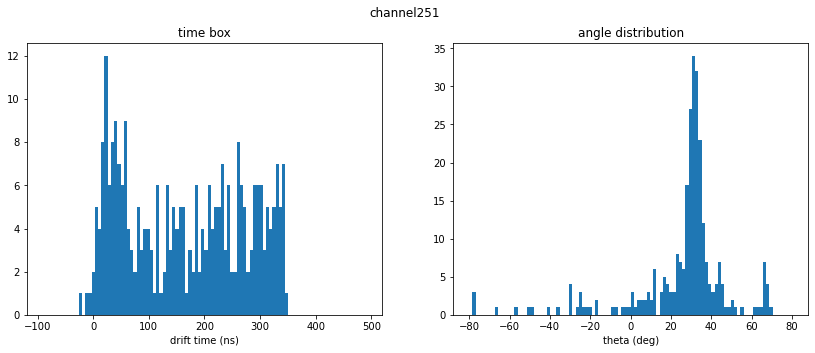

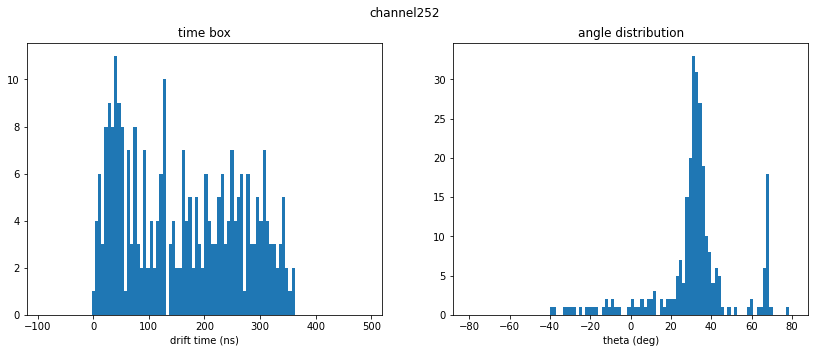

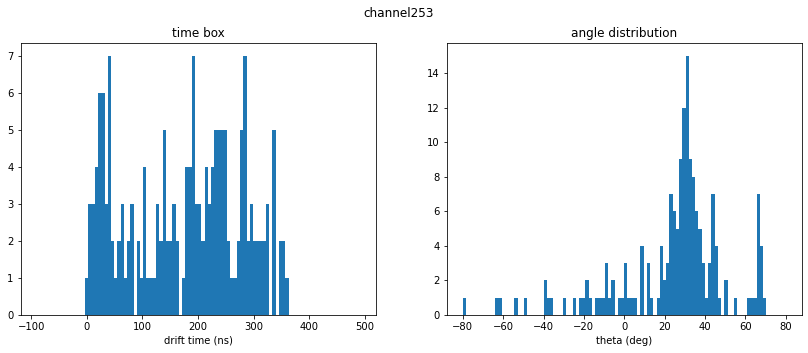

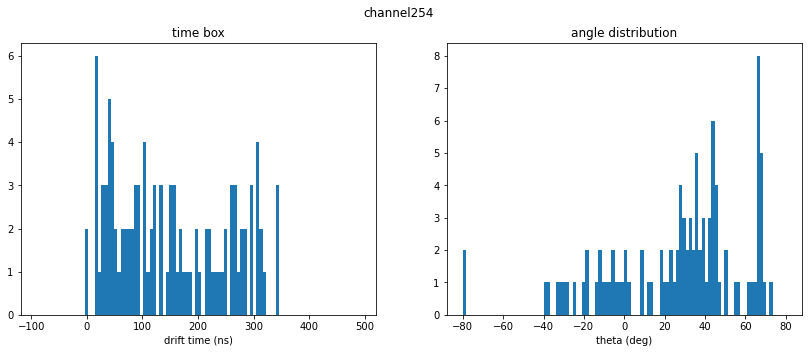

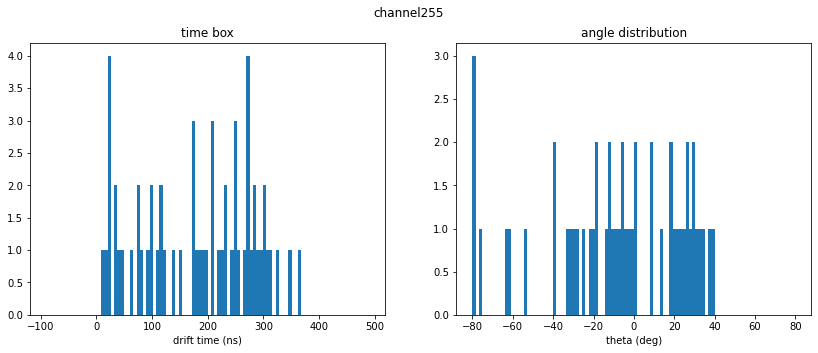

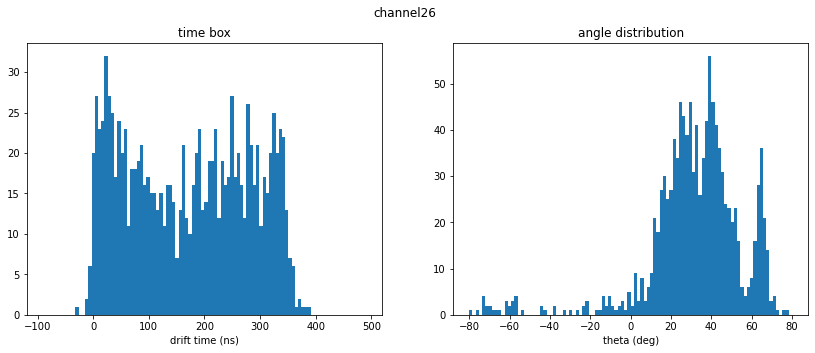

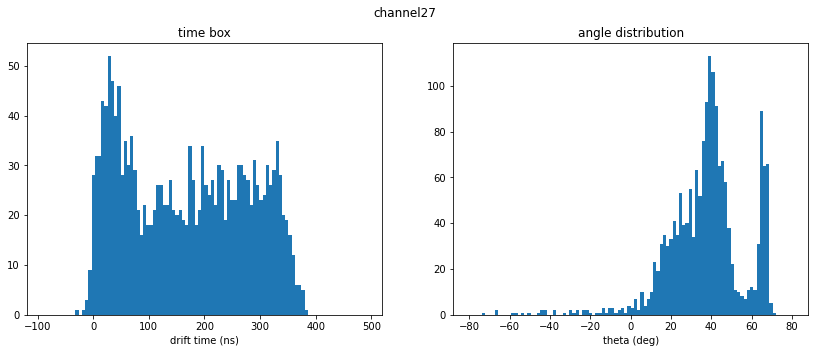

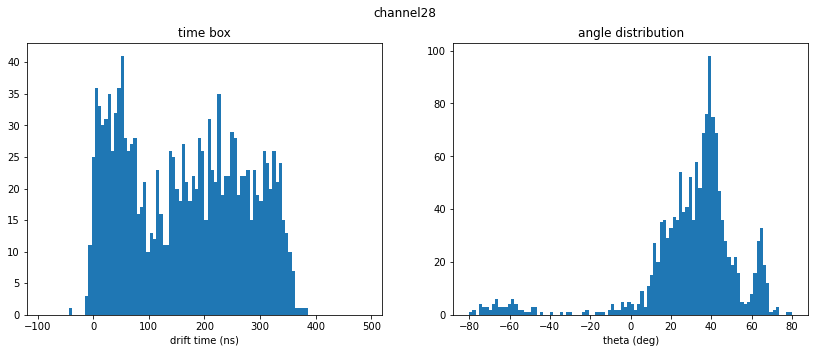

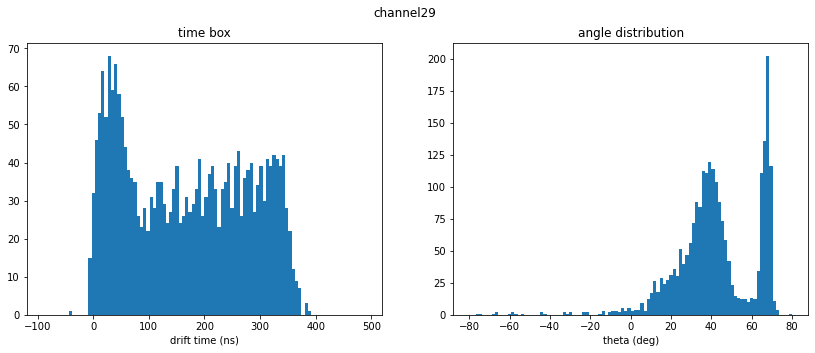

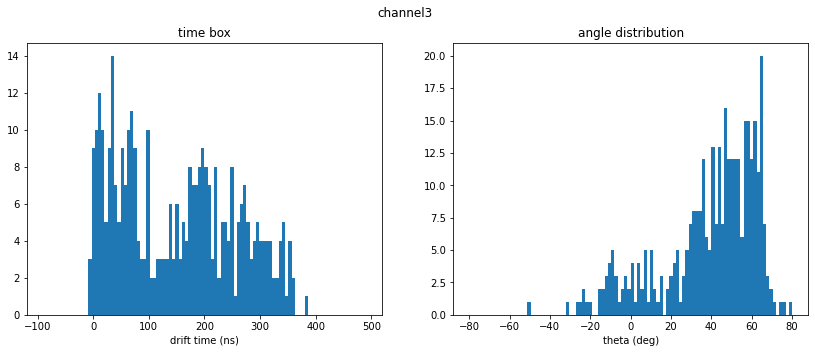

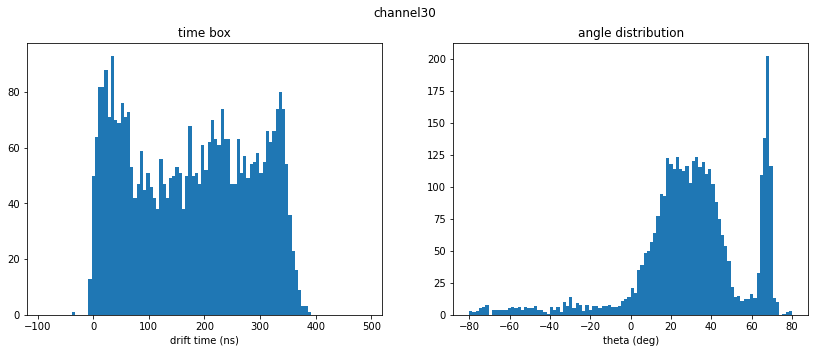

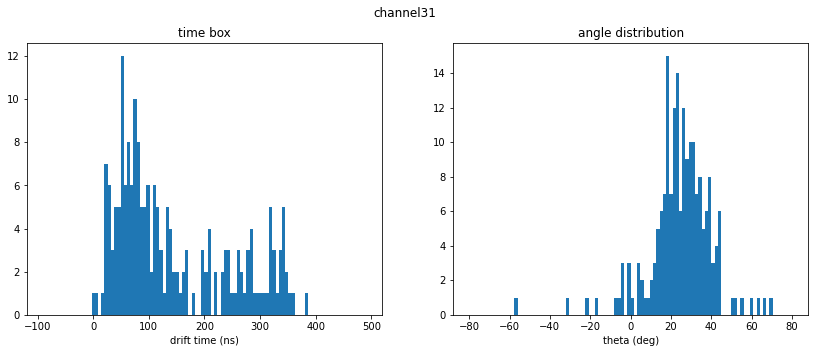

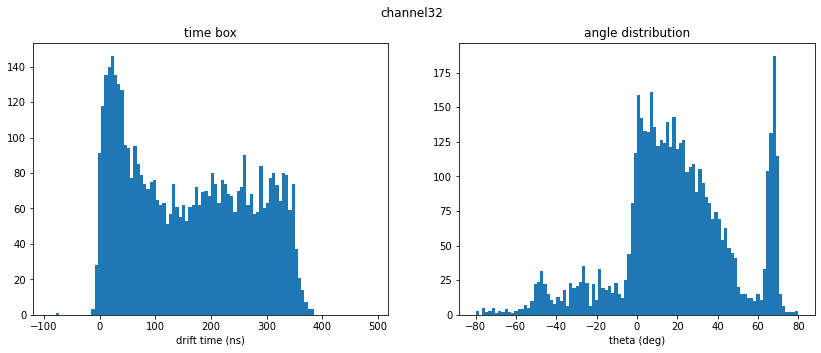

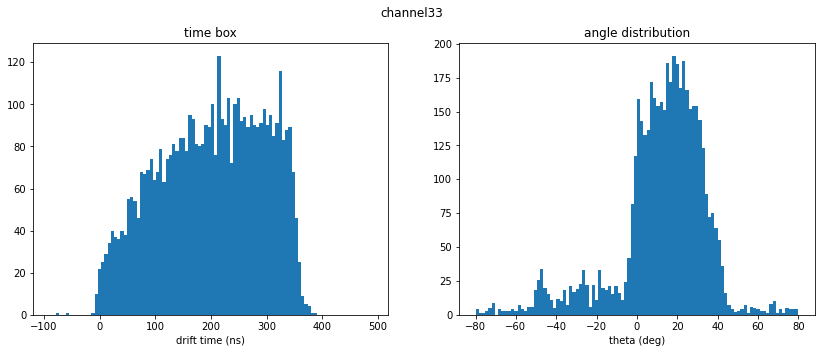

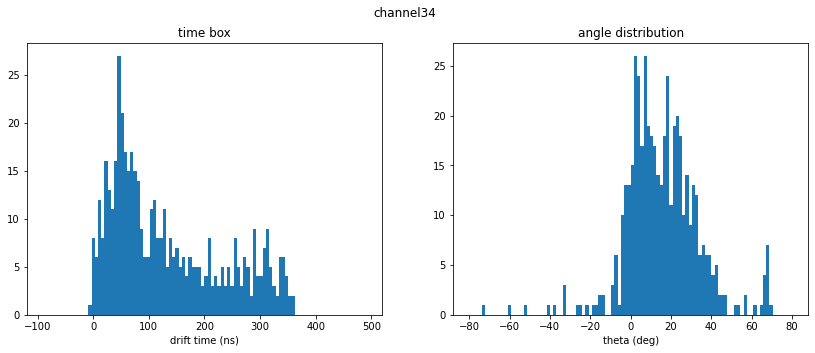

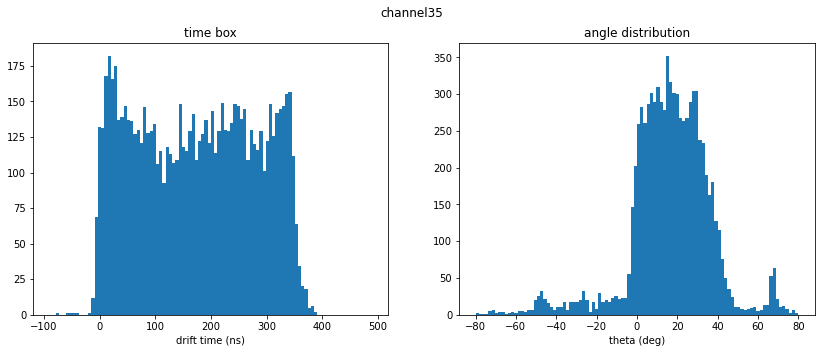

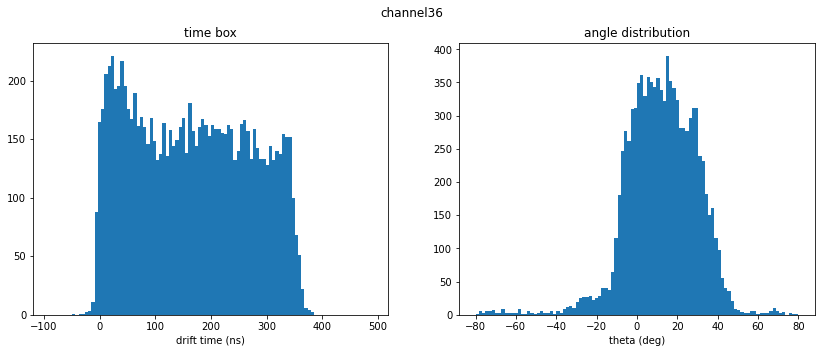

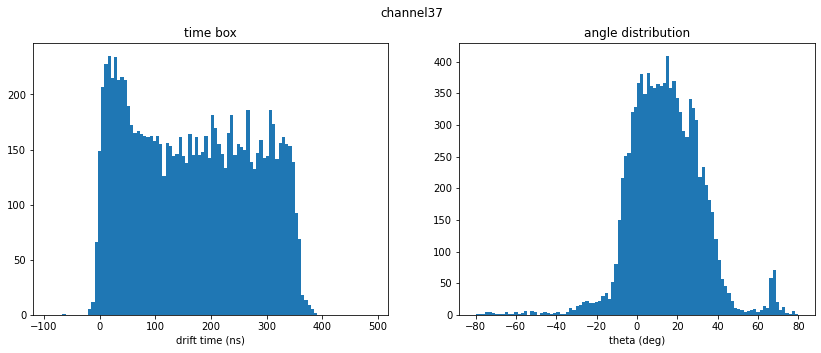

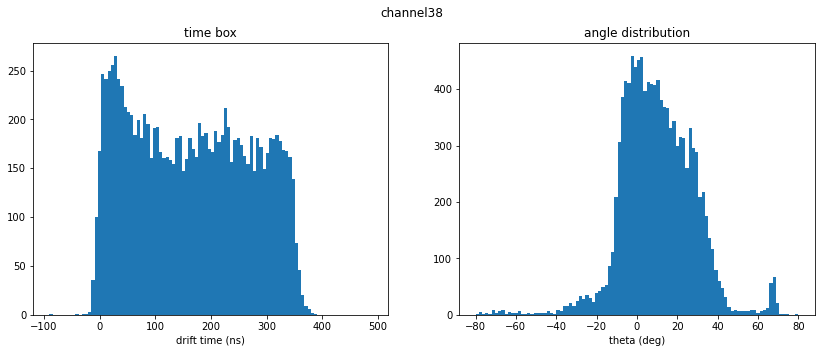

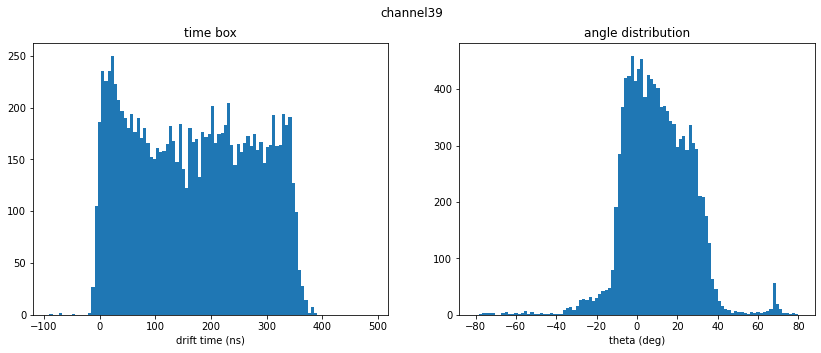

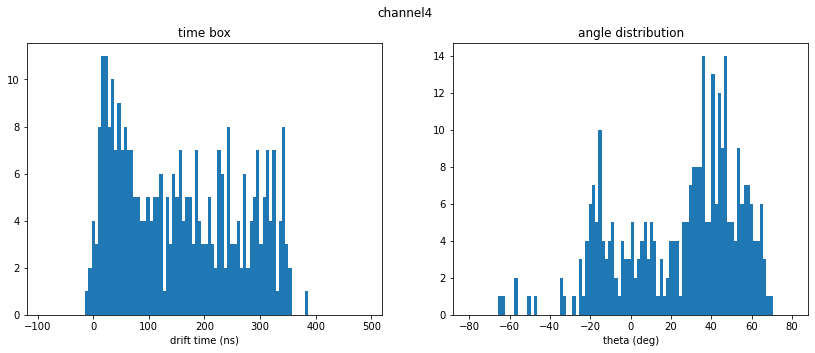

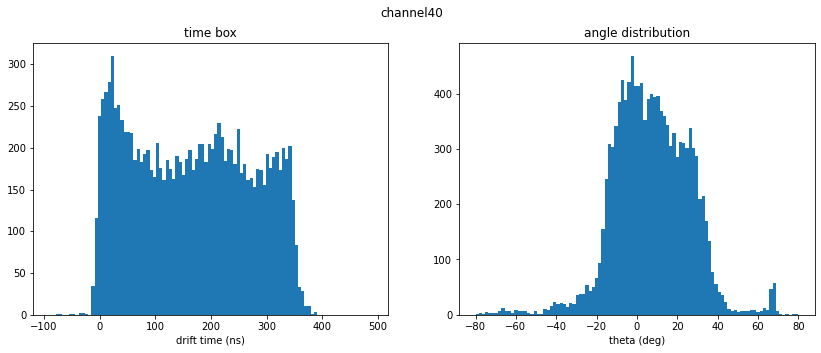

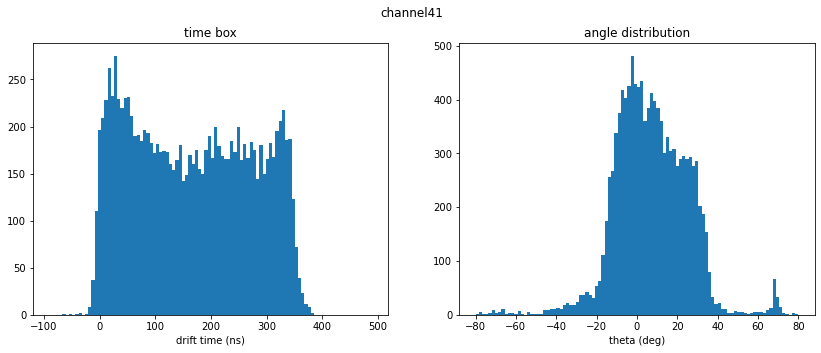

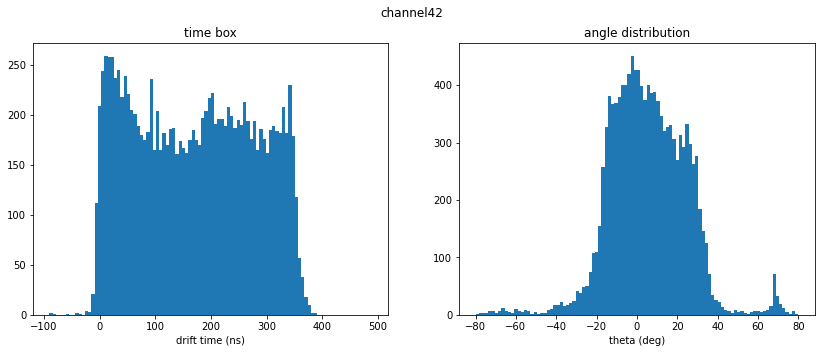

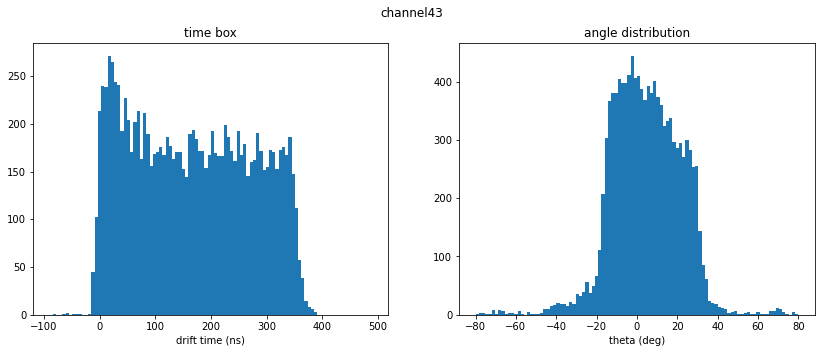

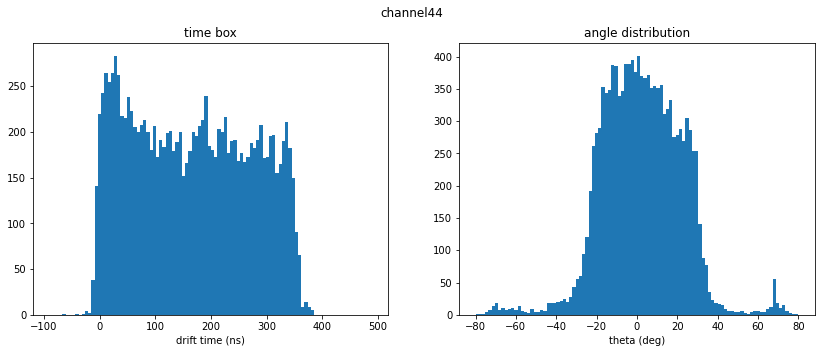

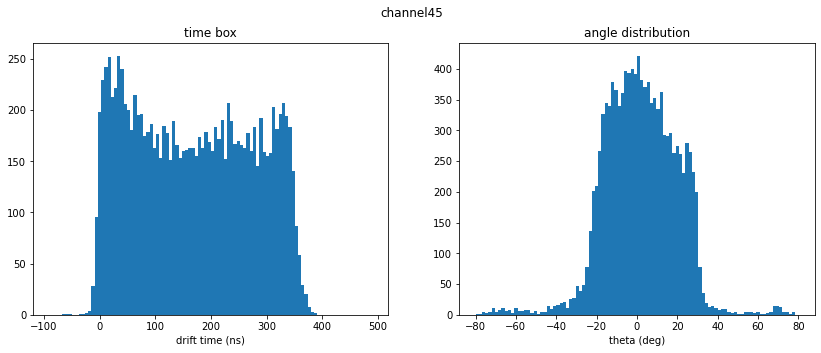

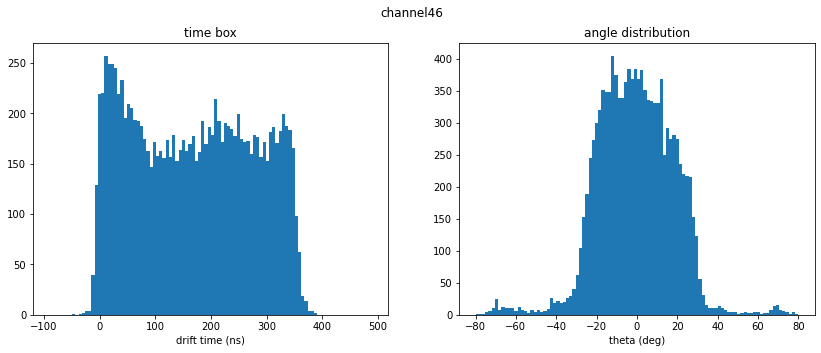

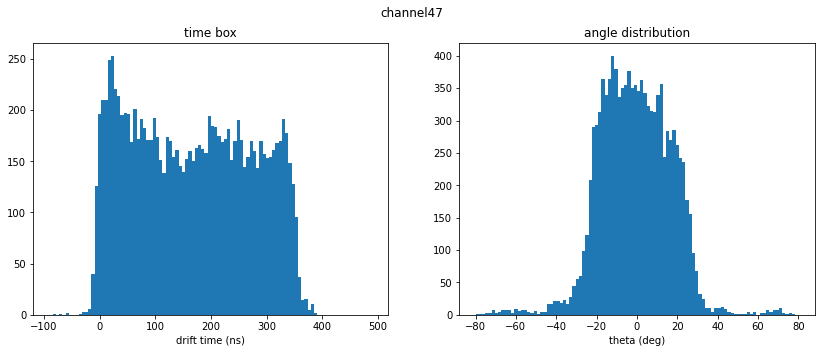

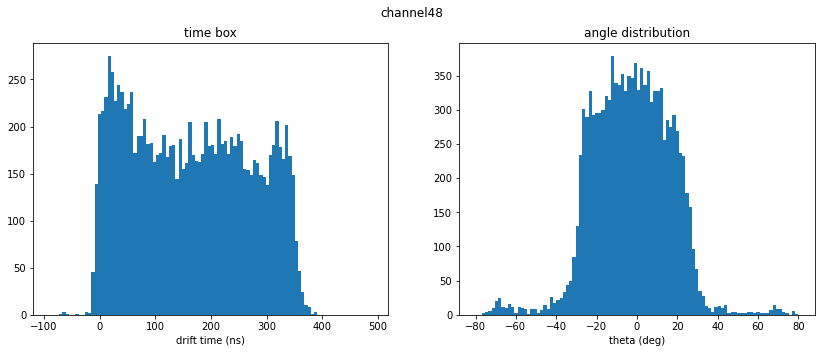

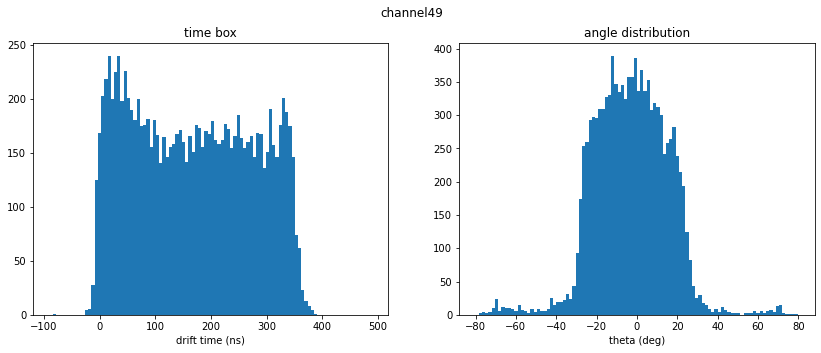

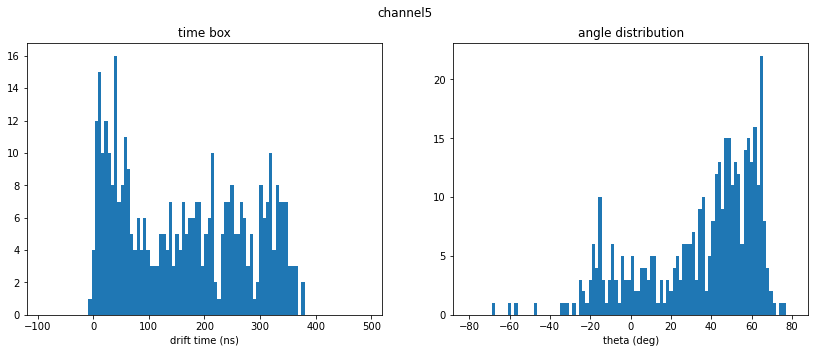

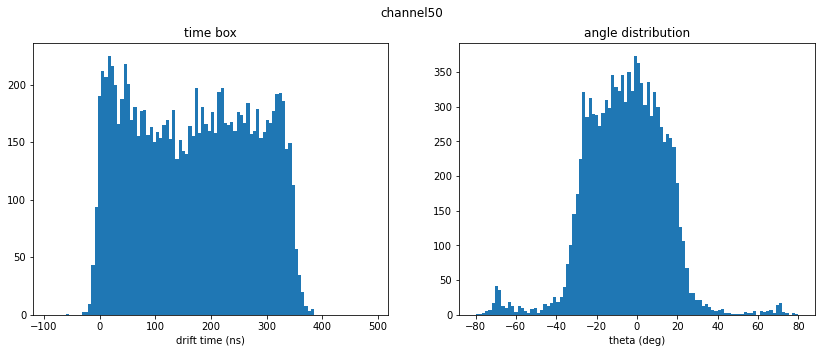

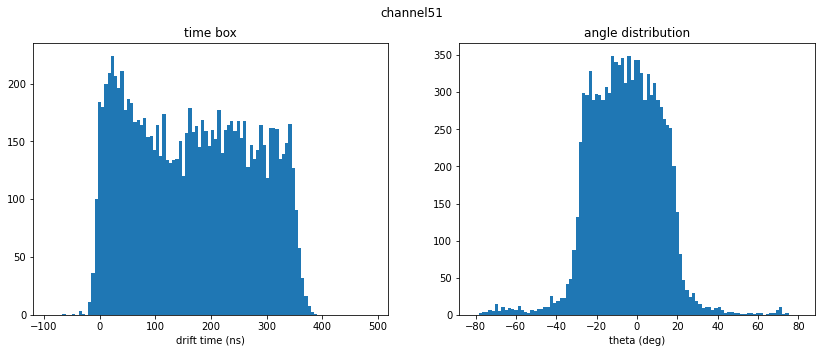

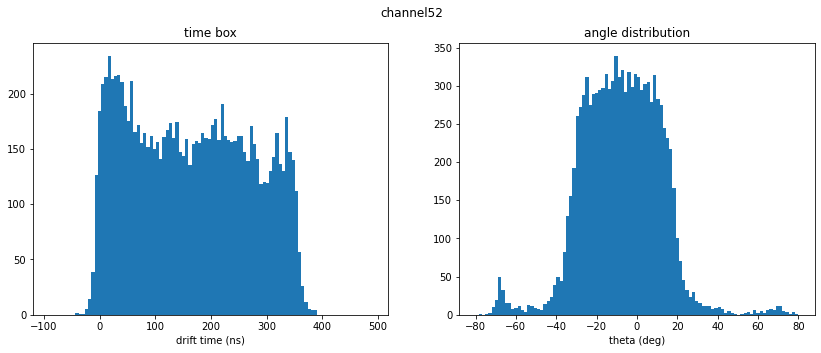

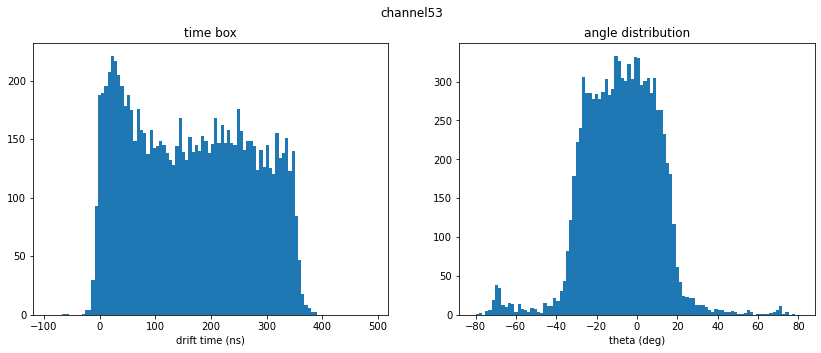

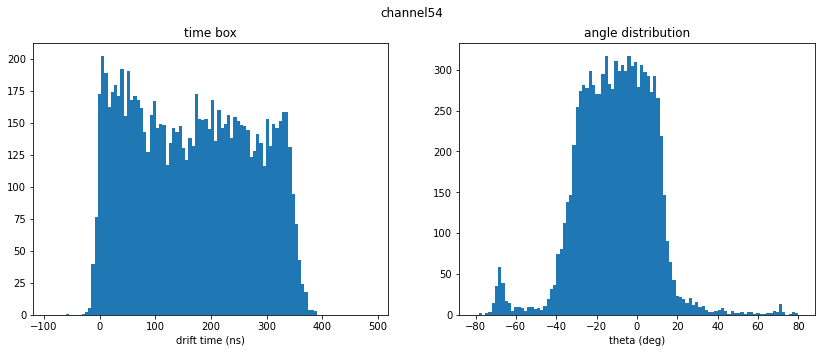

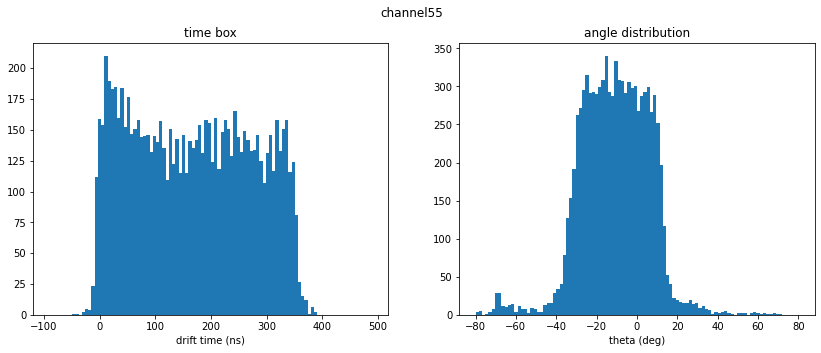

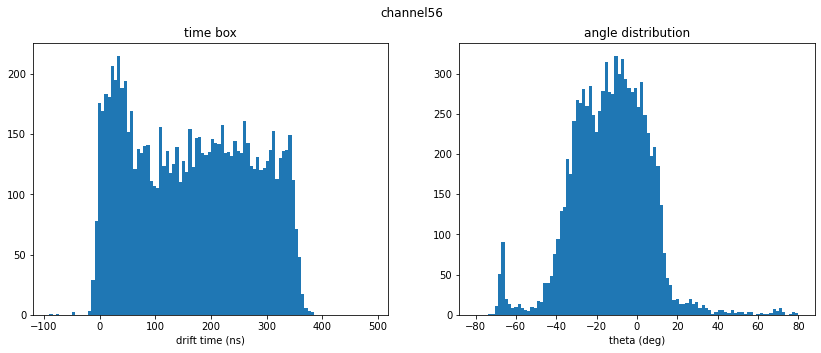

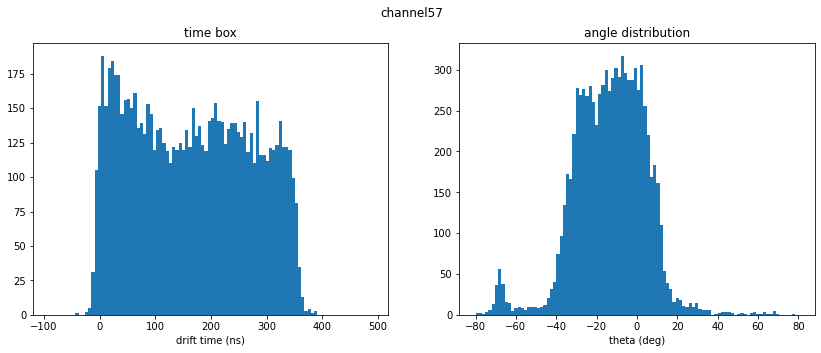

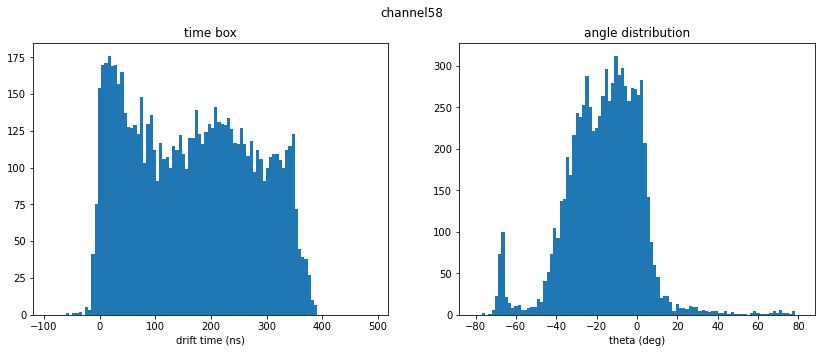

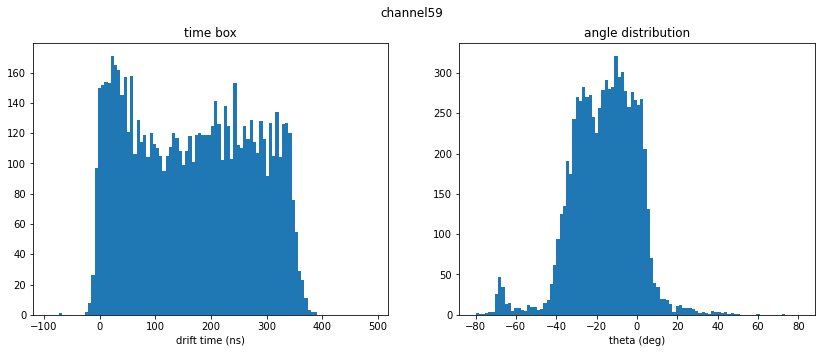

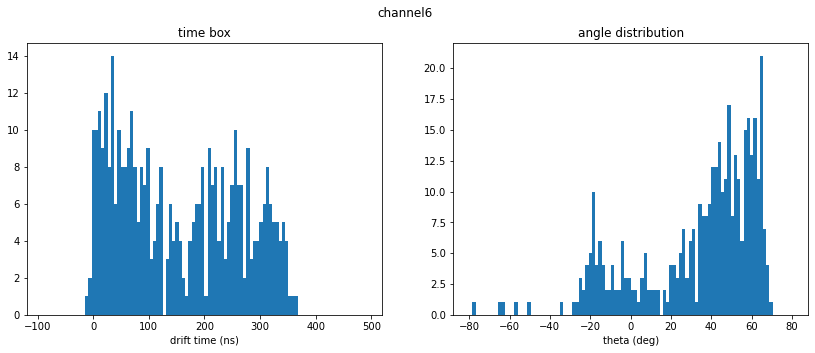

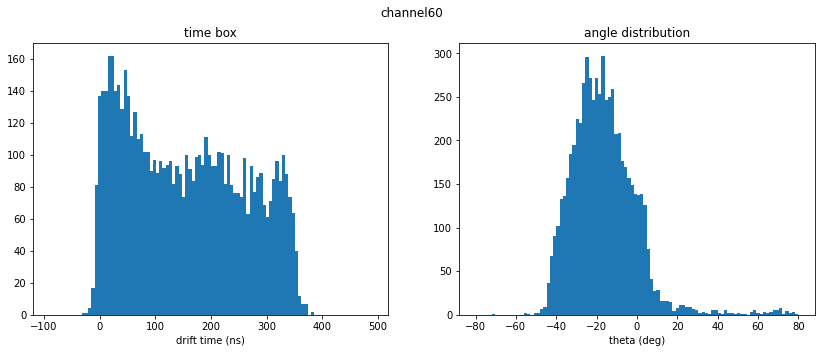

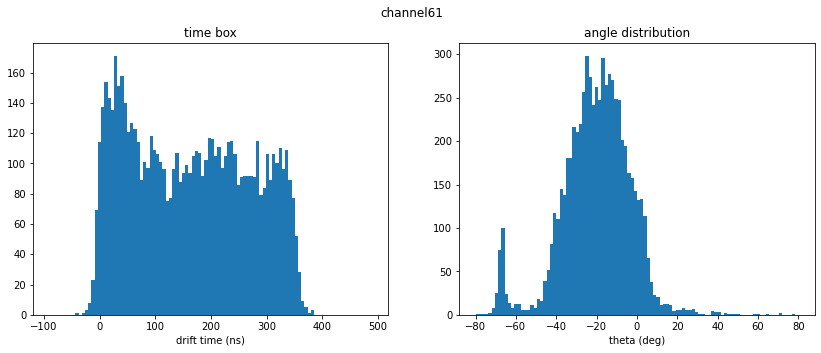

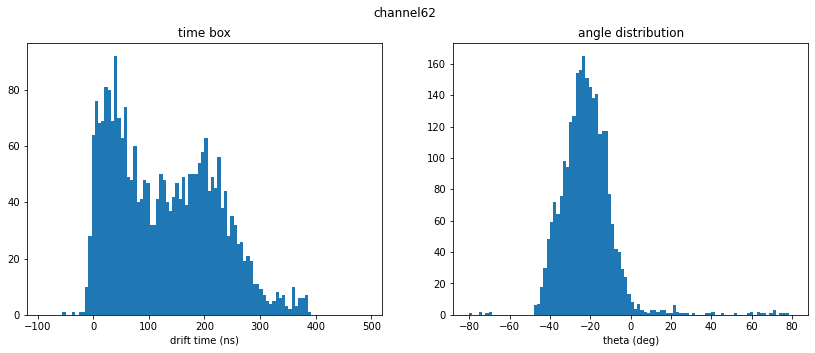

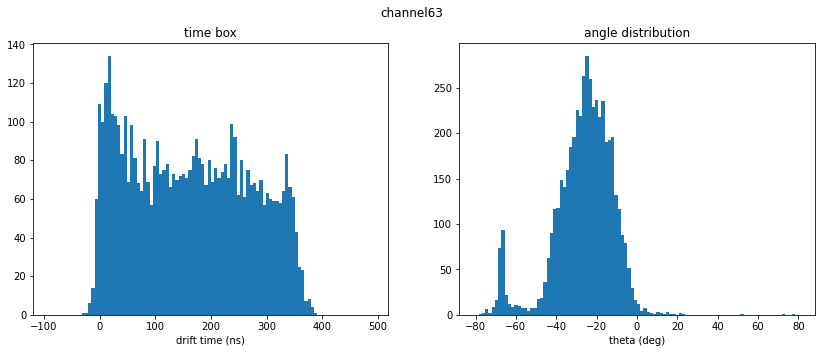

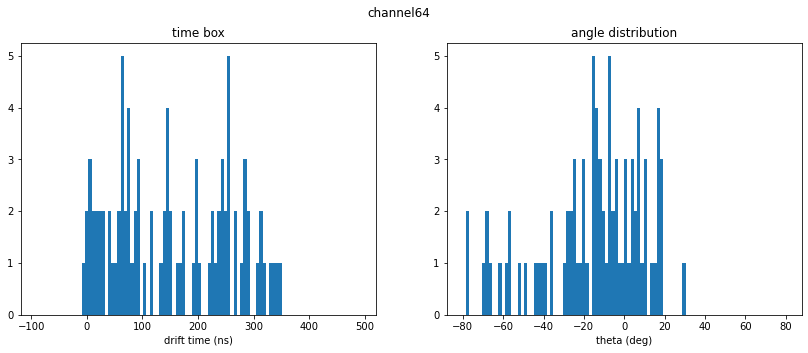

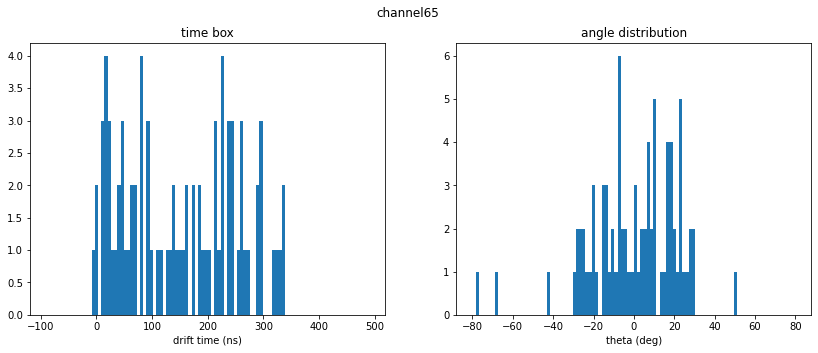

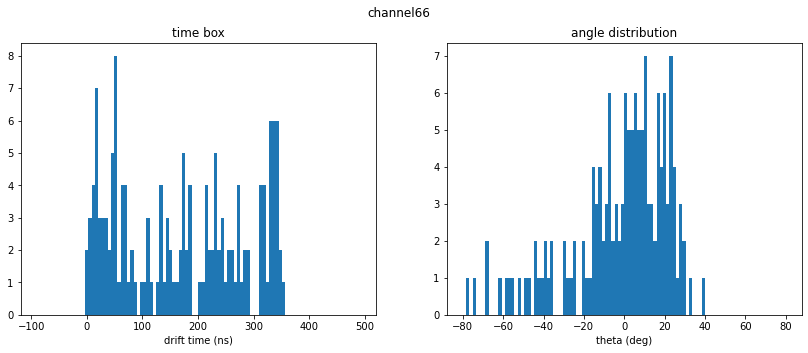

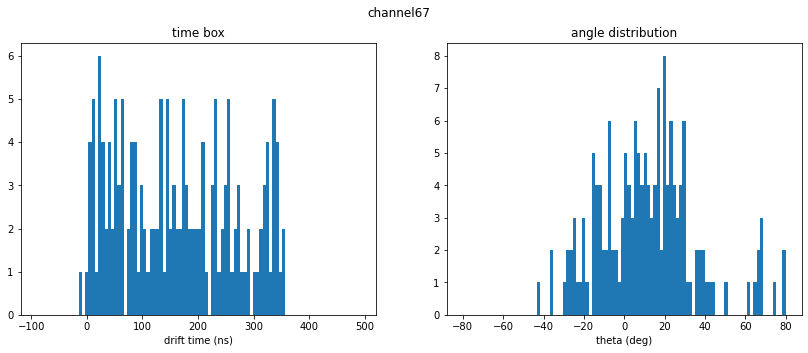

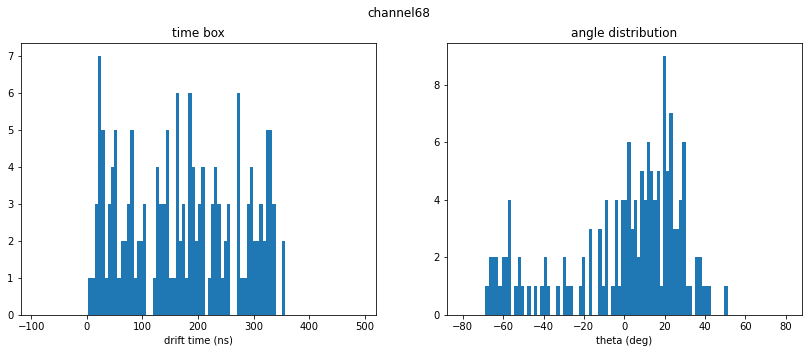

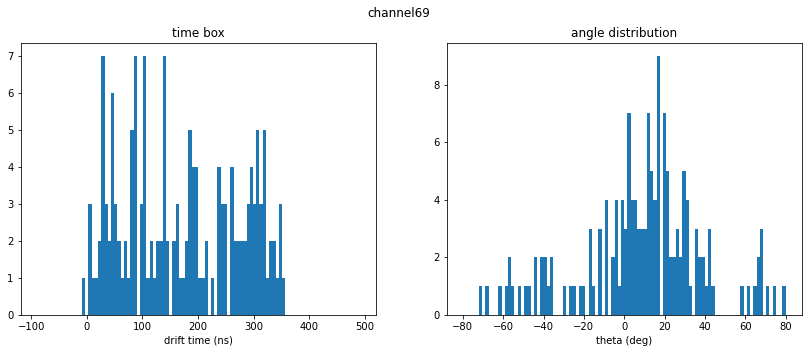

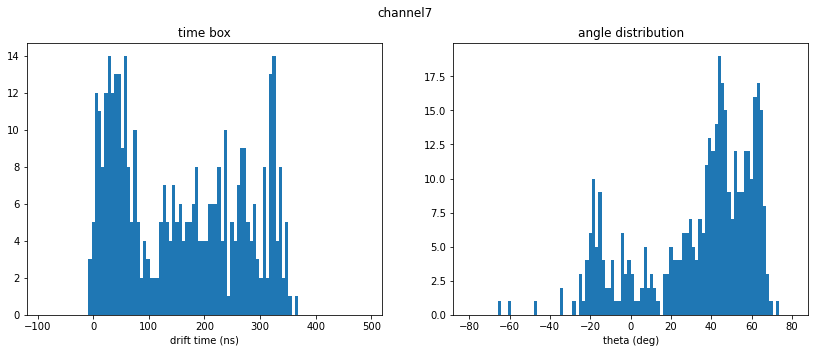

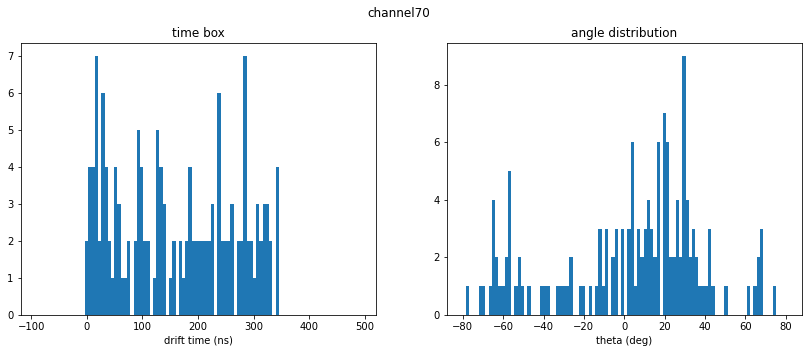

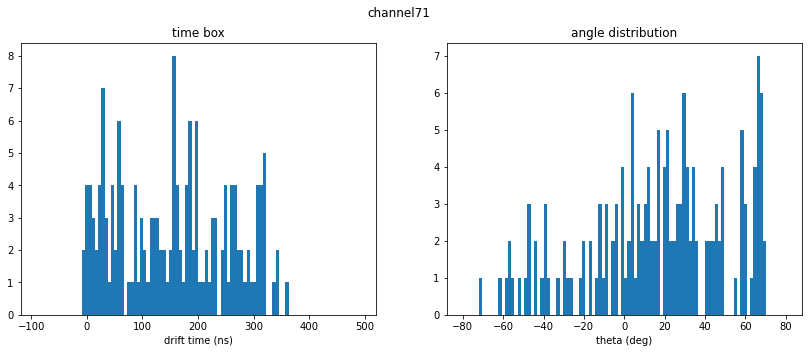

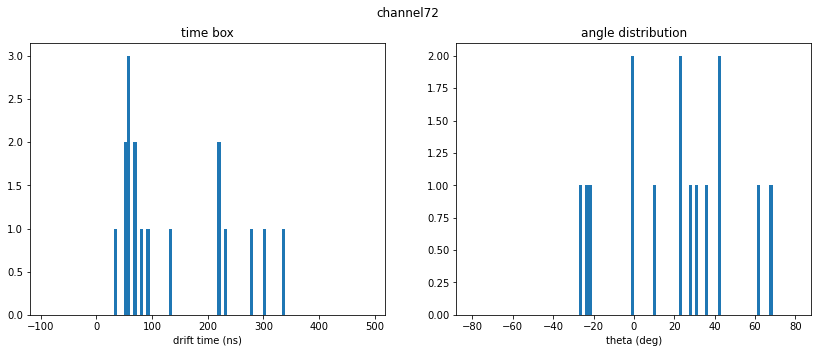

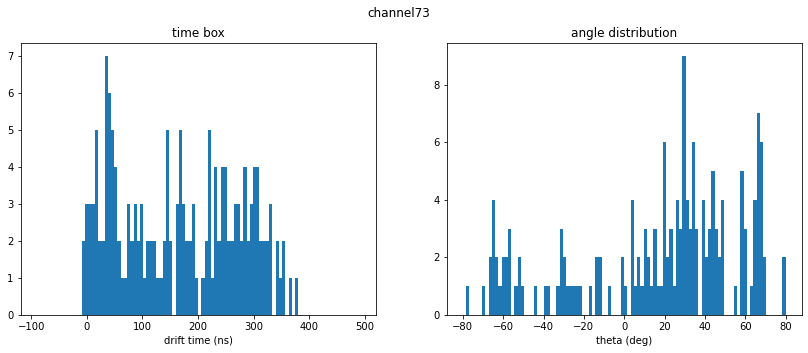

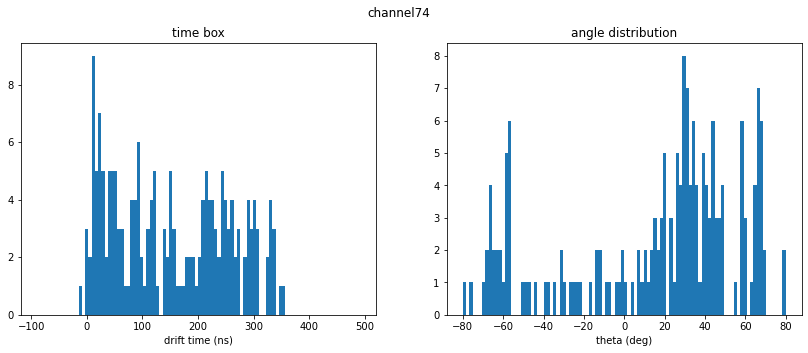

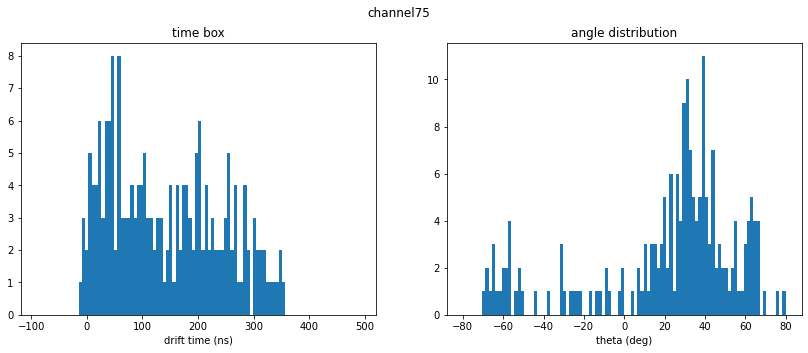

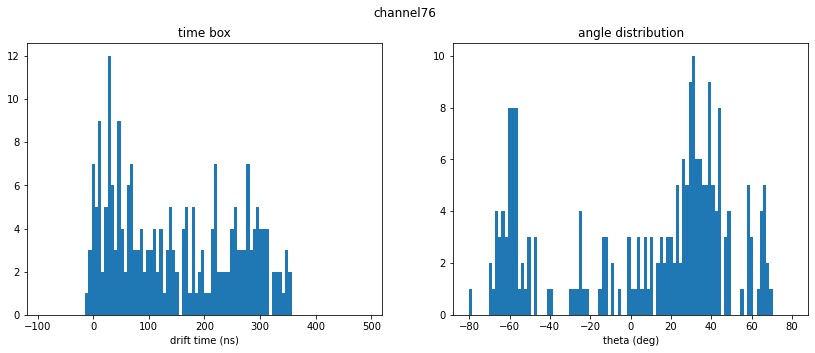

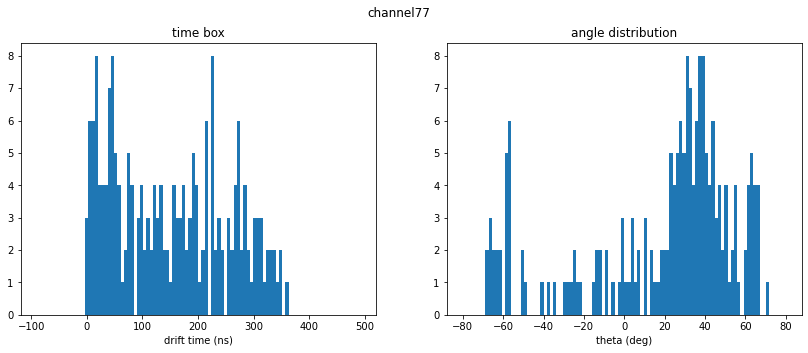

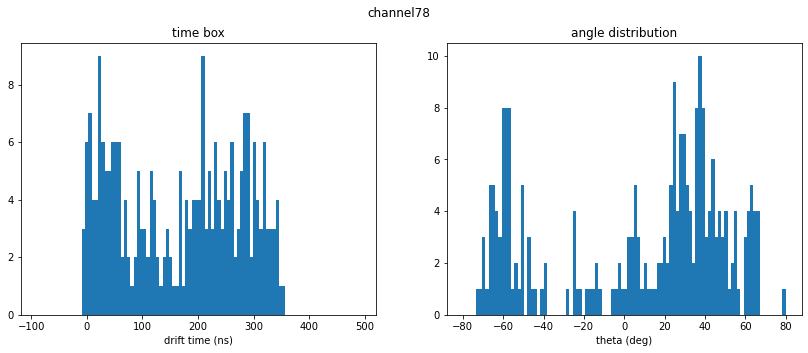

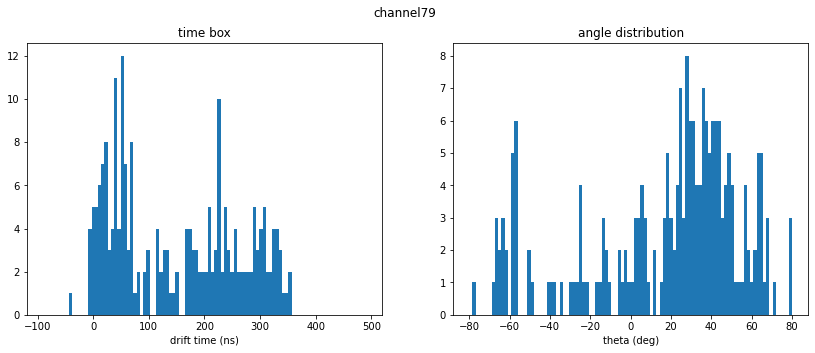

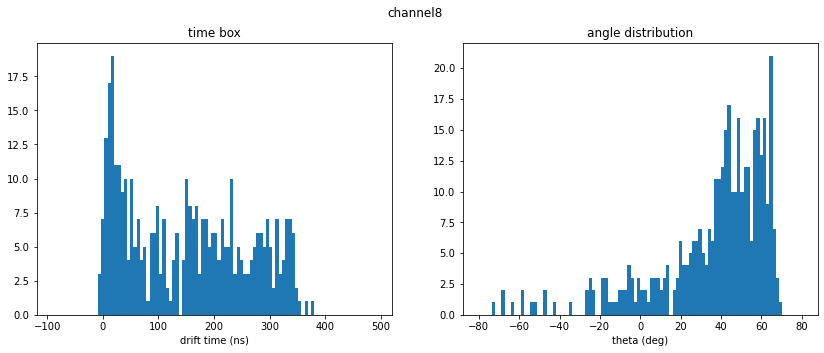

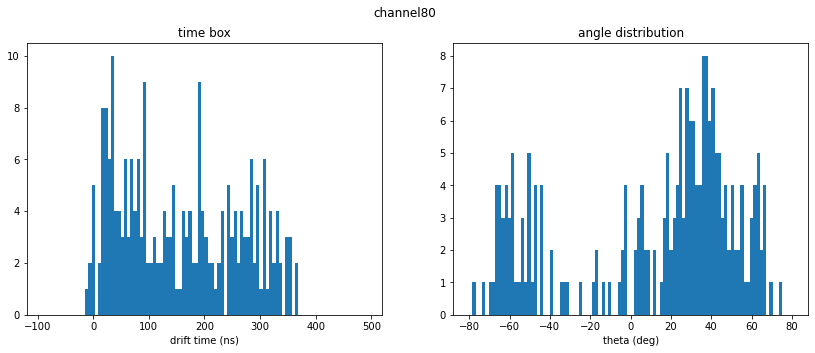

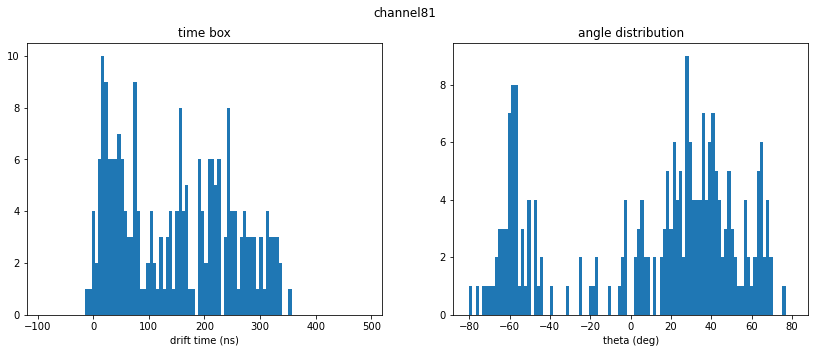

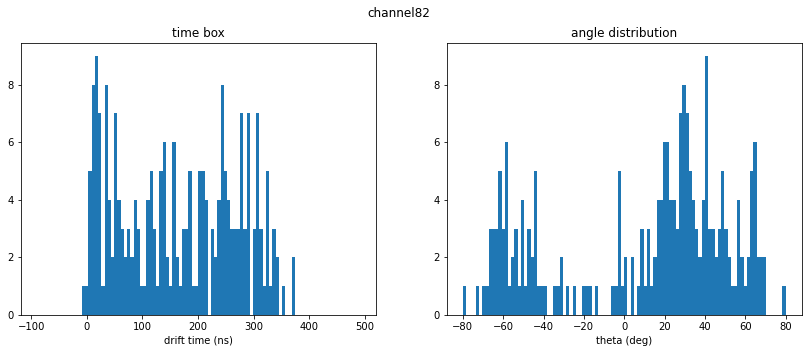

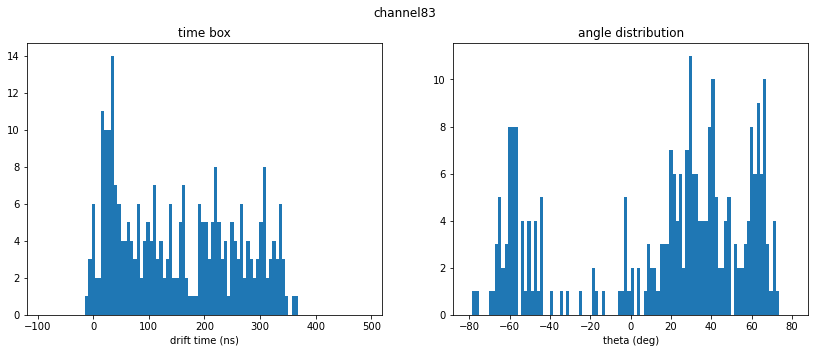

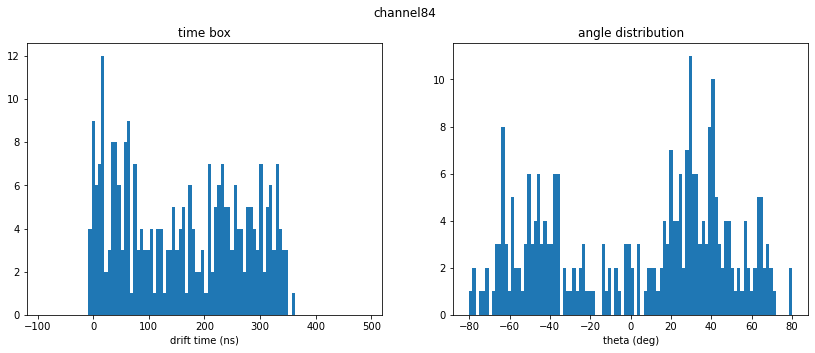

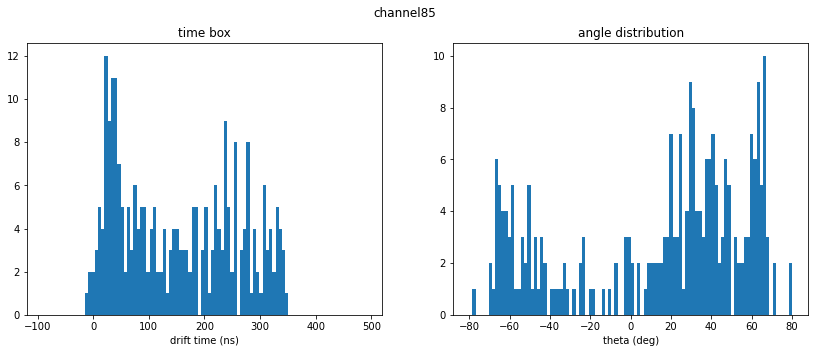

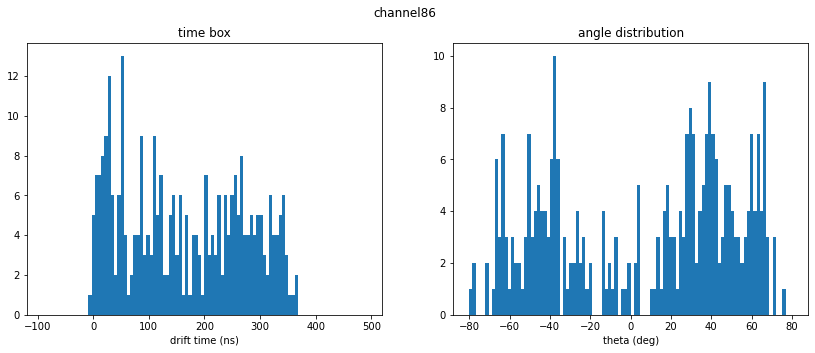

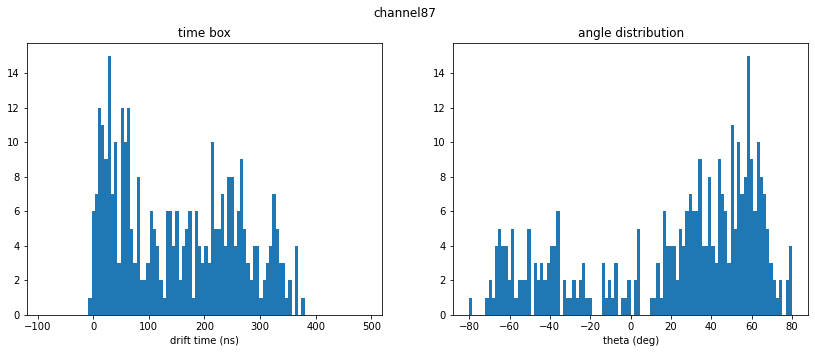

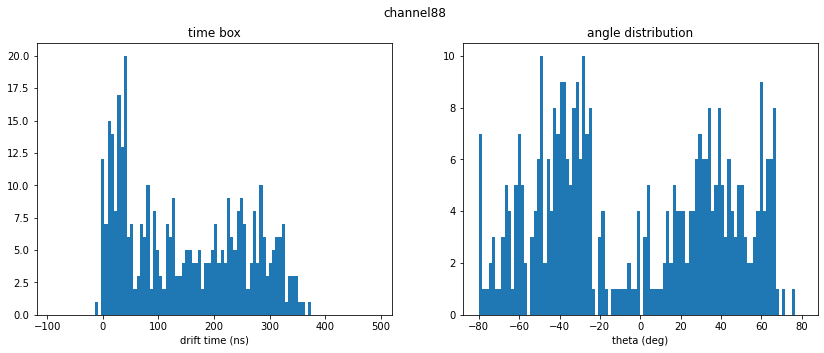

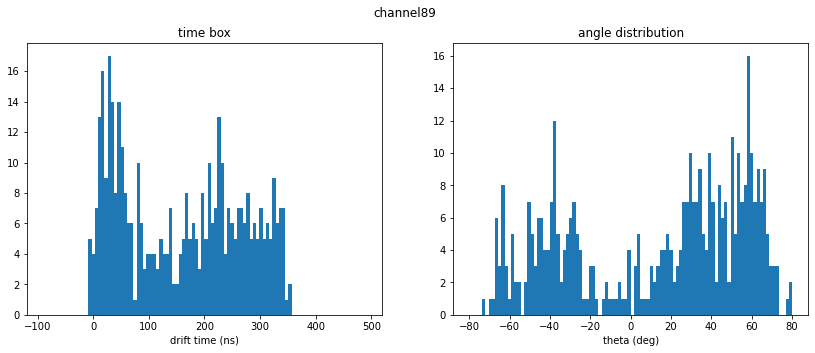

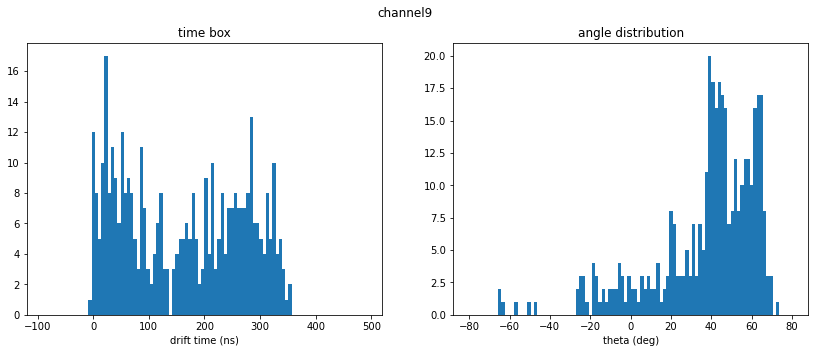

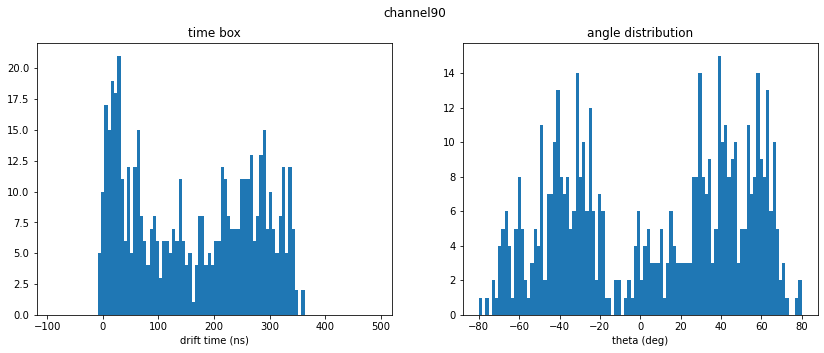

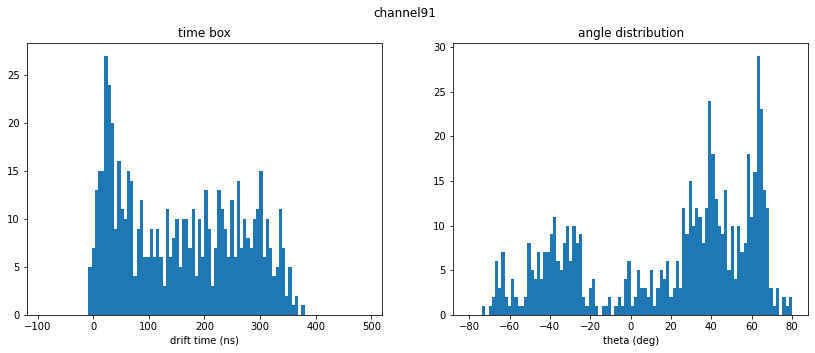

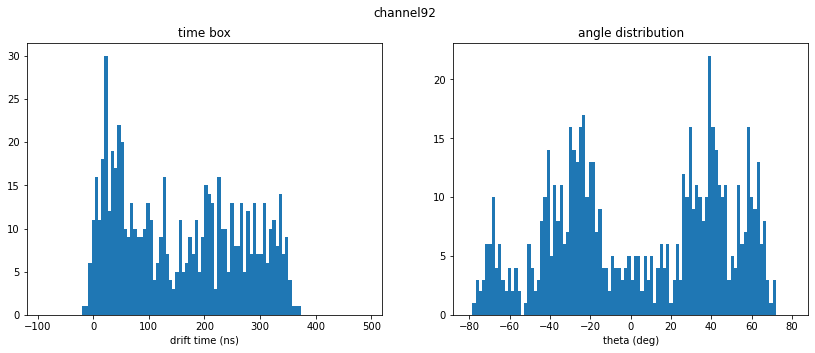

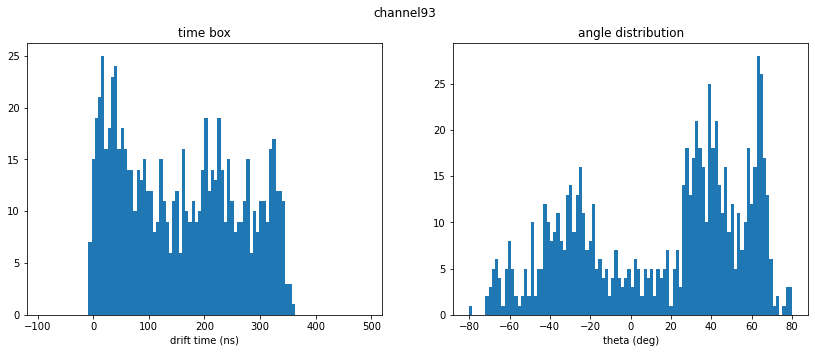

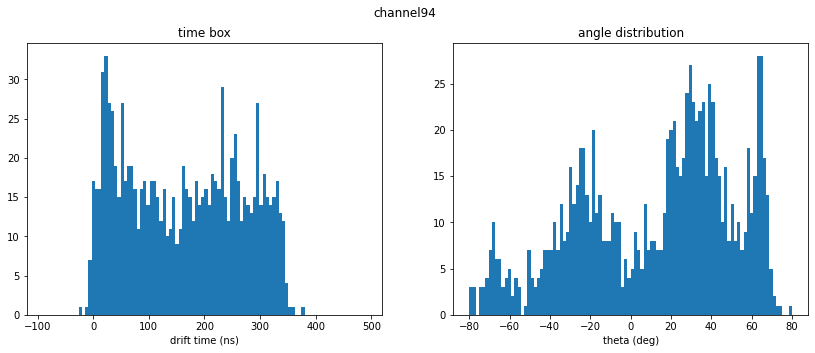

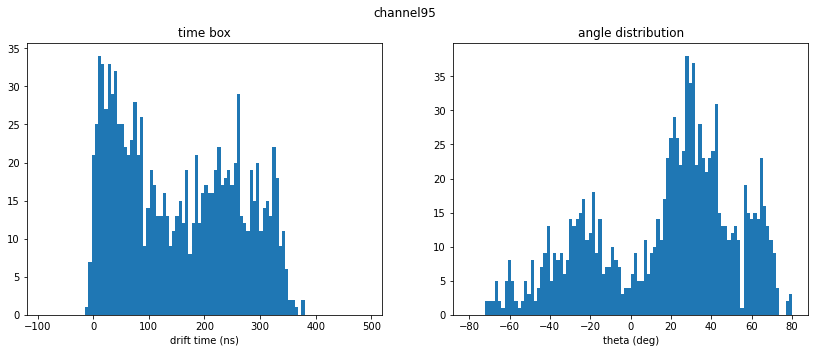

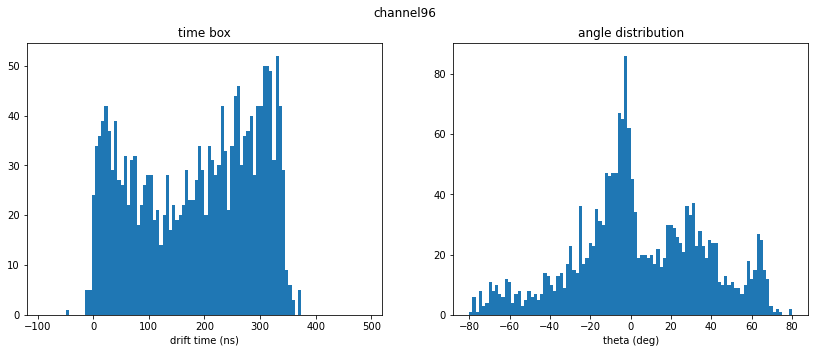

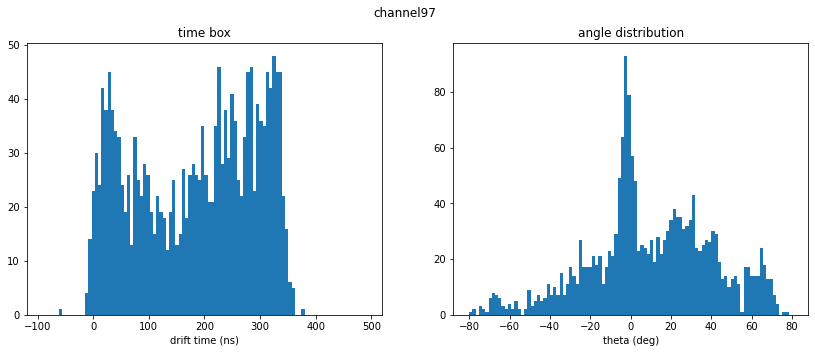

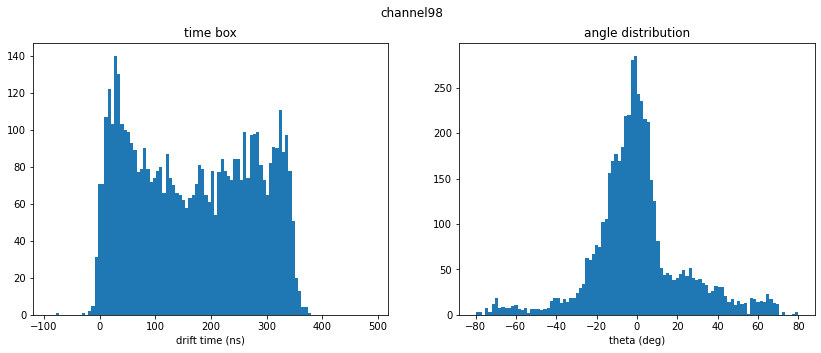

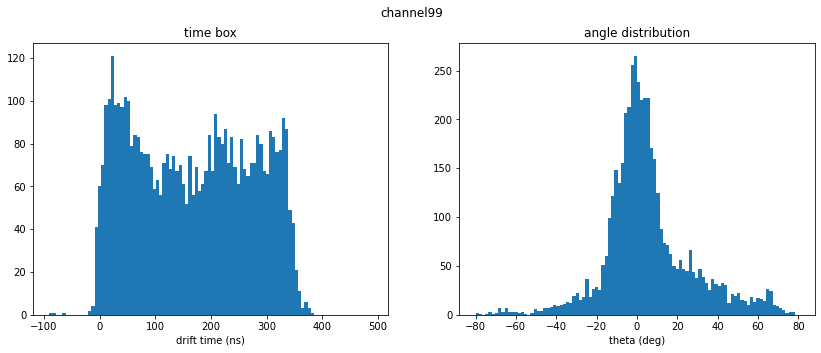

In [8]:
for channel in full_df["CH"].unique():
    channel_df = full_df[full_df["CH"]==channel]
    
    fig, ax = plt.subplots(ncols=2, figsize=(14,5))

    ax[0].hist(
        channel_df["HIT_DRIFT_TIME"],
        bins=100,
        range=(-90, 490)
    )
    ax[1].hist(
        channel_df["THETA"],
        bins=100,
        range=(-80, 80)
    )

    fig.suptitle(f"channel{channel}")

    ax[0].set_title("time box")
    ax[0].set_xlabel("drift time (ns)")
    ax[1].set_title("angle distribution")
    ax[1].set_xlabel("theta (deg)")
    
    plt.show()